# Advanced Regression Assignment #

**Problem Statement-**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

**Business Goal-**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Preparing the Data

*Importing Important Libraries*

In [1876]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1877]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [1878]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1879]:
# Reading the dataset from train.csv file
data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1880]:
#Verifying the shape of dataframe
data.shape

(1460, 81)

**Verifying missing values**

In [1881]:
#Verifying if there are any columns with all the values as missing
data.isnull().all(axis=0).sum()

0

In [1882]:
#Verifying if there are any rows with all the values as missing
data.isnull().all(axis=1).sum()

0

In [1883]:
# Percentage of missing values in each column
round(data.isnull().sum()*100/len(data),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1884]:
#Analysing columns with high missing values

In [1885]:
#Alley Column
data['Alley'].value_counts()
#As per the data dictionary NA value in Alley column means no alley so will replace NA with No Alley

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1886]:
data['Alley'].fillna('No Alley',inplace =True)
data['Alley'].value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [1887]:
#Since this column is highly skewed we can drop it 
del data['Alley']

In [1888]:
#FirePlace Qu column
data.FireplaceQu.value_counts()
#As per the data dictionary NA value in is No Fireplace and hence imputing it with No Fireplace

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1889]:
data['FireplaceQu'].fillna('No Fireplace',inplace =True)
data['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [1890]:
#Pool QC column
data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [1891]:
#As per the data dictionary NA value in is No Pool and hence imputing it with No Pool
data['PoolQC'].fillna('No Pool',inplace =True)
data['PoolQC'].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [1892]:
#Since this column is highly skewed we can drop it 
del data['PoolQC']

In [1893]:
#Fence Column
data.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1894]:
#As per the data dictionary NA value in is No Fence and hence imputing it with No Fence
data['Fence'].fillna('No Fence',inplace =True)
data['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [1895]:
#Since this column is highly skewed we can drop it 
del data['Fence']

In [1896]:
#MiscFeature Column
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [1897]:
#As per the data dictionary NA value in is None and hence imputing it with None
data['MiscFeature'].fillna('None',inplace =True)
data['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [1898]:
#Since this column is highly skewed we can drop it 
del data['MiscFeature']

In [1899]:
#LotFrontage Column
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1900]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [1901]:
#dropping the cloumn LotFrontage as the number of missing values are high and imputation might add bias.Also the column does not seem to be very important from business point of view
del data['LotFrontage']

In [1902]:
#MasVnrType column
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1903]:
#Droping the rows corresponding to MasVnrType NA values as they are very less and hence retaingin the column but dropping missing value rows
data =data[data['MasVnrType'].notna()]

In [1904]:
data.shape

(1452, 76)

In [1905]:
#MasVnrArea column
data['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [1906]:
#Droping the rows corresponding to MasVnrArea NA values as they are very less and hence retaining the column but dropping missing value rows
data =data[data['MasVnrArea'].notna()]

In [1907]:
data.shape

(1452, 76)

In [1908]:
#BsmtCond column
data['BsmtCond'].value_counts()

TA    1304
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1909]:
#As per the data dictionary NA value in is No Basement and hence imputing it with No Bsmt
data['BsmtCond'].fillna('No Bsmt',inplace =True)
data['BsmtCond'].value_counts()

TA         1304
Gd           64
Fa           45
No Bsmt      37
Po            2
Name: BsmtCond, dtype: int64

In [1910]:
#Since this column is highly skewed we can drop it 
del data['BsmtCond']

In [1911]:
#BsmtQual column
data['BsmtQual'].value_counts()

TA    648
Gd    612
Ex    120
Fa     35
Name: BsmtQual, dtype: int64

In [1912]:
#As per the data dictionary NA value in is No Basement and hence imputing it with No Bsmt
data['BsmtQual'].fillna('No Bsmt',inplace =True)
data['BsmtQual'].value_counts()

TA         648
Gd         612
Ex         120
No Bsmt     37
Fa          35
Name: BsmtQual, dtype: int64

In [1913]:
#BsmtExposure column
data['BsmtExposure'].value_counts()

No    946
Av    221
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64

In [1914]:
#As per the data dictionary NA value in is No Basement and hence imputing it with No Bsmt
data['BsmtExposure'].fillna('No Bsmt',inplace =True)
data['BsmtExposure'].value_counts()

No         946
Av         221
Gd         133
Mn         114
No Bsmt     38
Name: BsmtExposure, dtype: int64

In [1915]:
#BsmtFinType1 column
data['BsmtFinType1'].value_counts()

Unf    428
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1916]:
#As per the data dictionary NA value in is No Basement and hence imputing it with No Bsmt
data['BsmtFinType1'].fillna('No Bsmt',inplace =True)
data['BsmtFinType1'].value_counts()

Unf        428
GLQ        413
ALQ        220
BLQ        148
Rec        132
LwQ         74
No Bsmt     37
Name: BsmtFinType1, dtype: int64

In [1917]:
#BsmtFinSF1 column
data['BsmtFinSF1'].describe()

count    1452.000000
mean      441.970386
std       455.360279
min         0.000000
25%         0.000000
50%       381.000000
75%       706.500000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [1918]:
#Droping the rows corresponding to BsmtFinSF1 NA values as they are very less and hence retaining the column but dropping missing value rows
data =data[data['BsmtFinSF1'].notna()]

In [1919]:
data.shape

(1452, 75)

In [1920]:
#BsmtFinType2 column
data['BsmtFinType2'].value_counts()

Unf    1248
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1921]:
#As per the data dictionary NA value in is No Basement and hence imputing it with No Bsmt
data['BsmtFinType2'].fillna('No Bsmt',inplace =True)
data['BsmtFinType2'].value_counts()

Unf        1248
Rec          54
LwQ          46
No Bsmt      38
BLQ          33
ALQ          19
GLQ          14
Name: BsmtFinType2, dtype: int64

In [1922]:
#Since this column is highly skewed we can drop it 
del data['BsmtFinType2']

In [1923]:
#Electricity column
data['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1924]:
#Since this column is highly skewed we can drop it 
del data['Electrical']

In [1925]:
data.shape

(1452, 73)

In [1926]:
#GarageYrBlt column
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    58
2004.0    53
2003.0    49
2007.0    46
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
1968.0    26
1950.0    24
2002.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1991.0     9
1939.0     9
1975.0     8
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [1927]:
#Droping the rows corresponding to GarageYrBlt NA values as it's less and also difficult to impute and hence retaining the column but dropping missing value rows
data =data[data['GarageYrBlt'].notna()]

In [1928]:
data.shape

(1371, 73)

In [1929]:
#GarageFinish column
data['GarageFinish'].value_counts()

Unf    605
RFn    418
Fin    348
Name: GarageFinish, dtype: int64

In [1930]:
#As per the data dictionary NA value in is No Garage and hence imputing it with No Garage
data['GarageFinish'].fillna('No Garage',inplace =True)
data['GarageFinish'].value_counts()

Unf    605
RFn    418
Fin    348
Name: GarageFinish, dtype: int64

In [1931]:
#GarageQual column
data['GarageQual'].value_counts()

TA    1303
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1932]:
#As per the data dictionary NA value in is No Garage and hence imputing it with No Garage
data['GarageQual'].fillna('No Garage',inplace =True)
data['GarageQual'].value_counts()

TA    1303
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1933]:
#Since this column is highly skewed we can drop it 
del data['GarageQual']

In [1934]:
#GarageCond column
data['GarageCond'].value_counts()

TA    1318
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1935]:
#As per the data dictionary NA value in is No Garage and hence imputing it with No Garage
data['GarageCond'].fillna('No Garage',inplace =True)
data['GarageCond'].value_counts()

TA    1318
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1936]:
#Since this column is highly skewed we can drop it 
del data['GarageCond']

In [1937]:
#dropping Id column
del data['Id']

In [1938]:
#reverifying if there are any more null values after we have handled them
round(data.isnull().sum()*100/len(data),2)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual  

In [1939]:
#Verifying the data now
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1371 non-null   int64  
 1   MSZoning       1371 non-null   object 
 2   LotArea        1371 non-null   int64  
 3   Street         1371 non-null   object 
 4   LotShape       1371 non-null   object 
 5   LandContour    1371 non-null   object 
 6   Utilities      1371 non-null   object 
 7   LotConfig      1371 non-null   object 
 8   LandSlope      1371 non-null   object 
 9   Neighborhood   1371 non-null   object 
 10  Condition1     1371 non-null   object 
 11  Condition2     1371 non-null   object 
 12  BldgType       1371 non-null   object 
 13  HouseStyle     1371 non-null   object 
 14  OverallQual    1371 non-null   int64  
 15  OverallCond    1371 non-null   int64  
 16  YearBuilt      1371 non-null   int64  
 17  YearRemodAdd   1371 non-null   int64  
 18  RoofStyl

In [1940]:
data.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1371.000000    1371.000000  1371.000000  1371.000000  1371.000000   1371.000000  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000   1371.000000  1371.000000   1371.000000   1371.000000  1371.000000  1371.000000   1371.000000   1371.000000   1371.000000  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000    1371.000000  1371.000000  1371.000000  1371.000000   1371.000000  1371.000000  1371.000000    1371.000000
mean     56.072210   10686.740336     6.180890     5.582057  1972.808169   1985.342815   108.997082   453.880379    48.382932   570.606127  1072.869438  1175.778264   353.411379      4.159008  1533.348651      0.428884      0.059081     1.577681     0.394602      2.865791      1.037929      6.552152     0.641138  1978.374179     1.869438   500.389497    97.657914    46.994165      21.016047     3.630926    16.038658     2.938001     43.139314     6.330416  2007.811816  185181.890591
std      41.063631   10224.805648     1.344125     1.081199    29.374036     20.453845   184.545459   458.982153   164.762510   443.917548   435.797686   385.409660   439.405368     40.246298   519.313228      0.513906      0.238937     0.547374     0.502200      0.782708      0.194875      1.590350     0.644709    24.688912     0.631086   185.939979   126.759726    64.983737      60.500067    30.241332    57.403495    41.455453    503.065627     2.692423     1.331112   78872.352654
min      20.000000    1300.000000     2.000000     2.000000  1880.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000      3.000000     0.000000  1900.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   35311.000000
25%      20.000000    7734.000000     5.000000     5.000000  1955.000000   1967.500000     0.000000     0.000000     0.000000   226.000000   808.000000   894.000000     0.000000      0.000000  1152.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   378.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  133950.000000
50%      50.000000    9591.000000     6.000000     5.000000  1975.000000   1994.000000     0.000000   399.000000     0.000000   476.000000  1008.000000  1098.000000     0.000000      0.000000  1479.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   484.000000     0.000000    27.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  167000.000000
75%      70.000000   11708.500000     7.000000     6.000000  2001.000000   2004.000000   171.500000   728.000000     0.000000   811.000000  1314.000000  1414.000000   736.000000      0.000000  1788.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   582.500000   171.000000    69.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  217750.000000
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  564

In [1941]:
data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd           No          GLQ         706           0        150          856    GasA        Ex          Y       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0  No Fireplace     Attchd       2003.0          RFn           2         548          Y           0           61              0          0            0         0        0       2    2008       WD        Normal     208500
1          20       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd           Gd          ALQ         978           0        284         1262    GasA        Ex          Y      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1            TA     Attchd       1976.0          RFn           2         460          Y         298            0              0          0            0         0        0       5    2007       WD        Normal     181500
2          60       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd           Mn          GLQ         486           0        434          920    GasA        Ex          Y       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1            TA     Attchd       2001.0          RFn           2         608          Y           0           42              0          0            0         0        0       9    2008       WD        Normal     223500
3          70       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA           No          ALQ         216           0        540          756    GasA        Gd          Y       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1            Gd     Detchd       1998.0          Unf           3         642          Y           0           35            272          0            0         0        0       2    2006       WD       Abnorml     140000
4          60       RL    14260  

**Converting datatypes for better analysis of Numerical and Categorical Variables**

In [1942]:
#Converting MSSubClass to string categorical values
data['MSSubClass'] = data['MSSubClass'].apply(lambda x: '1-STORY 1946 & NEWER' if(x==20) else('1-STORY 1945 & OLDER' if (x==30) else('1-STORY W/FINISHED ATTIC' if(x==40) else('1-1/2 STORY - UNFINISHED' if(x==45) else('1-1/2 STORY FINISHED' if(x==50) else ('2-STORY 1946 & NEWER' if(x==60) else('2-STORY 1945 & OLDER' if(x==70) else('2-1/2 STORY ALL AGES' if(x==75) else('SPLIT OR MULTI-LEVEL' if(x==80) else('SPLIT FOYER' if(x==85) else('DUPLEX - ALL STYLES' if(x==90) else('1-STORY PUD' if(x==120) else('1-1/2 STORY PUD') if(x==150) else('2-STORY PUD' if(x==160) else('PUD - MULTILEVEL' if(x==180) else '2 FAMILY CONVERSION' ))))))))))))))

In [1943]:
data['MSSubClass'].value_counts()

1-STORY 1946 & NEWER        517
2-STORY 1946 & NEWER        296
1-1/2 STORY FINISHED        131
1-STORY PUD                  86
2-STORY PUD                  61
SPLIT OR MULTI-LEVEL         58
2-STORY 1945 & OLDER         57
1-STORY 1945 & OLDER         51
DUPLEX - ALL STYLES          40
2 FAMILY CONVERSION          21
SPLIT FOYER                  20
2-1/2 STORY ALL AGES         14
1-1/2 STORY - UNFINISHED      9
PUD - MULTILEVEL              6
1-STORY W/FINISHED ATTIC      4
Name: MSSubClass, dtype: int64

In [1944]:
#Converting OverallQual to string categorical values
data['OverallQual'] = data['OverallQual'].apply(lambda x: 'Very Excellent' if(x==10) else('Excellent' if (x==9) else('Very Good' if (x==8) else('Good' if(x==7) else ('Above Average' if(x==6) else ('Average' if (x==5) else ('Below Average' if(x==4) else ('Fair' if(x==3) else('Poor' if (x==2) else 'Very Poor')))))))))

In [1945]:
data['OverallQual'].value_counts()

Average           365
Above Average     360
Good              314
Very Good         166
Below Average      90
Excellent          43
Very Excellent     17
Fair               14
Poor                2
Name: OverallQual, dtype: int64

In [1946]:
#Converting OverallQual to string categorical values
data['OverallCond'] = data['OverallCond'].apply(lambda x: 'Very Excellent' if(x==10) else('Excellent' if (x==9) else('Very Good' if (x==8) else('Good' if(x==7) else ('Above Average' if(x==6) else ('Average' if (x==5) else ('Below Average' if(x==4) else ('Fair' if(x==3) else('Poor' if (x==2) else 'Very Poor')))))))))

In [1947]:
data['OverallCond'].value_counts()

Average          788
Above Average    236
Good             187
Very Good         68
Below Average     51
Excellent         20
Fair              18
Poor               3
Name: OverallCond, dtype: int64

In [1948]:
#Converting int to object so as to treat them as categorical values for below columns
data[['TotRmsAbvGrd','GarageCars','Fireplaces','KitchenAbvGr','BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath']] = data[['TotRmsAbvGrd','GarageCars','Fireplaces','KitchenAbvGr','BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath']].astype('O')
data[['TotRmsAbvGrd','GarageCars','Fireplaces','KitchenAbvGr','BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotRmsAbvGrd  1371 non-null   object
 1   GarageCars    1371 non-null   object
 2   Fireplaces    1371 non-null   object
 3   KitchenAbvGr  1371 non-null   object
 4   BedroomAbvGr  1371 non-null   object
 5   HalfBath      1371 non-null   object
 6   FullBath      1371 non-null   object
 7   BsmtHalfBath  1371 non-null   object
 8   BsmtFullBath  1371 non-null   object
dtypes: object(9)
memory usage: 107.1+ KB


In [1949]:
#Converting MoSold column from int to string MonthName
import calendar
import datetime

data['MoSold'] =data['MoSold'].apply(lambda x: str(calendar.month_name[x]))


In [1950]:
data['MoSold']

0        February
1             May
2       September
3        February
4        December
          ...    
1455       August
1456     February
1457          May
1458        April
1459         June
Name: MoSold, Length: 1371, dtype: object

In [1951]:
#Reset the index as few rows were dropped
data.reset_index(drop=True,inplace=True)

In [1952]:
data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal     MoSold  YrSold SaleType SaleCondition  SalePrice
0  2-STORY 1946 & NEWER       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           Good     Average       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd           No          GLQ         706           0        150          856    GasA        Ex          Y       856       854             0       1710            1            0        2        1            3            1          Gd            8        Typ          0  No Fireplace     Attchd       2003.0          RFn          2         548          Y           0           61              0          0            0         0        0   February    2008       WD        Normal     208500
1  1-STORY 1946 & NEWER       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story  Above Average   Very Good       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd           Gd          ALQ         978           0        284         1262    GasA        Ex          Y      1262         0             0       1262            0            1        2        0            3            1          TA            6        Typ          1            TA     Attchd       1976.0          RFn          2         460          Y         298            0              0          0            0         0        0        May    2007       WD        Normal     181500
2  2-STORY 1946 & NEWER       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           Good     Average       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd           Mn          GLQ         486           0        434          920    GasA        Ex          Y       920       866             0       1786            1            0        2        1            3            1          Gd            6        Typ          1            TA     Attchd       2001.0          RFn          2         608          Y           0           42              0          0            0         0        0  September    2008       WD        Normal     223500
3  2-STORY 1945 & OLDER       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           Good     Average       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA           No          ALQ         216           0        540          756    GasA        Gd          Y       961       756             0       1717            1            0        1        0            3            1          Gd            7        Typ          1            Gd     Detchd       1998.0          Unf          3         642          Y           0           35            272          0            0         0        0   February    2006       WD       Abnorml     140000
4  2-STORY 1946 & 

In [1953]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1371 non-null   object 
 1   MSZoning       1371 non-null   object 
 2   LotArea        1371 non-null   int64  
 3   Street         1371 non-null   object 
 4   LotShape       1371 non-null   object 
 5   LandContour    1371 non-null   object 
 6   Utilities      1371 non-null   object 
 7   LotConfig      1371 non-null   object 
 8   LandSlope      1371 non-null   object 
 9   Neighborhood   1371 non-null   object 
 10  Condition1     1371 non-null   object 
 11  Condition2     1371 non-null   object 
 12  BldgType       1371 non-null   object 
 13  HouseStyle     1371 non-null   object 
 14  OverallQual    1371 non-null   object 
 15  OverallCond    1371 non-null   object 
 16  YearBuilt      1371 non-null   int64  
 17  YearRemodAdd   1371 non-null   int64  
 18  RoofStyl

In [1954]:
#converting YearBuilt to age of house
data['Age']= 2020-data['YearBuilt']

In [1955]:
#dropping YearBuilt column now
del data['YearBuilt']

## Step 2: Visualising the Data

**Visualising Categorical Plots**

In [1956]:
#Fetching columns with object and integer data types
objcol = list((data.dtypes[data.dtypes==np.object]).index)

<Figure size 432x288 with 0 Axes>

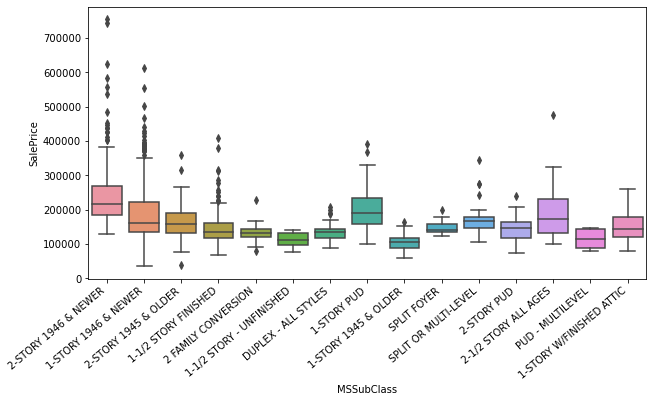

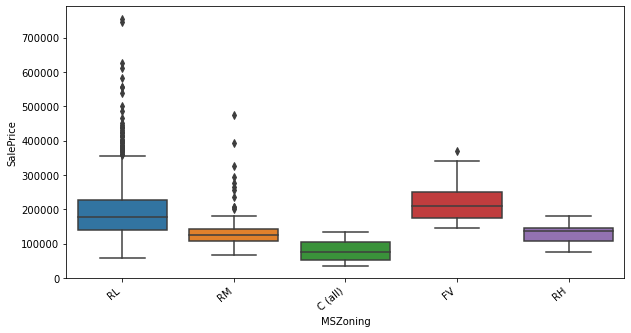

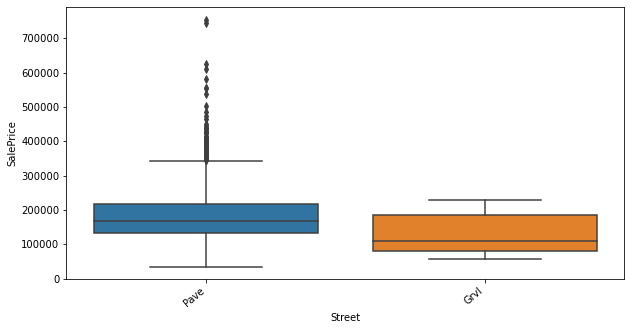

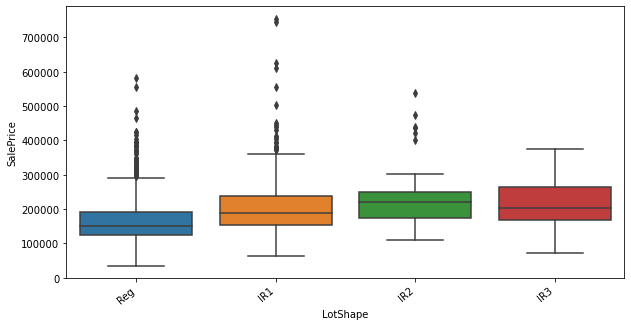

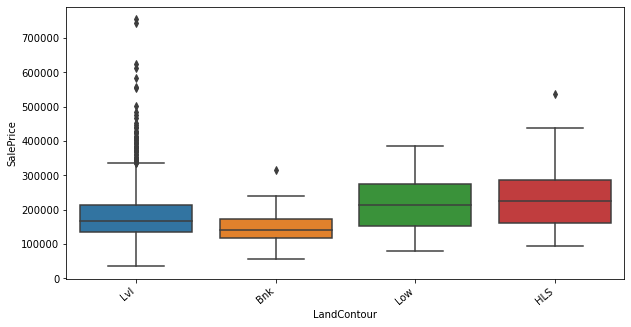

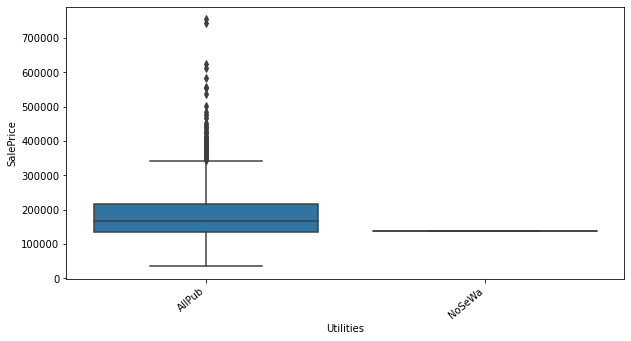

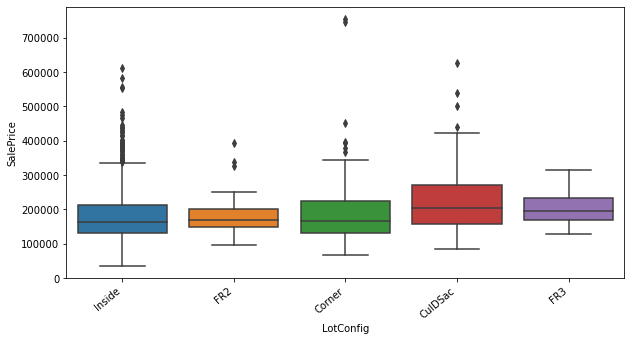

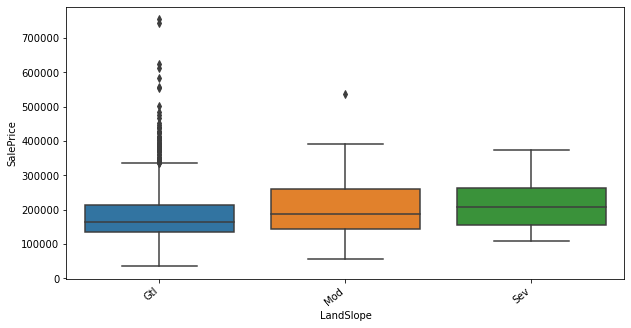

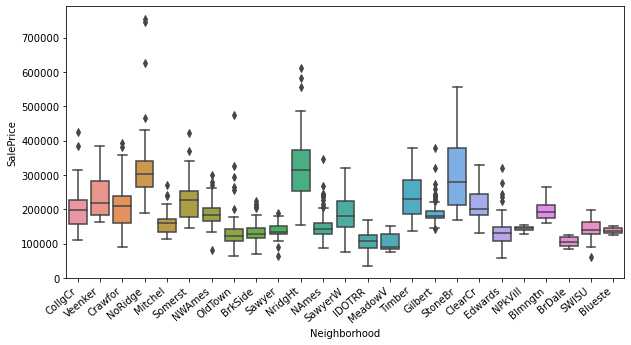

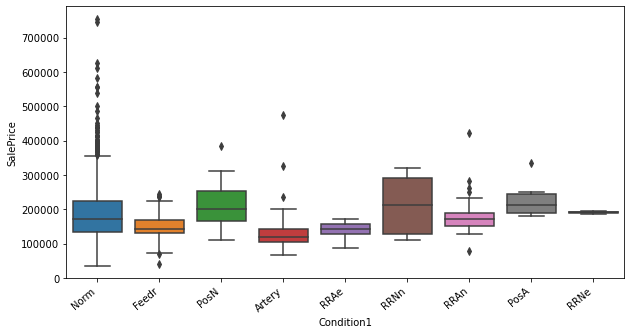

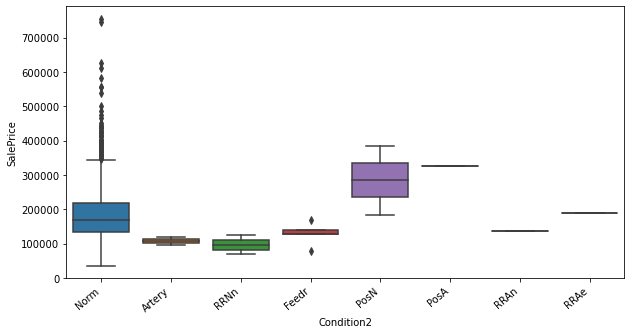

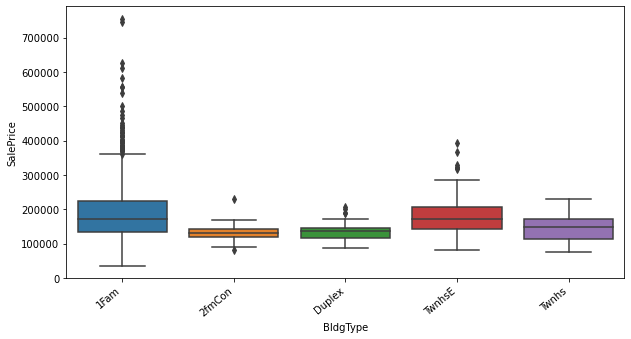

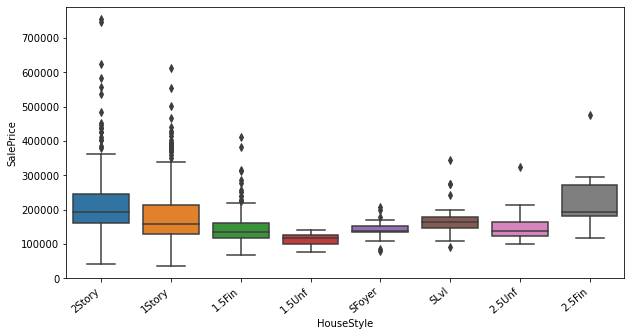

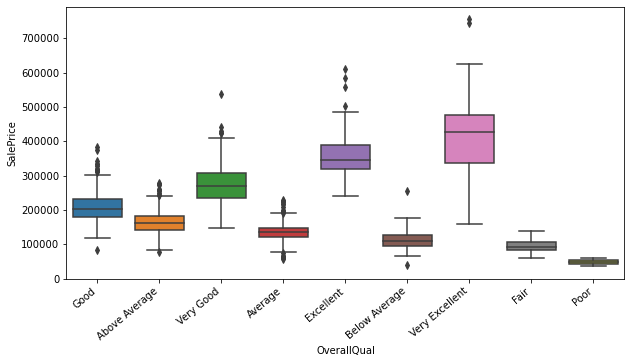

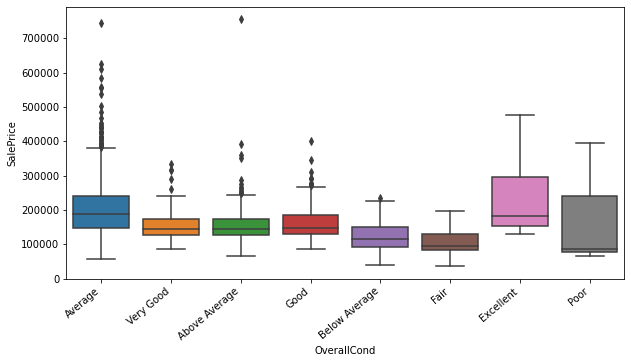

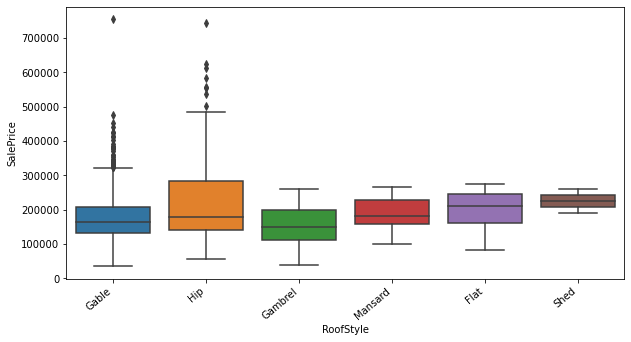

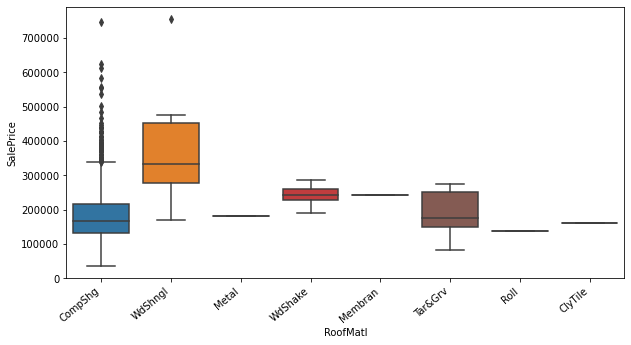

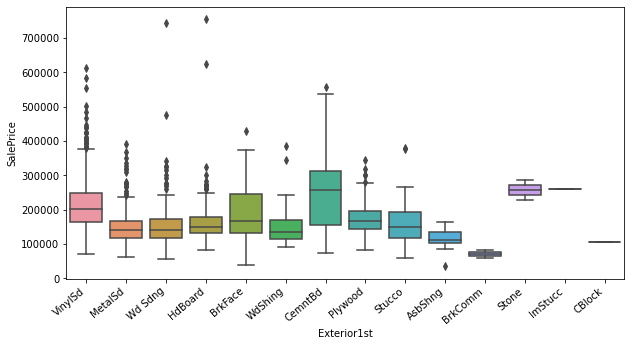

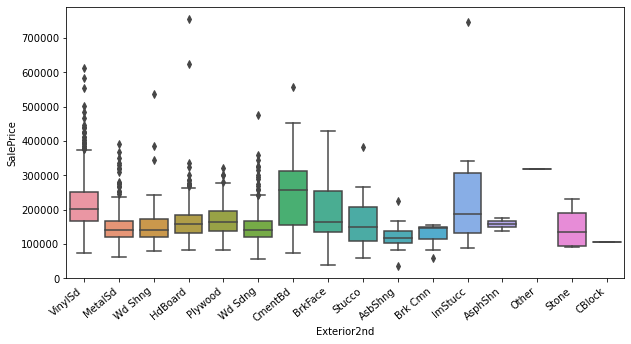

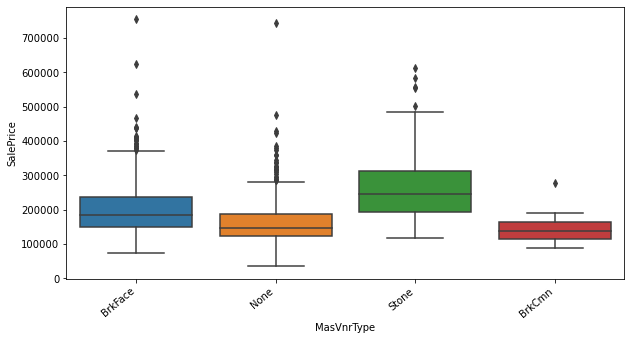

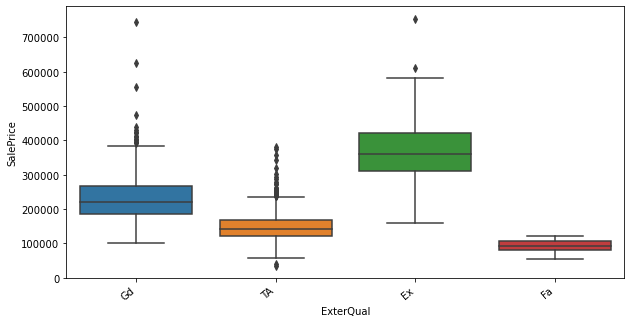

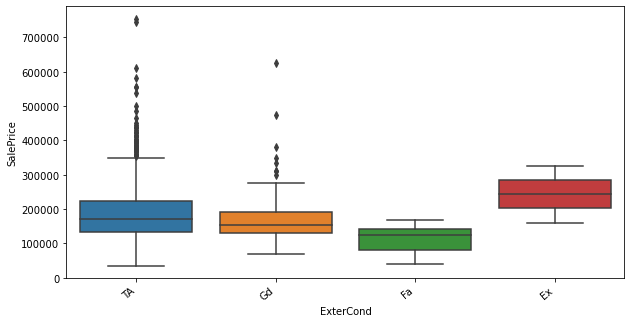

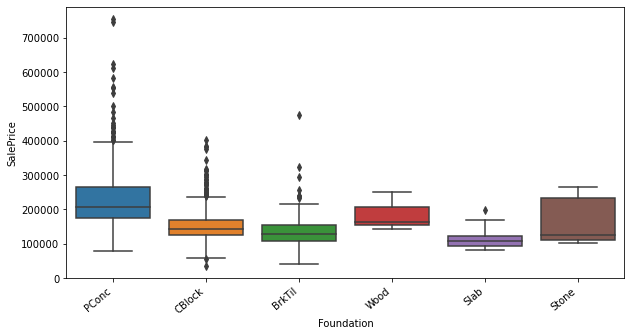

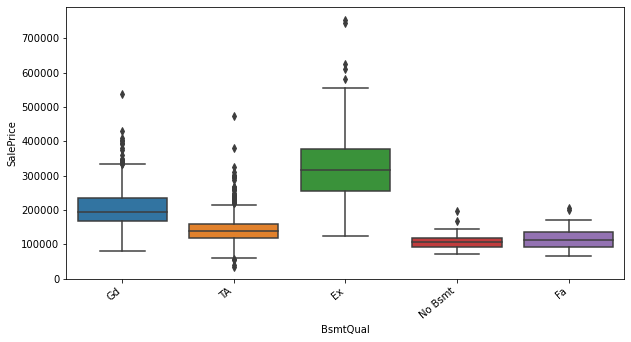

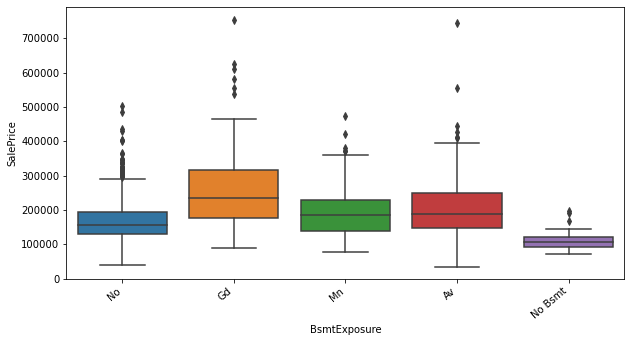

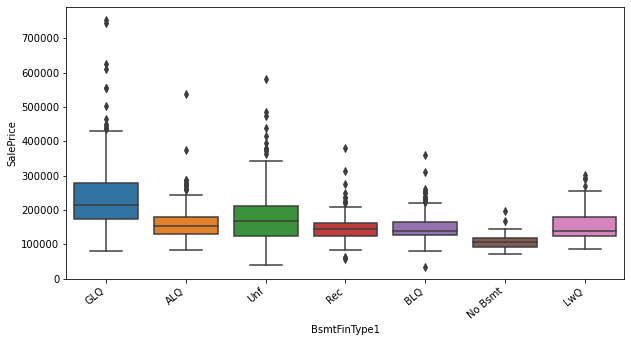

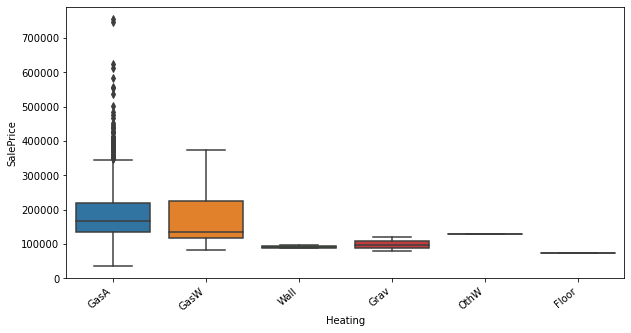

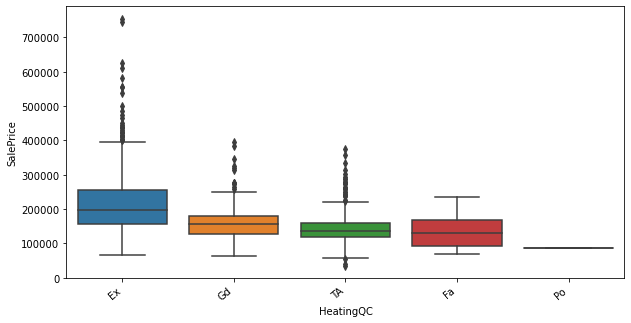

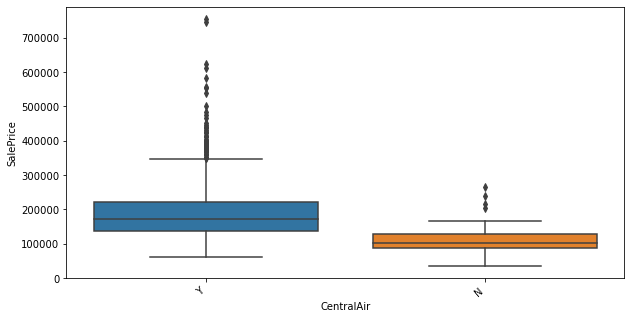

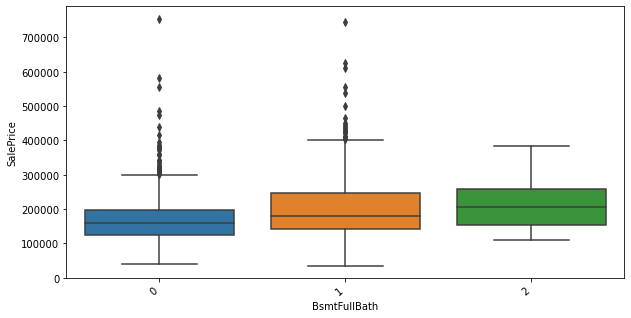

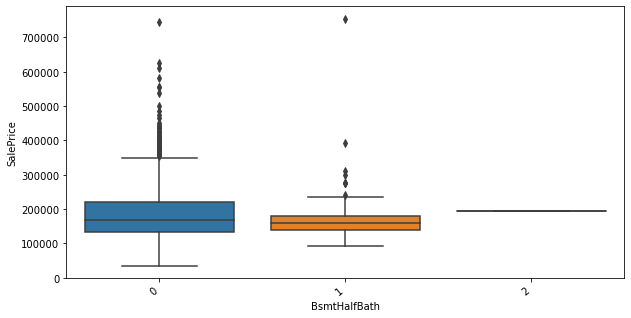

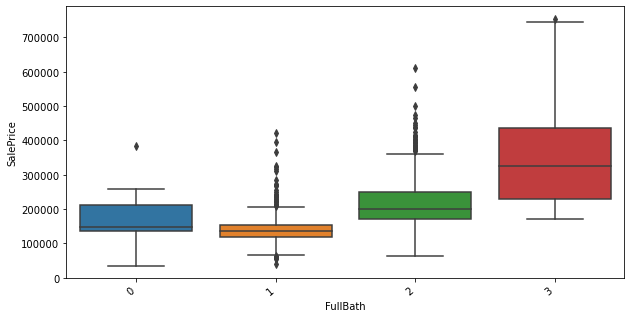

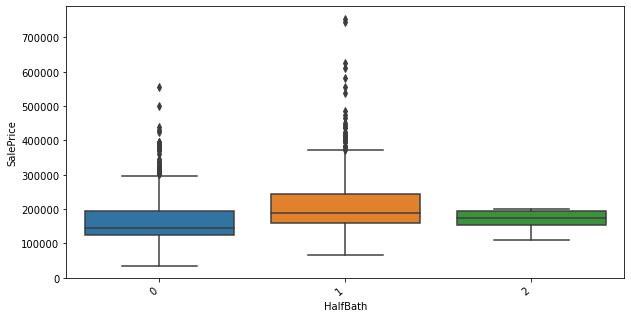

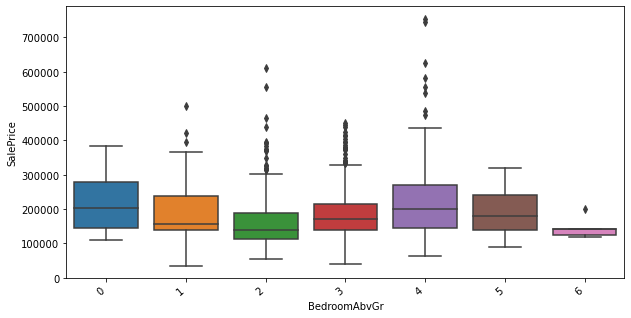

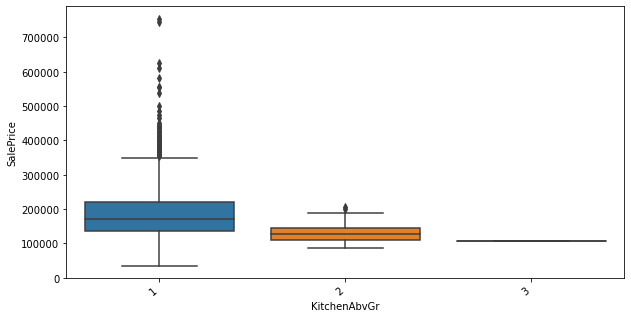

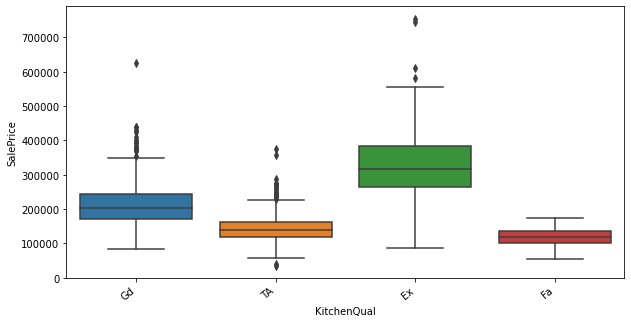

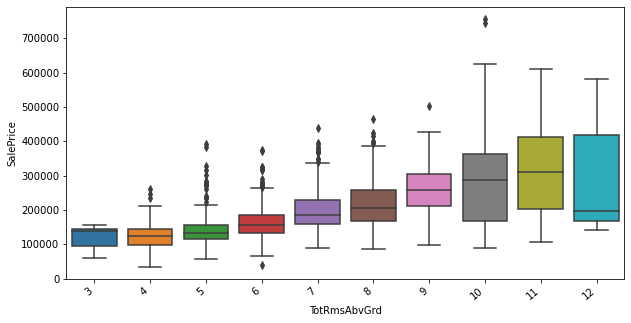

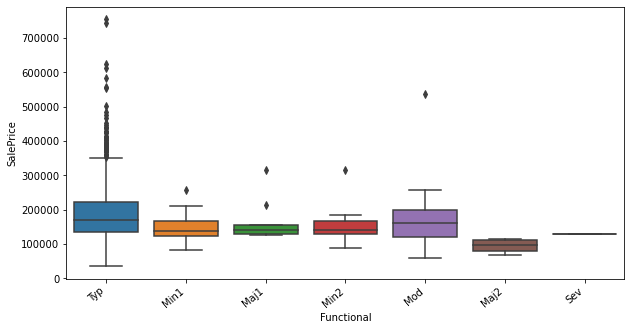

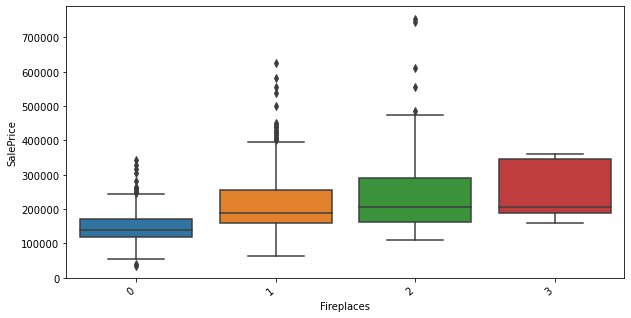

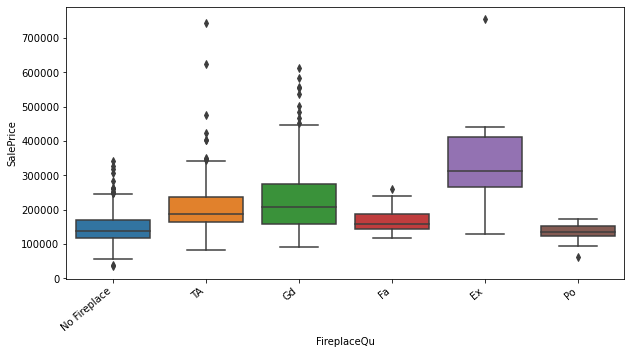

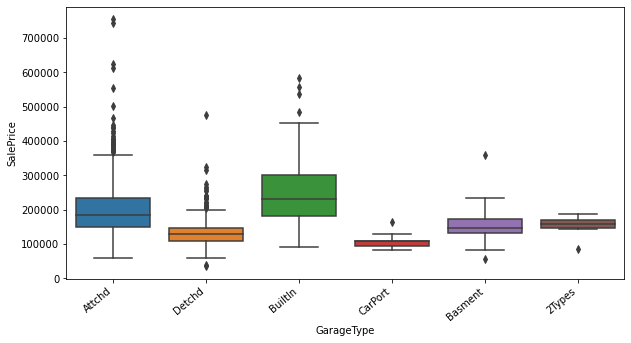

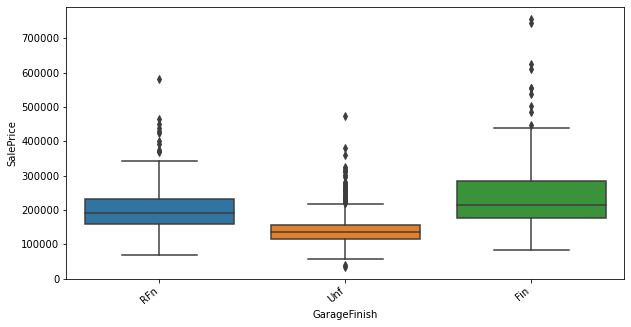

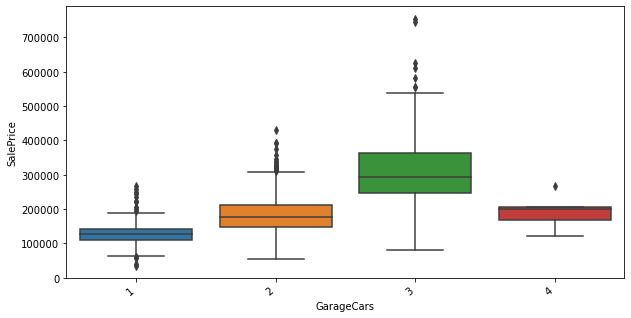

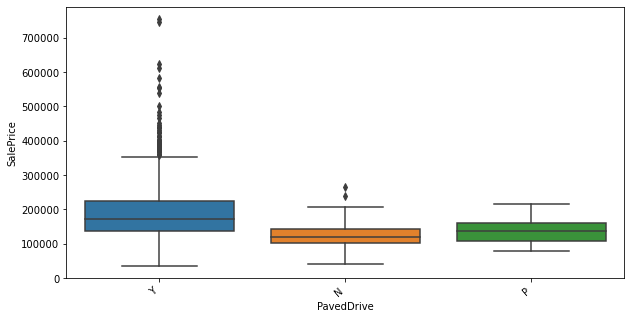

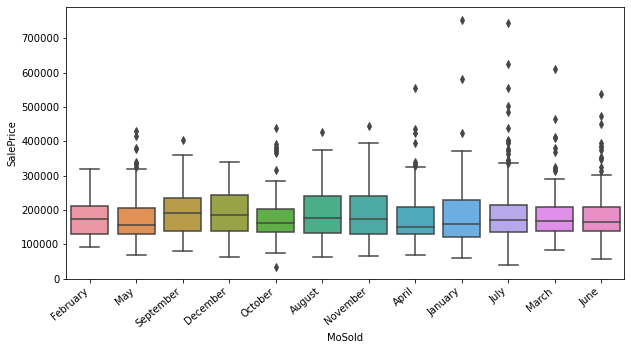

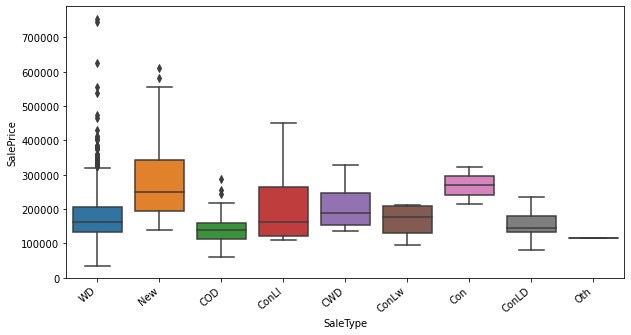

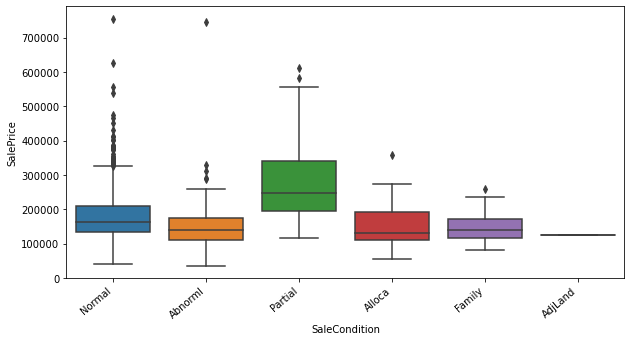

In [1957]:
plt.figure()
for col in objcol:
    plt.figure(figsize=(10,5))
    pltt = sns.boxplot(x= col , y='SalePrice',data = data)
    pltt.set_xticklabels(pltt.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [1958]:
#Analysing the columns which seem to have unusual plot
#Utilities
data.Utilities.value_counts()
#We will drop this column during data preparation as it has same values for all the rows

AllPub    1370
NoSeWa       1
Name: Utilities, dtype: int64

**Visualising Numerical Plots**

In [1959]:
intcol = list((data.dtypes[data.dtypes==np.int64]).index)

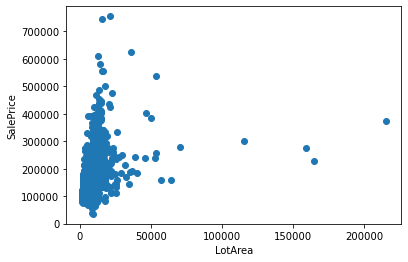

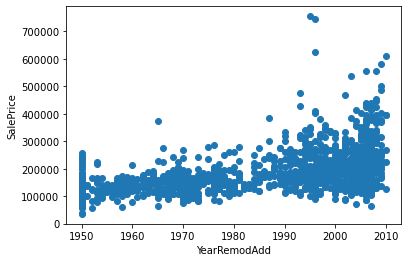

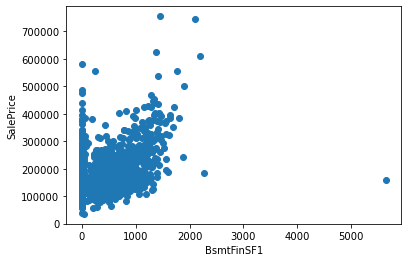

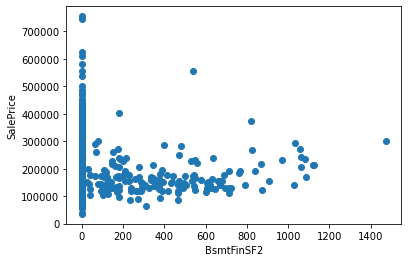

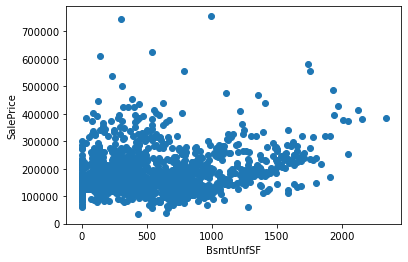

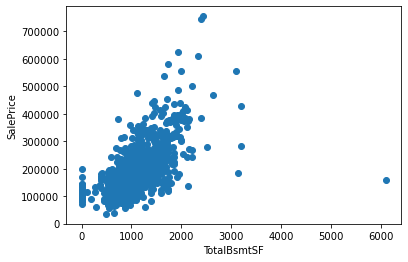

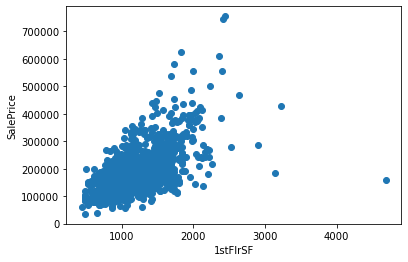

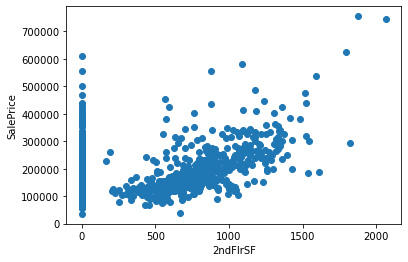

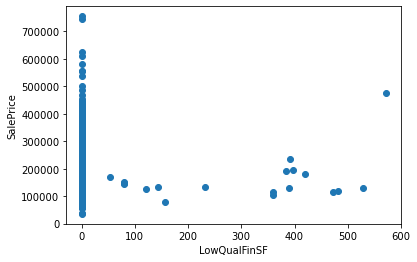

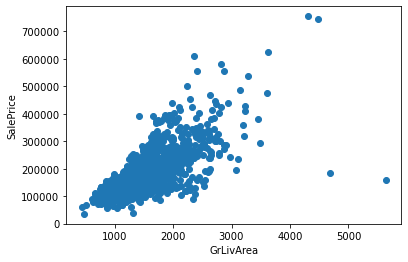

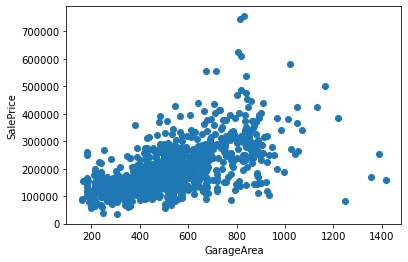

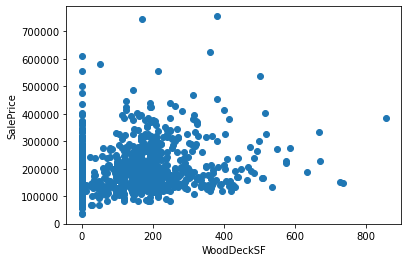

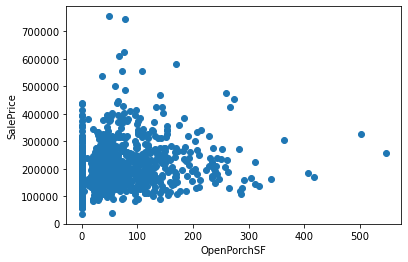

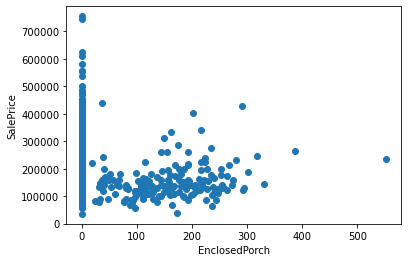

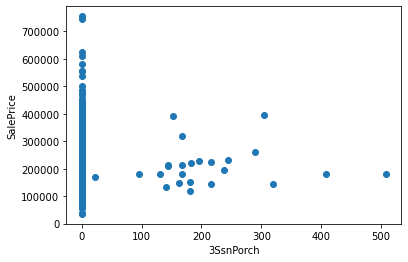

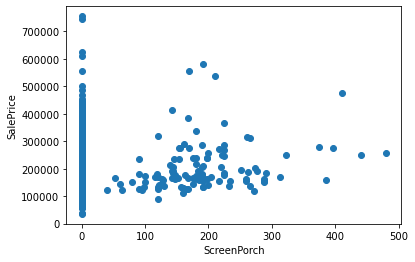

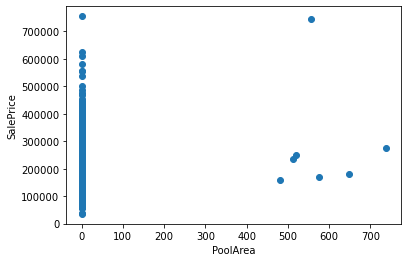

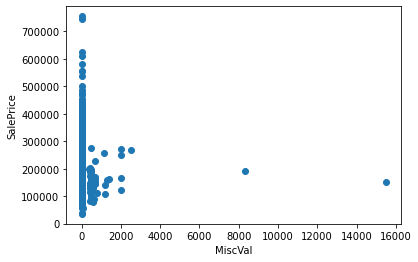

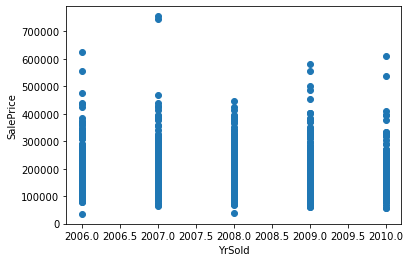

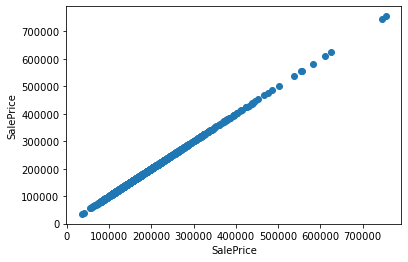

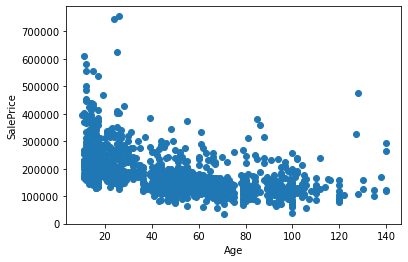

In [1960]:
plt.figure()
for col in intcol:
    plt.scatter(data.loc[:,col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

<Figure size 1440x720 with 0 Axes>

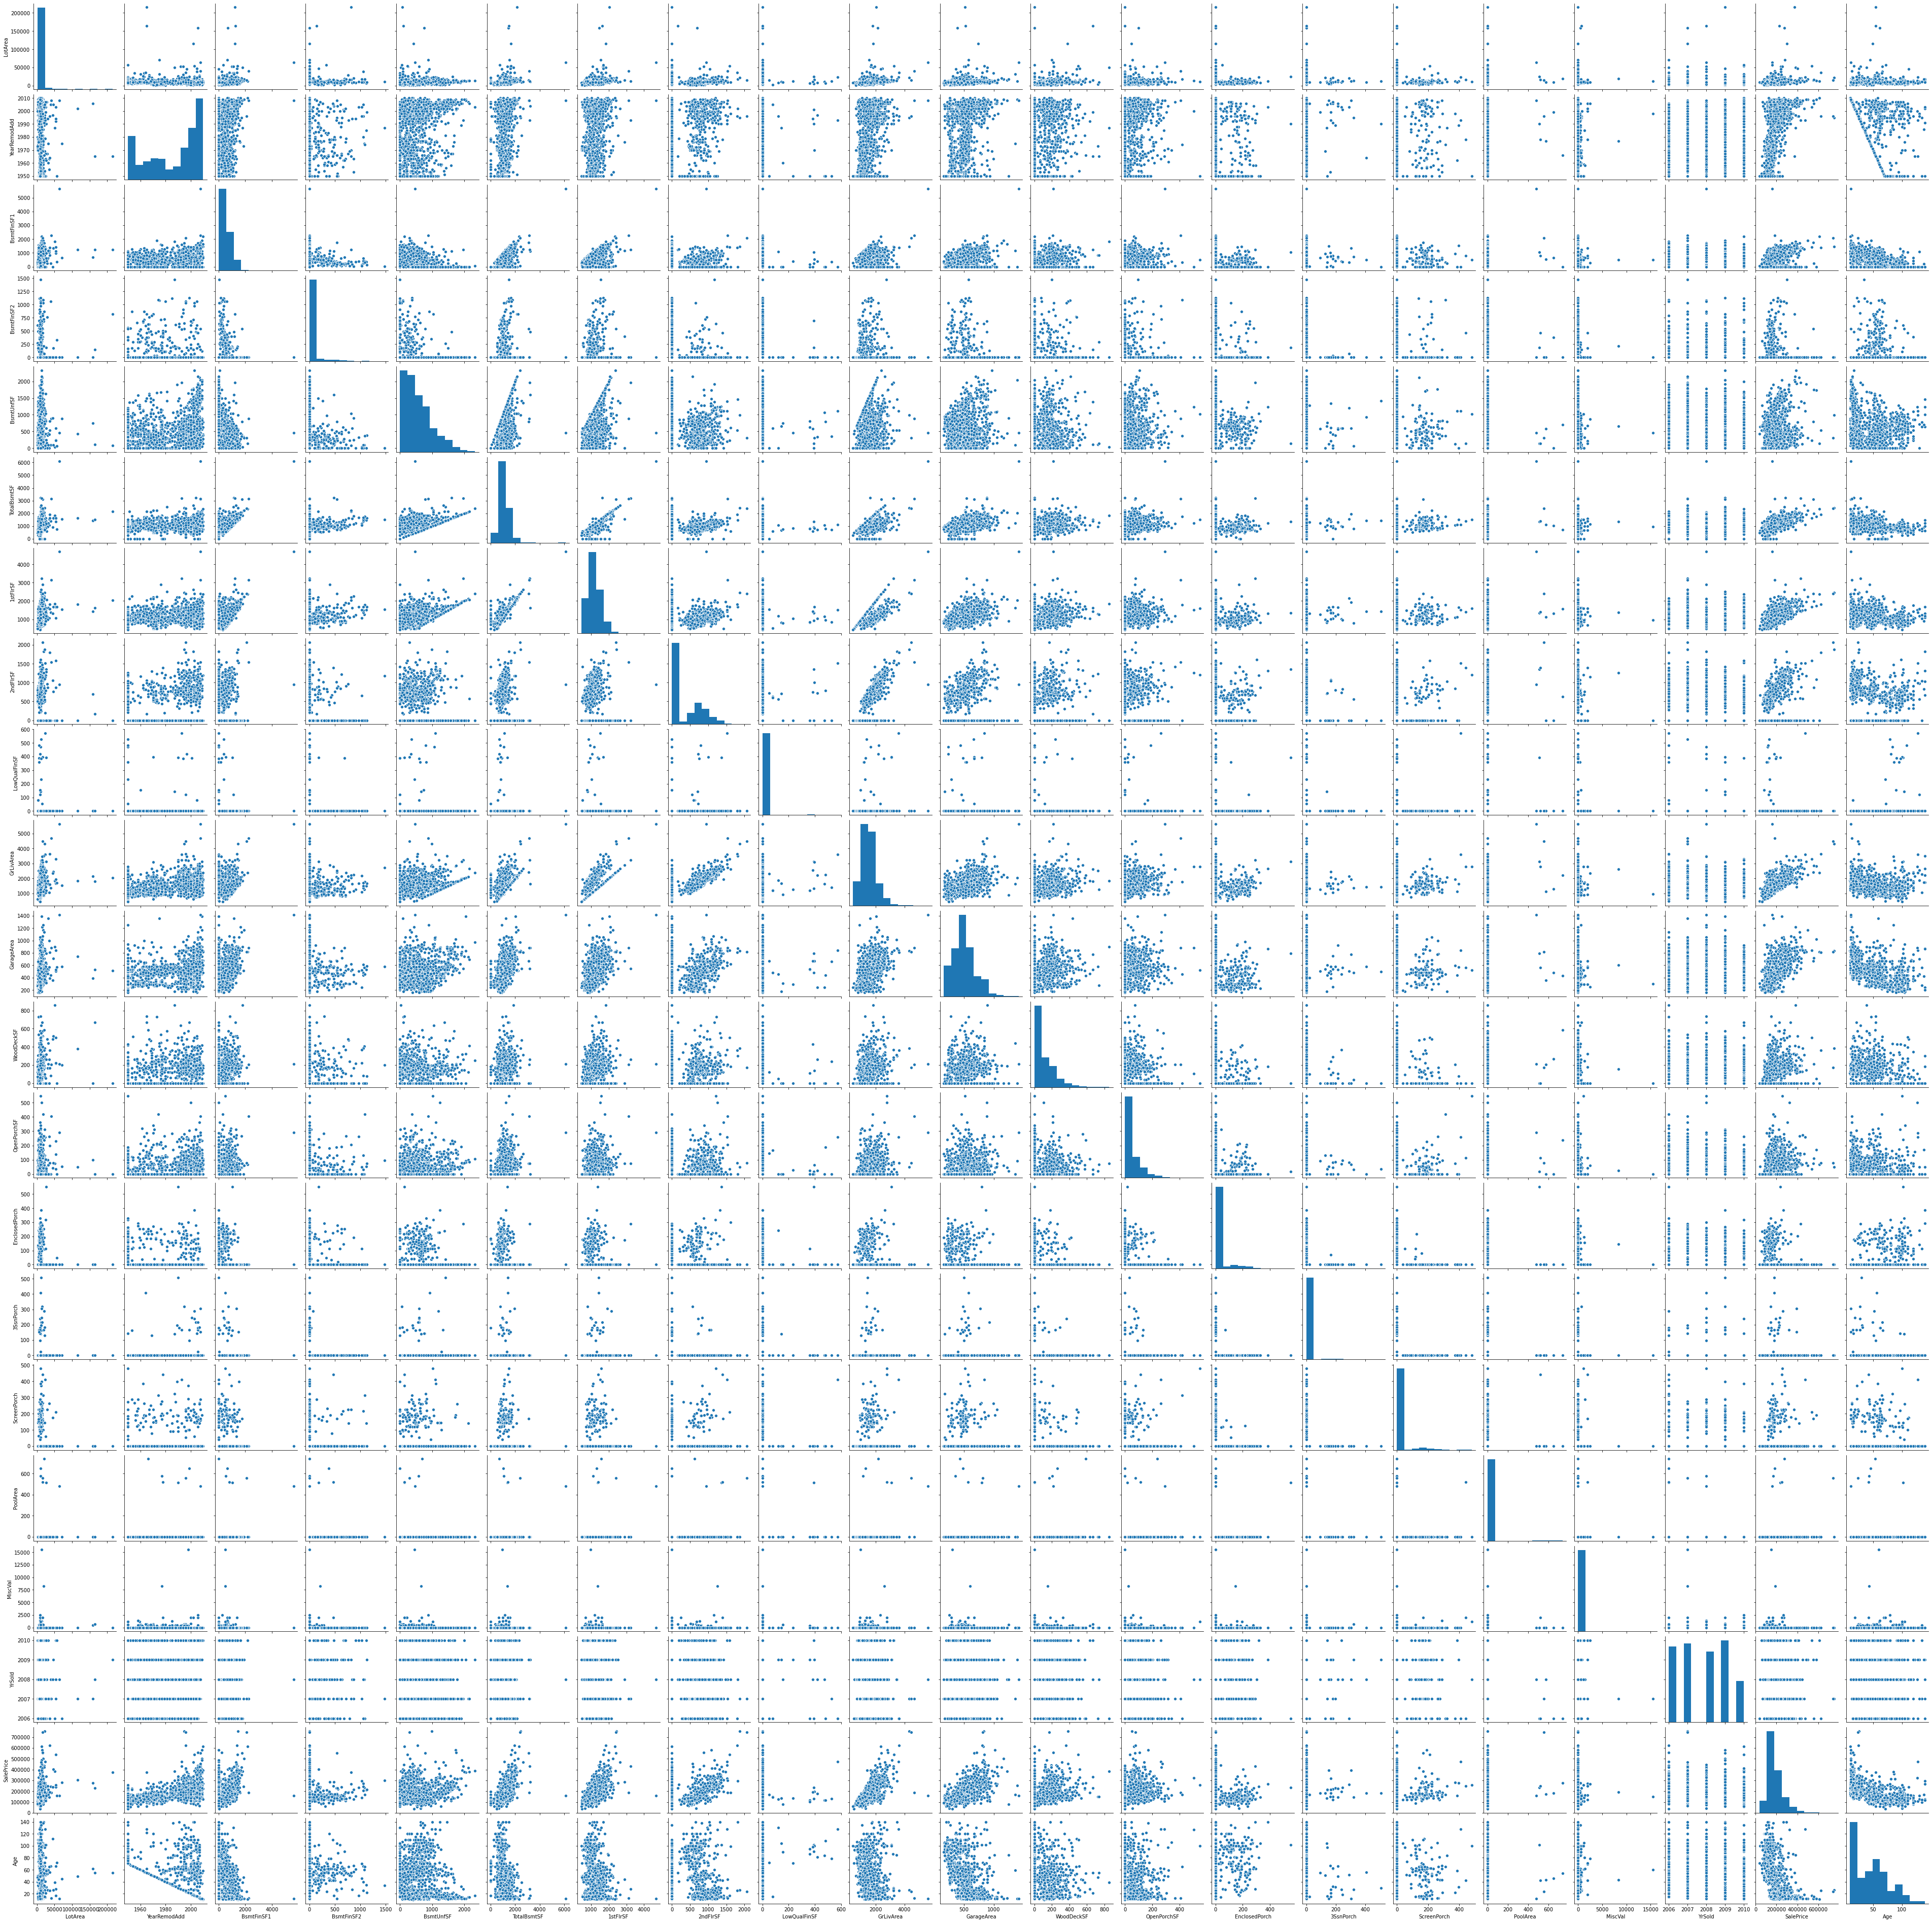

In [1961]:
# pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(data[intcol])
plt.show()

In [1962]:
#corr matrix
data[intcol].corr()

LotArea  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    YrSold  SalePrice       Age
LotArea        1.000000      0.004218    0.209126    0.110511  -0.011381     0.250440  0.287818  0.048247      0.010289   0.255225    0.168129    0.168084     0.086760      -0.018377   0.018586     0.038936  0.077080  0.040443 -0.012466   0.253793  0.004377
YearRemodAdd   0.004218      1.000000    0.113870   -0.076706   0.189720     0.284182  0.237444  0.128392     -0.063111   0.279965    0.381751    0.206197     0.232929      -0.209293   0.044390    -0.046970  0.004419 -0.002913  0.039529   0.505673 -0.615966
BsmtFinSF1     0.209126      0.113870    1.000000   -0.054138  -0.503839     0.519505  0.443983 -0.141519     -0.049864   0.205896    0.287646    0.195795     0.116229      -0.100242   0.024456     0.057514  0.142512  0.007194  0.020406   0.373079 -0.229451
BsmtFinSF2     0.110511     -0.076706   -0.054138    1.000000  -0.215006     0.102041  0.095727 -0.107005      0.007279  -0.018932   -0.046814    0.062961     0.006174       0.045669  -0.031656     0.086898  0.041360  0.005908  0.032882  -0.022252  0.065376
BsmtUnfSF     -0.011381      0.189720   -0.503839   -0.215006   1.000000     0.406701  0.311573 -0.004747     -0.000824   0.227155    0.201956   -0.004151     0.133197       0.000299   0.020427    -0.015072 -0.036590 -0.019074 -0.043343   0.214471 -0.158429
TotalBsmtSF    0.250440      0.284182    0.519505    0.102041   0.406701     1.000000  0.821173 -0.194339     -0.050604   0.441078    0.490968    0.225786     0.260425      -0.088005   0.034596     0.078074  0.128458 -0.009619 -0.010227   0.602981 -0.378322
1stFlrSF       0.287818      0.237444    0.443983    0.095727   0.311573     0.821173  1.000000 -0.220222     -0.018625   0.554373    0.496673    0.229229     0.224037      -0.059026   0.054001     0.082553  0.133746 -0.015071 -0.011670   0.595994 -0.260980
2ndFlrSF       0.048247      0.128392   -0.141519   -0.107005  -0.004747    -0.194339 -0.220222  1.000000      0.045700   0.686231    0.129755    0.088610     0.206509       0.067246  -0.026738     0.037645  0.082518  0.012309 -0.034307   0.316852 -0.016472
LowQualFinSF   0.010289     -0.063111   -0.049864    0.007279  -0.000824    -0.050604 -0.018625  0.045700      1.000000   0.102344    0.015350   -0.007116     0.020876       0.049808  -0.000326     0.045202  0.080478 -0.000302 -0.022045  -0.008015  0.159304
GrLivArea      0.255225      0.279965    0.205896   -0.018932   0.227155     0.441078  0.554373  0.686231      0.102344   1.000000    0.479586    0.244547     0.342621       0.016953   0.017428     0.096622  0.175317 -0.000794 -0.039398   0.709795 -0.195279
GarageArea     0.168129      0.381751    0.287646   -0.046814   0.201956     0.490968  0.496673  0.129755      0.015350   0.479586    1.000000    0.203086     0.271104      -0.108738   0.023941     0.019935  0.061996 -0.029685 -0.024052   0.607210 -0.444662
WoodDeckSF     0.168084      0.206197    0.195795    0.062961  -0.004151     0.225786  0.229229  0.088610     -0.007116   0.244547    0.203086    1.000000     0.065794      -0.126528  -0.036689    -0.083404  0.072977 -0.010503  0.017727   0.312760 -0.215198
OpenPorchSF    0.086760      0.232929    0.116229    0.006174   0.133197     0.260425  0.224037  0.206509      0.020876   0.342621    0.271104    0.065794     1.000000      -0.101433  -0.006767     0.076930  0.063578 -0.015809 -0.067925   0.328475 -0.217322
EnclosedPorch -0.018377     -0.209293   -0.100242    0.045669   0.000299    -0.088005 -0.059026  0.067246      0.049808   0.016953   -0.108738   -0.126528    -0.101433       1.000000  -0.037046    -0.082259  0.057616  0.023102 -0.003733  -0.120320  0.378045
3SsnPorch      0.018586      0.044390    0.024456   -0.031656   0.020427     0.034596  0.054001 -0.026738     -0.000326   0.017428    0.023941   -

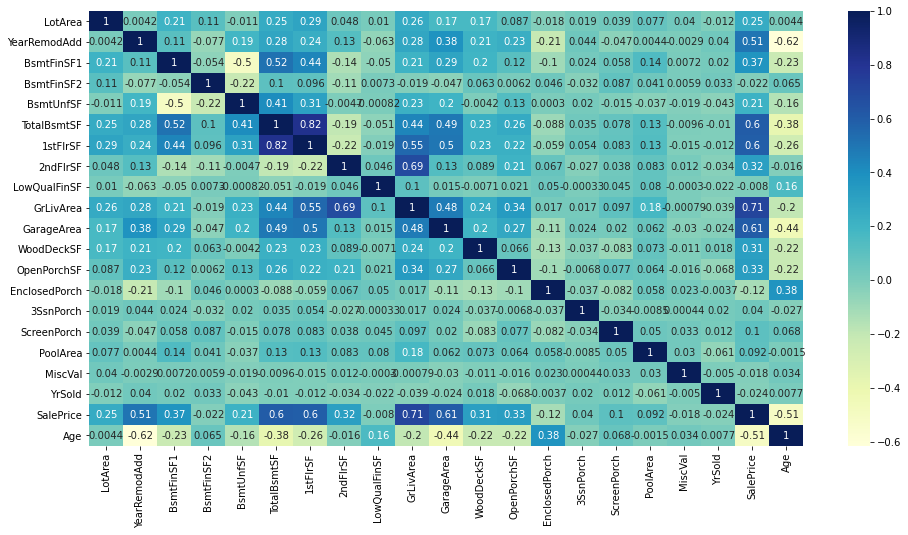

In [1963]:
#heatmap

plt.figure(figsize=(16,8))

sns.heatmap(data[intcol].corr(),cmap="YlGnBu",annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Sale Price with independent variables:
- Price has higher (positive) correlation with TotalBsmtSf,1stFlrSF,GrLivArea,GarageArea

- Price has minimal or no correlation with LowQualFinSF,BsmtFinSF2,3SsnPorch,MiscVal,PoolArea

Correlation among independent variables:
- Some independent variables are  correlated

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [1964]:
#Analysing the columns which seem to have unusual plot
#LowQualFinSF
#3SsnPorch
#PoolArea
#MiscVal
#ScreenPorch

In [1965]:
data.LowQualFinSF.value_counts()

0      1352
80        3
360       2
53        1
120       1
144       1
156       1
232       1
572       1
528       1
390       1
392       1
397       1
420       1
473       1
481       1
384       1
Name: LowQualFinSF, dtype: int64

In [1966]:
data['3SsnPorch'].value_counts()

0      1347
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [1967]:
data['PoolArea'].value_counts()

0      1364
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [1968]:
data['MiscVal'].value_counts()

0        1322
400        10
500         8
700         5
600         4
2000        4
450         3
1200        2
480         2
800         1
1150        1
620         1
15500       1
1400        1
2500        1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

In [1969]:
data['ScreenPorch'].value_counts()

0      1255
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, dtype: int64

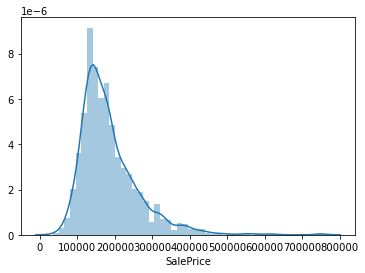

In [1970]:
#Plotting target variable Sale Price
sns.distplot(data['SalePrice'])
plt.show()

## Step 3: Data Preparation

*Dropping columns which do not seem to provide actionable insight after plotting*


In [1971]:
#Droppig categorical columns
del data['Utilities']

In [1972]:
#Removing the Utilities column form objcol list as well before creating dummy variables
objcol.remove('Utilities')

In [1973]:
#Dropping highly skewed numerical columns observed above
#LowQualFinSF
#3SsnPorch
#PoolArea
#MiscVal
del data['LowQualFinSF']
del data['3SsnPorch']
del data['PoolArea']
del data['MiscVal']
del data['ScreenPorch']

In [1974]:
#Removing the above numerical column form intcol list as well
intcol.remove('LowQualFinSF')
intcol.remove('3SsnPorch')
intcol.remove('PoolArea')
intcol.remove('MiscVal')
intcol.remove('ScreenPorch')

In [1975]:
#Verifying the target variable SalePrice as it seems to have outliers
data['SalePrice'].describe()

count      1371.000000
mean     185181.890591
std       78872.352654
min       35311.000000
25%      133950.000000
50%      167000.000000
75%      217750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1976]:
#Transforming the target variable sale price to log value so as to treat the outlier effeciently
data['SalePrice'] = data['SalePrice'].apply(lambda x: round(np.log(x),2))
data['SalePrice'].describe()

count    1371.000000
mean       12.053676
std         0.380073
min        10.470000
25%        11.805000
50%        12.030000
75%        12.290000
max        13.530000
Name: SalePrice, dtype: float64

In [1977]:
#Fetching columns whose data type is object
dummy =pd.get_dummies(data[objcol],drop_first=True)
dummy

MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                                   0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1                                   0                                0                                1                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
2                                   0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
3         

In [1978]:
#adding the dummy table to data table(master df)
data = pd.concat([data,dummy],axis =1 )

In [1979]:
#Dropping the columns for which dummy variables have been created
data = data.drop(objcol,1)

In [1980]:
#Verifying the final dataframe which will be used further
data.head()

LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  YrSold  SalePrice  Age  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  ...  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
0     8450          2003       196.0         706           0        150          856       856       854       1710       2003.0         548           0           61              0    2008      12.25   17                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0  ...                0                0                0               0   
1     9600          1976         0.0         978           0        284         1262      1262         0       1262       1976.0         460         298            0              0    2007      12.11   44                                0                                0                                1                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              1              0                 0              0              0                     0  ...                0                0                0               0   
2    11250          2002       162.0         486           0        434          920       920       866       1786       2001.0         608           0           42              0    2008      12.32   19                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             0                0                0                1                  0              0              0                 1              0              0                     0  ...                0                0                0               0   
3     9550          1970         0.0       

In [1981]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Columns: 271 entries, LotArea to SaleCondition_Partial
dtypes: float64(3), int64(15), uint8(253)
memory usage: 531.7 KB


 *Note-*
 
 * The data has been verified and it has been observed that there are no missing values.
 * The numerical and categorical columns have been handled appropriately.
 * The dummy variables have been created wherever required.
 * The outlier as observed in boxplots are not required to be treated here as it is also a part of the genuine data. 
 * The redundant columns have been dropped.
 * The dataypes of all the columns are also correct.
 

## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.


In [1982]:
#importing train test split library
from sklearn.model_selection import train_test_split

In [1983]:
#Splitting the data into training and test set
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the Features

*Rescaling the numerical columns with values other than 0 or 1 using min max scaling technique*

In [1984]:
#importing min max scaler libraries
from sklearn.preprocessing import MinMaxScaler

In [1985]:
#Creating object for min max scaler
scaler=MinMaxScaler()

In [1986]:
#Scaling the data
#using intcol for getting all the numerical columns
df_train[intcol] = scaler.fit_transform(df_train[intcol])
df_train.head()

LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  YrSold  SalePrice       Age  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  ...  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
1199  0.077454      0.433333       359.0    0.093551         0.0   0.493151     0.274959  0.294844       0.0   0.220454       1967.0    0.254372    0.000000     0.000000       0.000000    0.75   0.531381  0.325581                                0                                0                                0                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                1            0            0            1            0            1             0             0             0                0                0                1                  1              0              0                 0              0              0                     0  ...                0                0                0               0   
721   0.027820      0.533333         0.0    0.121368         0.0   0.074058     0.140426  0.089095       0.0   0.048150       1983.0    0.330684    0.163043     0.000000       0.000000    0.75   0.368201  0.209302                                0                                0                                0                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       1                                0            0            0            1            0            1             0             0             0                0                0                1                  1              0              0                 0              0              0                     0  ...                0                0                0               0   
622   0.031901      0.800000       258.0    0.201630         0.0   0.115582     0.230442  0.284153       0.0   0.211500       1994.0    0.329889    0.304348     0.076782       0.000000    0.50   0.518828  0.116279                                0                                0                                1                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0  ...                0                0                0               0   
1216  0.034

In [1987]:
#Transforming the test data
#using intcol for getting all the numerical columns
df_test[intcol] = scaler.transform(df_test[intcol])
df_test.head()

LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  YrSold  SalePrice       Age  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  ...  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
1072  0.040501      0.950000       340.0    0.203756         0.0   0.135274     0.239935  0.233547  0.749175   0.440111       2006.0    0.709062    0.169837     0.263254       0.000000    0.25   0.849372  0.023256                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0  ...                0                0                0               0   
714   0.038000      0.816667       673.0    0.206060         0.0   0.038099     0.204910  0.186505  0.603410   0.347990       1999.0    0.553259    0.000000     0.234004       0.000000    0.75   0.753138  0.077519                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0  ...                0                0                0               0   
1060  0.049059      0.916667         0.0    0.000000         0.0   0.362586     0.138625  0.086481  0.611661   0.267211       2004.0    0.217806    0.135870     0.087751       0.000000    0.25   0.564854  0.038760                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             0                0                0                1                  0              0              0                 1              0              0                     0  ...                0                0                0               0   
399   0.035

*Dividing into X and y train and test data sets for modelling*

In [1988]:
#train data
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1989]:
#test data
y_test=df_test.pop('SalePrice')
X_test = df_test

In [1990]:
#Verifying x train sets
X_train.head()

LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  YrSold       Age  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  ...  Functional_Maj2  Functional_Min1  Functional_Min2  \
1199  0.077454      0.433333       359.0    0.093551         0.0   0.493151     0.274959  0.294844       0.0   0.220454       1967.0    0.254372    0.000000     0.000000       0.000000    0.75  0.325581                                0                                0                                0                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                1            0            0            1            0            1             0             0             0                0                0                1                  1              0              0                 0              0              0                     0                    0  ...                0                0                0   
721   0.027820      0.533333         0.0    0.121368         0.0   0.074058     0.140426  0.089095       0.0   0.048150       1983.0    0.330684    0.163043     0.000000       0.000000    0.75  0.209302                                0                                0                                0                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       1                                0            0            0            1            0            1             0             0             0                0                0                1                  1              0              0                 0              0              0                     0                    0  ...                0                0                0   
622   0.031901      0.800000       258.0    0.201630         0.0   0.115582     0.230442  0.284153       0.0   0.211500       1994.0    0.329889    0.304348     0.076782       0.000000    0.50  0.116279                                0                                0                                1                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0  ...                0                0                0   
1216  0.034588      0.216667       

In [1991]:
#Verifying y train sets
y_train.head()

1199    0.531381
721     0.368201
622     0.518828
1216    0.426778
28      0.548117
Name: SalePrice, dtype: float64

In [1992]:
#Verifying x test sets
X_test.head()

LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  YrSold       Age  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  ...  Functional_Maj2  Functional_Min1  Functional_Min2  \
1072  0.040501      0.950000       340.0    0.203756         0.0   0.135274     0.239935  0.233547  0.749175   0.440111       2006.0    0.709062    0.169837     0.263254       0.000000    0.25  0.023256                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0  ...                0                0                0   
714   0.038000      0.816667       673.0    0.206060         0.0   0.038099     0.204910  0.186505  0.603410   0.347990       1999.0    0.553259    0.000000     0.234004       0.000000    0.75  0.077519                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0  ...                0                0                0   
1060  0.049059      0.916667         0.0    0.000000         0.0   0.362586     0.138625  0.086481  0.611661   0.267211       2004.0    0.217806    0.135870     0.087751       0.000000    0.25  0.038760                                0                                0                                0                       0                                    0                               0                                0                                0                                1                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0  ...                0                0                0   
399   0.035991      0.100000       

In [1993]:
#Verifying y test sets
y_test.head()

1072    0.849372
714     0.753138
1060    0.564854
399     0.380753
382     0.481172
Name: SalePrice, dtype: float64

## Step 5: Building a linear model

**Model building using Different Regression Techniques**

**RFE for Feature Selection**

In [1994]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

*Selecting 50 features*

In [1995]:
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [1996]:
#Verifying the vairables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('YearRemodAdd', False, 119),
 ('MasVnrArea', False, 216),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 5),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 13),
 ('2ndFlrSF', False, 14),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', False, 215),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 76),
 ('OpenPorchSF', False, 75),
 ('EnclosedPorch', False, 101),
 ('YrSold', False, 211),
 ('Age', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER', False, 3),
 ('MSSubClass_1-STORY PUD', False, 9),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', True, 1),
 ('MSSubClass_2 FAMILY CONVERSION', True, 1),
 ('MSSubClass_2-1/2 STORY ALL AGES', True, 1),
 ('MSSubClass_2-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_2-STORY 1946 & NEWER', True, 1),
 ('MSSubClass_2-STORY PUD', True, 1),
 ('MSSubClass_DUPLEX - ALL STYLES', True, 1),
 ('MSSubClass_PUD - MULTILEVEL', True, 1),


In [1997]:
col= X_train.columns[rfe.support_]

In [1998]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe= X_train[col]

In [1999]:
X_train_rfe

LotArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  GrLivArea  GarageArea       Age  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSZoning_FV  MSZoning_RL  MSZoning_RM  Condition2_Feedr  Condition2_Norm  Condition2_RRAe  Condition2_RRNn  BldgType_Duplex  HouseStyle_1.5Unf  OverallCond_Poor  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_BrkComm  Exterior1st_CBlock  Exterior2nd_CBlock  BsmtExposure_No Bsmt  BsmtFinType1_No Bsmt  Functional_Sev  Fireplaces_1  Fireplaces_3  FireplaceQu_No Fireplace  SaleType_New  SaleCondition_Partial
1199  0.077454    0.093551    0.000000     0.274959   0.220454    0.254372  0.325581                                0                                0                                    0                               0                                0                                0                                0                       0                               0                            0            0            1            0                 0                1                0                0                0                  0                 0                1                  0              0                  0               0                 1                 0               0              0                 0                 0                 0                    0                   0                   0                     0                     0               0             1             0                         0             0                      0
721   0.027820    0.121368    0.000000     0.140426   0.048150    0.330684  0.209302                                0                                0                                    0                               0                                0                                0                                0                       0                               0                            0            0            1            0                 0                1                0                0                0                  0                 0                0                  0              1                  0               0                 1                 0               0              0                 0                 0                 0                    0                   0                   0                     0                     0               0             0             0                         1             0                      0
622   0.031901    0.201630    0.000000     0.230442   0.211500    0.329889  0.116279                                0                                0                                    0                               0                                0                                0                                0                       0                               0                            0            0            1            0                 0                1                0                0                0                  0                 0                1                  0              0                  0               0                 1                 0               0              0                 0                 0                 0                    0                   0                   0                     0                     0               0             1             0                         0             0                      0
1216  0.034588    0.137491    0.000000     0.183306   0.101870    0

In [2000]:
#Adding the constant
X_train_rfe = sm.add_constant(X_train_rfe)
#fitting the 1st linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:24   Log-Likelihood:                 1440.4
No. Observations:                 959   AIC:                            -2787.
Df Residuals:                     912   BIC:                            -2558.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.5150      0.064     -8.068      0.000      -0.640      -0.390
LotArea                                 0.1464      0.037      3.978      0.000       0.074       0.219
BsmtFinSF1                              0.2599      0.029      9.117      0.000       0.204       0.316
BsmtFinSF2                              0.0274      0.017      1.645      0.100      -0.005       0.060
TotalBsmtSF                             0.2763      0.055      4.996      0.000       0.168       0.385
GrLivArea                               0.7081      0.037     18.958      0.000       0.635       0.781
GarageArea                              0.1220      0.017      7.054      0.000       0.088       0.156
Age                                    -0.2818      0.016    -17.353      0.000      -0.314      -0.250
MSSubClass_1-1/2 STORY FINISHED         0.0266      0.009      2.982      0.003       0.009       0.044
MSSubClass_1-STORY 1945 & OLDER         0.0171      0.012      1.377      0.169      -0.007       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1009      0.056      1.795      0.073      -0.009       0.211
MSSubClass_2 FAMILY CONVERSION         -0.0372      0.016     -2.280      0.023      -0.069      -0.005
MSSubClass_2-1/2 STORY ALL AGES         0.0365      0.021      1.717      0.086      -0.005       0.078
MSSubClass_2-STORY 1945 & OLDER         0.0985      0.013      7.524      0.000       0.073       0.124
MSSubClass_2-STORY 1946 & NEWER        -0.0086      0.008     -1.065      0.287      -0.025       0.007
MSSubClass_2-STORY PUD                 -0.0620      0.011     -5.570      0.000      -0.084      -0.040
MSSubClass_DUPLEX - ALL STYLES         -0.0364      0.006     -5.916      0.000      -0.048      -0.024
MSSubClass_PUD - MULTILEVEL            -0.0566      0.029     -1.956      0.051      -0.113       0.000
MSZoning_FV                             0.0747      0.018      4.172      0.000       0.040       0.110
MSZoning_RL                             0.0525      0.015      3.416      0.001       0.022       0.083
MSZoning_RM                             0.0399      0.016      2.490      0.013       0.008       0.071
Condition2_Feedr                        0.0359      0.058      0.618      0.537      -0.078       0.150
Condition2_Norm                         0.0490      0.041      1.182      0.237      -0.032       0.130
Condition2_RRAe                        -0.0714      0.111     -0.642      0.521      -0.290       0.147
Condition2_RRNn                         0.0791      0.070      1.127      0.260      -0.059       0.217
BldgType_Duplex                        -0.0364      0.006     -5.916      0.000      -0.048      -0.024
HouseStyle_1.5Unf                       0.0576      0.020      2.87

In [2001]:
#dropping constant
X_train_rfe = X_train_rfe.drop(['const'],axis=1)

In [2002]:
#Dropping variables with higher p value
X_train_new = X_train_rfe.drop(['Condition2_Feedr'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1440.2
No. Observations:                 959   AIC:                            -2788.
Df Residuals:                     913   BIC:                            -2565.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4980      0.058     -8.644      0.000      -0.611      -0.385
LotArea                                 0.1475      0.037      4.012      0.000       0.075       0.220
BsmtFinSF1                              0.2589      0.028      9.099      0.000       0.203       0.315
BsmtFinSF2                              0.0273      0.017      1.638      0.102      -0.005       0.060
TotalBsmtSF                             0.2753      0.055      4.981      0.000       0.167       0.384
GrLivArea                               0.7088      0.037     18.990      0.000       0.636       0.782
GarageArea                              0.1221      0.017      7.061      0.000       0.088       0.156
Age                                    -0.2817      0.016    -17.354      0.000      -0.314      -0.250
MSSubClass_1-1/2 STORY FINISHED         0.0263      0.009      2.954      0.003       0.009       0.044
MSSubClass_1-STORY 1945 & OLDER         0.0168      0.012      1.352      0.177      -0.008       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1003      0.056      1.787      0.074      -0.010       0.211
MSSubClass_2 FAMILY CONVERSION         -0.0386      0.016     -2.388      0.017      -0.070      -0.007
MSSubClass_2-1/2 STORY ALL AGES         0.0360      0.021      1.695      0.090      -0.006       0.078
MSSubClass_2-STORY 1945 & OLDER         0.0991      0.013      7.591      0.000       0.073       0.125
MSSubClass_2-STORY 1946 & NEWER        -0.0087      0.008     -1.078      0.281      -0.025       0.007
MSSubClass_2-STORY PUD                 -0.0623      0.011     -5.608      0.000      -0.084      -0.040
MSSubClass_DUPLEX - ALL STYLES         -0.0365      0.006     -5.936      0.000      -0.049      -0.024
MSSubClass_PUD - MULTILEVEL            -0.0571      0.029     -1.974      0.049      -0.114      -0.000
MSZoning_FV                             0.0748      0.018      4.177      0.000       0.040       0.110
MSZoning_RL                             0.0525      0.015      3.415      0.001       0.022       0.083
MSZoning_RM                             0.0402      0.016      2.512      0.012       0.009       0.072
Condition2_Norm                         0.0306      0.029      1.061      0.289      -0.026       0.087
Condition2_RRAe                        -0.0903      0.107     -0.844      0.399      -0.300       0.120
Condition2_RRNn                         0.0602      0.063      0.953      0.341      -0.064       0.184
BldgType_Duplex                        -0.0365      0.006     -5.936      0.000      -0.049      -0.024
HouseStyle_1.5Unf                       0.0554      0.020      2.812      0.005       0.017       0.094
OverallCond_Poor                       -0.1980      0.040     -4.94

In [2003]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1440.2
No. Observations:                 959   AIC:                            -2788.
Df Residuals:                     913   BIC:                            -2565.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4980      0.058     -8.644      0.000      -0.611      -0.385
LotArea                                 0.1475      0.037      4.012      0.000       0.075       0.220
BsmtFinSF1                              0.2589      0.028      9.099      0.000       0.203       0.315
BsmtFinSF2                              0.0273      0.017      1.638      0.102      -0.005       0.060
TotalBsmtSF                             0.2753      0.055      4.981      0.000       0.167       0.384
GrLivArea                               0.7088      0.037     18.990      0.000       0.636       0.782
GarageArea                              0.1221      0.017      7.061      0.000       0.088       0.156
Age                                    -0.2817      0.016    -17.354      0.000      -0.314      -0.250
MSSubClass_1-1/2 STORY FINISHED         0.0263      0.009      2.954      0.003       0.009       0.044
MSSubClass_1-STORY 1945 & OLDER         0.0168      0.012      1.352      0.177      -0.008       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1003      0.056      1.787      0.074      -0.010       0.211
MSSubClass_2 FAMILY CONVERSION         -0.0386      0.016     -2.388      0.017      -0.070      -0.007
MSSubClass_2-1/2 STORY ALL AGES         0.0360      0.021      1.695      0.090      -0.006       0.078
MSSubClass_2-STORY 1945 & OLDER         0.0991      0.013      7.591      0.000       0.073       0.125
MSSubClass_2-STORY 1946 & NEWER        -0.0087      0.008     -1.078      0.281      -0.025       0.007
MSSubClass_2-STORY PUD                 -0.0623      0.011     -5.608      0.000      -0.084      -0.040
MSSubClass_DUPLEX - ALL STYLES         -0.0365      0.006     -5.936      0.000      -0.049      -0.024
MSSubClass_PUD - MULTILEVEL            -0.0571      0.029     -1.974      0.049      -0.114      -0.000
MSZoning_FV                             0.0748      0.018      4.177      0.000       0.040       0.110
MSZoning_RL                             0.0525      0.015      3.415      0.001       0.022       0.083
MSZoning_RM                             0.0402      0.016      2.512      0.012       0.009       0.072
Condition2_Norm                         0.0306      0.029      1.061      0.289      -0.026       0.087
Condition2_RRAe                        -0.0903      0.107     -0.844      0.399      -0.300       0.120
Condition2_RRNn                         0.0602      0.063      0.953      0.341      -0.064       0.184
BldgType_Duplex                        -0.0365      0.006     -5.936      0.000      -0.049      -0.024
HouseStyle_1.5Unf                       0.0554      0.020      2.812      0.005       0.017       0.094
OverallCond_Poor                       -0.1980      0.040     -4.94

In [2004]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     152.8
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1439.9
No. Observations:                 959   AIC:                            -2790.
Df Residuals:                     914   BIC:                            -2571.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4972      0.058     -8.632      0.000      -0.610      -0.384
LotArea                                 0.1480      0.037      4.030      0.000       0.076       0.220
BsmtFinSF1                              0.2586      0.028      9.093      0.000       0.203       0.314
BsmtFinSF2                              0.0271      0.017      1.629      0.104      -0.006       0.060
TotalBsmtSF                             0.2744      0.055      4.967      0.000       0.166       0.383
GrLivArea                               0.7092      0.037     19.006      0.000       0.636       0.782
GarageArea                              0.1220      0.017      7.058      0.000       0.088       0.156
Age                                    -0.2822      0.016    -17.403      0.000      -0.314      -0.250
MSSubClass_1-1/2 STORY FINISHED         0.0258      0.009      2.906      0.004       0.008       0.043
MSSubClass_1-STORY 1945 & OLDER         0.0168      0.012      1.356      0.175      -0.008       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1003      0.056      1.787      0.074      -0.010       0.210
MSSubClass_2 FAMILY CONVERSION         -0.0386      0.016     -2.387      0.017      -0.070      -0.007
MSSubClass_2-1/2 STORY ALL AGES         0.0359      0.021      1.692      0.091      -0.006       0.077
MSSubClass_2-STORY 1945 & OLDER         0.0990      0.013      7.591      0.000       0.073       0.125
MSSubClass_2-STORY 1946 & NEWER        -0.0089      0.008     -1.100      0.272      -0.025       0.007
MSSubClass_2-STORY PUD                 -0.0625      0.011     -5.627      0.000      -0.084      -0.041
MSSubClass_DUPLEX - ALL STYLES         -0.0365      0.006     -5.938      0.000      -0.049      -0.024
MSSubClass_PUD - MULTILEVEL            -0.0573      0.029     -1.984      0.048      -0.114      -0.001
MSZoning_FV                             0.0746      0.018      4.168      0.000       0.039       0.110
MSZoning_RL                             0.0522      0.015      3.402      0.001       0.022       0.082
MSZoning_RM                             0.0402      0.016      2.514      0.012       0.009       0.072
Condition2_Norm                         0.0306      0.029      1.062      0.289      -0.026       0.087
Condition2_RRAe                        -0.0905      0.107     -0.846      0.398      -0.300       0.119
Condition2_RRNn                         0.0601      0.063      0.953      0.341      -0.064       0.184
BldgType_Duplex                        -0.0365      0.006     -5.938      0.000      -0.049      -0.024
HouseStyle_1.5Unf                       0.0554      0.020      2.814      0.005       0.017       0.094
OverallCond_Poor                       -0.1980      0.040     -4.95

In [2005]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['Condition2_RRAe'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1439.5
No. Observations:                 959   AIC:                            -2791.
Df Residuals:                     915   BIC:                            -2577.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.5104      0.055     -9.207      0.000      -0.619      -0.402
LotArea                                 0.1480      0.037      4.031      0.000       0.076       0.220
BsmtFinSF1                              0.2598      0.028      9.147      0.000       0.204       0.316
BsmtFinSF2                              0.0272      0.017      1.632      0.103      -0.006       0.060
TotalBsmtSF                             0.2765      0.055      5.009      0.000       0.168       0.385
GrLivArea                               0.7047      0.037     19.081      0.000       0.632       0.777
GarageArea                              0.1233      0.017      7.156      0.000       0.089       0.157
Age                                    -0.2825      0.016    -17.429      0.000      -0.314      -0.251
MSSubClass_1-1/2 STORY FINISHED         0.0266      0.009      3.002      0.003       0.009       0.044
MSSubClass_1-STORY 1945 & OLDER         0.0172      0.012      1.392      0.164      -0.007       0.042
MSSubClass_1-STORY W/FINISHED ATTIC     0.1254      0.048      2.633      0.009       0.032       0.219
MSSubClass_2 FAMILY CONVERSION         -0.0378      0.016     -2.342      0.019      -0.069      -0.006
MSSubClass_2-1/2 STORY ALL AGES         0.0372      0.021      1.761      0.079      -0.004       0.079
MSSubClass_2-STORY 1945 & OLDER         0.1005      0.013      7.766      0.000       0.075       0.126
MSSubClass_2-STORY 1946 & NEWER        -0.0083      0.008     -1.029      0.304      -0.024       0.008
MSSubClass_2-STORY PUD                 -0.0620      0.011     -5.590      0.000      -0.084      -0.040
MSSubClass_DUPLEX - ALL STYLES         -0.0369      0.006     -6.023      0.000      -0.049      -0.025
MSSubClass_PUD - MULTILEVEL            -0.0571      0.029     -1.977      0.048      -0.114      -0.000
MSZoning_FV                             0.0743      0.018      4.152      0.000       0.039       0.109
MSZoning_RL                             0.0521      0.015      3.393      0.001       0.022       0.082
MSZoning_RM                             0.0399      0.016      2.496      0.013       0.009       0.071
Condition2_Norm                         0.0375      0.028      1.354      0.176      -0.017       0.092
Condition2_RRNn                         0.0668      0.063      1.068      0.286      -0.056       0.190
BldgType_Duplex                        -0.0369      0.006     -6.023      0.000      -0.049      -0.025
HouseStyle_1.5Unf                       0.0563      0.020      2.863      0.004       0.018       0.095
OverallCond_Poor                       -0.1983      0.040     -4.958      0.000      -0.277      -0.120
RoofStyle_Gable                        -0.6211      0.037    -16.86

In [2006]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['Fireplaces_3'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1439.1
No. Observations:                 959   AIC:                            -2792.
Df Residuals:                     916   BIC:                            -2583.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4925      0.052     -9.554      0.000      -0.594      -0.391
LotArea                                 0.1466      0.037      3.995      0.000       0.075       0.219
BsmtFinSF1                              0.2608      0.028      9.194      0.000       0.205       0.317
BsmtFinSF2                              0.0268      0.017      1.613      0.107      -0.006       0.060
TotalBsmtSF                             0.2771      0.055      5.022      0.000       0.169       0.385
GrLivArea                               0.7072      0.037     19.205      0.000       0.635       0.779
GarageArea                              0.1229      0.017      7.138      0.000       0.089       0.157
Age                                    -0.2826      0.016    -17.436      0.000      -0.314      -0.251
MSSubClass_1-1/2 STORY FINISHED         0.0262      0.009      2.967      0.003       0.009       0.044
MSSubClass_1-STORY 1945 & OLDER         0.0173      0.012      1.393      0.164      -0.007       0.042
MSSubClass_1-STORY W/FINISHED ATTIC     0.1251      0.048      2.627      0.009       0.032       0.219
MSSubClass_2 FAMILY CONVERSION         -0.0380      0.016     -2.357      0.019      -0.070      -0.006
MSSubClass_2-1/2 STORY ALL AGES         0.0366      0.021      1.733      0.083      -0.005       0.078
MSSubClass_2-STORY 1945 & OLDER         0.1001      0.013      7.745      0.000       0.075       0.126
MSSubClass_2-STORY 1946 & NEWER        -0.0087      0.008     -1.081      0.280      -0.025       0.007
MSSubClass_2-STORY PUD                 -0.0622      0.011     -5.614      0.000      -0.084      -0.040
MSSubClass_DUPLEX - ALL STYLES         -0.0371      0.006     -6.057      0.000      -0.049      -0.025
MSSubClass_PUD - MULTILEVEL            -0.0572      0.029     -1.981      0.048      -0.114      -0.001
MSZoning_FV                             0.0743      0.018      4.156      0.000       0.039       0.109
MSZoning_RL                             0.0521      0.015      3.395      0.001       0.022       0.082
MSZoning_RM                             0.0400      0.016      2.500      0.013       0.009       0.071
Condition2_Norm                         0.0377      0.028      1.361      0.174      -0.017       0.092
Condition2_RRNn                         0.0673      0.063      1.075      0.282      -0.056       0.190
BldgType_Duplex                        -0.0371      0.006     -6.057      0.000      -0.049      -0.025
HouseStyle_1.5Unf                       0.0563      0.020      2.864      0.004       0.018       0.095
OverallCond_Poor                       -0.1983      0.040     -4.959      0.000      -0.277      -0.120
RoofStyle_Gable                        -0.6067      0.033    -18.42

In [2007]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['Condition2_RRNn'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1438.5
No. Observations:                 959   AIC:                            -2793.
Df Residuals:                     917   BIC:                            -2589.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4812      0.050     -9.535      0.000      -0.580      -0.382
LotArea                                 0.1471      0.037      4.010      0.000       0.075       0.219
BsmtFinSF1                              0.2604      0.028      9.178      0.000       0.205       0.316
BsmtFinSF2                              0.0285      0.017      1.722      0.085      -0.004       0.061
TotalBsmtSF                             0.2763      0.055      5.008      0.000       0.168       0.385
GrLivArea                               0.7056      0.037     19.176      0.000       0.633       0.778
GarageArea                              0.1242      0.017      7.232      0.000       0.091       0.158
Age                                    -0.2820      0.016    -17.410      0.000      -0.314      -0.250
MSSubClass_1-1/2 STORY FINISHED         0.0259      0.009      2.935      0.003       0.009       0.043
MSSubClass_1-STORY 1945 & OLDER         0.0167      0.012      1.346      0.179      -0.008       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1286      0.048      2.705      0.007       0.035       0.222
MSSubClass_2 FAMILY CONVERSION         -0.0392      0.016     -2.432      0.015      -0.071      -0.008
MSSubClass_2-1/2 STORY ALL AGES         0.0362      0.021      1.713      0.087      -0.005       0.078
MSSubClass_2-STORY 1945 & OLDER         0.0990      0.013      7.681      0.000       0.074       0.124
MSSubClass_2-STORY 1946 & NEWER        -0.0086      0.008     -1.068      0.286      -0.024       0.007
MSSubClass_2-STORY PUD                 -0.0624      0.011     -5.637      0.000      -0.084      -0.041
MSSubClass_DUPLEX - ALL STYLES         -0.0373      0.006     -6.095      0.000      -0.049      -0.025
MSSubClass_PUD - MULTILEVEL            -0.0579      0.029     -2.003      0.045      -0.115      -0.001
MSZoning_FV                             0.0743      0.018      4.153      0.000       0.039       0.109
MSZoning_RL                             0.0519      0.015      3.383      0.001       0.022       0.082
MSZoning_RM                             0.0403      0.016      2.523      0.012       0.009       0.072
Condition2_Norm                         0.0246      0.025      0.990      0.322      -0.024       0.074
BldgType_Duplex                        -0.0373      0.006     -6.095      0.000      -0.049      -0.025
HouseStyle_1.5Unf                       0.0544      0.020      2.779      0.006       0.016       0.093
OverallCond_Poor                       -0.1984      0.040     -4.961      0.000      -0.277      -0.120
RoofStyle_Gable                        -0.6033      0.033    -18.408      0.000      -0.668      -0.539
RoofStyle_Gambrel                      -0.5805      0.044    -13.27

In [2008]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['Condition2_Norm'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1438.0
No. Observations:                 959   AIC:                            -2794.
Df Residuals:                     918   BIC:                            -2594.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4606      0.046    -10.013      0.000      -0.551      -0.370
LotArea                                 0.1482      0.037      4.043      0.000       0.076       0.220
BsmtFinSF1                              0.2596      0.028      9.153      0.000       0.204       0.315
BsmtFinSF2                              0.0274      0.017      1.658      0.098      -0.005       0.060
TotalBsmtSF                             0.2777      0.055      5.034      0.000       0.169       0.386
GrLivArea                               0.7058      0.037     19.182      0.000       0.634       0.778
GarageArea                              0.1230      0.017      7.180      0.000       0.089       0.157
Age                                    -0.2818      0.016    -17.398      0.000      -0.314      -0.250
MSSubClass_1-1/2 STORY FINISHED         0.0259      0.009      2.930      0.003       0.009       0.043
MSSubClass_1-STORY 1945 & OLDER         0.0167      0.012      1.352      0.177      -0.008       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1361      0.047      2.901      0.004       0.044       0.228
MSSubClass_2 FAMILY CONVERSION         -0.0407      0.016     -2.538      0.011      -0.072      -0.009
MSSubClass_2-1/2 STORY ALL AGES         0.0363      0.021      1.720      0.086      -0.005       0.078
MSSubClass_2-STORY 1945 & OLDER         0.0976      0.013      7.620      0.000       0.072       0.123
MSSubClass_2-STORY 1946 & NEWER        -0.0085      0.008     -1.056      0.291      -0.024       0.007
MSSubClass_2-STORY PUD                 -0.0622      0.011     -5.619      0.000      -0.084      -0.040
MSSubClass_DUPLEX - ALL STYLES         -0.0374      0.006     -6.108      0.000      -0.049      -0.025
MSSubClass_PUD - MULTILEVEL            -0.0573      0.029     -1.984      0.048      -0.114      -0.001
MSZoning_FV                             0.0741      0.018      4.143      0.000       0.039       0.109
MSZoning_RL                             0.0516      0.015      3.365      0.001       0.022       0.082
MSZoning_RM                             0.0396      0.016      2.479      0.013       0.008       0.071
BldgType_Duplex                        -0.0374      0.006     -6.108      0.000      -0.049      -0.025
HouseStyle_1.5Unf                       0.0519      0.019      2.673      0.008       0.014       0.090
OverallCond_Poor                       -0.1974      0.040     -4.938      0.000      -0.276      -0.119
RoofStyle_Gable                        -0.5986      0.032    -18.458      0.000      -0.662      -0.535
RoofStyle_Gambrel                      -0.5748      0.043    -13.255      0.000      -0.660      -0.490
RoofStyle_Hip                          -0.5906      0.033    -17.91

In [2009]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['MSSubClass_2-STORY 1946 & NEWER'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1437.4
No. Observations:                 959   AIC:                            -2795.
Df Residuals:                     919   BIC:                            -2600.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4735      0.044    -10.674      0.000      -0.561      -0.386
LotArea                                 0.1472      0.037      4.017      0.000       0.075       0.219
BsmtFinSF1                              0.2597      0.028      9.159      0.000       0.204       0.315
BsmtFinSF2                              0.0272      0.017      1.644      0.101      -0.005       0.060
TotalBsmtSF                             0.3156      0.042      7.540      0.000       0.233       0.398
GrLivArea                               0.6792      0.027     25.309      0.000       0.627       0.732
GarageArea                              0.1240      0.017      7.245      0.000       0.090       0.158
Age                                    -0.2760      0.015    -18.138      0.000      -0.306      -0.246
MSSubClass_1-1/2 STORY FINISHED         0.0286      0.008      3.372      0.001       0.012       0.045
MSSubClass_1-STORY 1945 & OLDER         0.0160      0.012      1.292      0.197      -0.008       0.040
MSSubClass_1-STORY W/FINISHED ATTIC     0.1341      0.047      2.861      0.004       0.042       0.226
MSSubClass_2 FAMILY CONVERSION         -0.0388      0.016     -2.435      0.015      -0.070      -0.008
MSSubClass_2-1/2 STORY ALL AGES         0.0414      0.021      2.013      0.044       0.001       0.082
MSSubClass_2-STORY 1945 & OLDER         0.1007      0.012      8.074      0.000       0.076       0.125
MSSubClass_2-STORY PUD                 -0.0573      0.010     -5.709      0.000      -0.077      -0.038
MSSubClass_DUPLEX - ALL STYLES         -0.0365      0.006     -6.022      0.000      -0.048      -0.025
MSSubClass_PUD - MULTILEVEL            -0.0536      0.029     -1.870      0.062      -0.110       0.003
MSZoning_FV                             0.0734      0.018      4.107      0.000       0.038       0.108
MSZoning_RL                             0.0510      0.015      3.326      0.001       0.021       0.081
MSZoning_RM                             0.0389      0.016      2.438      0.015       0.008       0.070
BldgType_Duplex                        -0.0365      0.006     -6.022      0.000      -0.048      -0.025
HouseStyle_1.5Unf                       0.0510      0.019      2.632      0.009       0.013       0.089
OverallCond_Poor                       -0.1989      0.040     -4.979      0.000      -0.277      -0.121
RoofStyle_Gable                        -0.6064      0.032    -19.194      0.000      -0.668      -0.544
RoofStyle_Gambrel                      -0.5832      0.043    -13.676      0.000      -0.667      -0.499
RoofStyle_Hip                          -0.5981      0.032    -18.575      0.000      -0.661      -0.535
RoofStyle_Mansard                      -0.5600      0.040    -14.04

In [2010]:

#Dropping variables with higher p value
X_train_new = X_train_new.drop(['BsmtExposure_No Bsmt'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:25   Log-Likelihood:                 1437.4
No. Observations:                 959   AIC:                            -2795.
Df Residuals:                     919   BIC:                            -2600.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4735      0.044    -10.674      0.000      -0.561      -0.386
LotArea                                 0.1472      0.037      4.017      0.000       0.075       0.219
BsmtFinSF1                              0.2597      0.028      9.159      0.000       0.204       0.315
BsmtFinSF2                              0.0272      0.017      1.644      0.101      -0.005       0.060
TotalBsmtSF                             0.3156      0.042      7.540      0.000       0.233       0.398
GrLivArea                               0.6792      0.027     25.309      0.000       0.627       0.732
GarageArea                              0.1240      0.017      7.245      0.000       0.090       0.158
Age                                    -0.2760      0.015    -18.138      0.000      -0.306      -0.246
MSSubClass_1-1/2 STORY FINISHED         0.0286      0.008      3.372      0.001       0.012       0.045
MSSubClass_1-STORY 1945 & OLDER         0.0160      0.012      1.292      0.197      -0.008       0.040
MSSubClass_1-STORY W/FINISHED ATTIC     0.1341      0.047      2.861      0.004       0.042       0.226
MSSubClass_2 FAMILY CONVERSION         -0.0388      0.016     -2.435      0.015      -0.070      -0.008
MSSubClass_2-1/2 STORY ALL AGES         0.0414      0.021      2.013      0.044       0.001       0.082
MSSubClass_2-STORY 1945 & OLDER         0.1007      0.012      8.074      0.000       0.076       0.125
MSSubClass_2-STORY PUD                 -0.0573      0.010     -5.709      0.000      -0.077      -0.038
MSSubClass_DUPLEX - ALL STYLES         -0.0365      0.006     -6.022      0.000      -0.048      -0.025
MSSubClass_PUD - MULTILEVEL            -0.0536      0.029     -1.870      0.062      -0.110       0.003
MSZoning_FV                             0.0734      0.018      4.107      0.000       0.038       0.108
MSZoning_RL                             0.0510      0.015      3.326      0.001       0.021       0.081
MSZoning_RM                             0.0389      0.016      2.438      0.015       0.008       0.070
BldgType_Duplex                        -0.0365      0.006     -6.022      0.000      -0.048      -0.025
HouseStyle_1.5Unf                       0.0510      0.019      2.632      0.009       0.013       0.089
OverallCond_Poor                       -0.1989      0.040     -4.979      0.000      -0.277      -0.121
RoofStyle_Gable                        -0.6064      0.032    -19.194      0.000      -0.668      -0.544
RoofStyle_Gambrel                      -0.5832      0.043    -13.676      0.000      -0.667      -0.499
RoofStyle_Hip                          -0.5981      0.032    -18.575      0.000      -0.661      -0.535
RoofStyle_Mansard                      -0.5600      0.040    -14.04

In [2011]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['BsmtFinType1_No Bsmt'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     176.9
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:26   Log-Likelihood:                 1437.1
No. Observations:                 959   AIC:                            -2796.
Df Residuals:                     920   BIC:                            -2606.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4801      0.044    -11.028      0.000      -0.566      -0.395
LotArea                                 0.1461      0.037      3.990      0.000       0.074       0.218
BsmtFinSF1                              0.2599      0.028      9.168      0.000       0.204       0.316
BsmtFinSF2                              0.0272      0.017      1.648      0.100      -0.005       0.060
TotalBsmtSF                             0.3307      0.037      8.931      0.000       0.258       0.403
GrLivArea                               0.6781      0.027     25.312      0.000       0.625       0.731
GarageArea                              0.1228      0.017      7.207      0.000       0.089       0.156
Age                                    -0.2759      0.015    -18.137      0.000      -0.306      -0.246
MSSubClass_1-1/2 STORY FINISHED         0.0289      0.008      3.413      0.001       0.012       0.045
MSSubClass_1-STORY 1945 & OLDER         0.0163      0.012      1.324      0.186      -0.008       0.041
MSSubClass_1-STORY W/FINISHED ATTIC     0.1325      0.047      2.830      0.005       0.041       0.224
MSSubClass_2 FAMILY CONVERSION         -0.0381      0.016     -2.393      0.017      -0.069      -0.007
MSSubClass_2-1/2 STORY ALL AGES         0.0421      0.021      2.049      0.041       0.002       0.082
MSSubClass_2-STORY 1945 & OLDER         0.1015      0.012      8.160      0.000       0.077       0.126
MSSubClass_2-STORY PUD                 -0.0566      0.010     -5.664      0.000      -0.076      -0.037
MSSubClass_DUPLEX - ALL STYLES         -0.0382      0.006     -6.765      0.000      -0.049      -0.027
MSSubClass_PUD - MULTILEVEL            -0.0527      0.029     -1.840      0.066      -0.109       0.004
MSZoning_FV                             0.0732      0.018      4.095      0.000       0.038       0.108
MSZoning_RL                             0.0504      0.015      3.289      0.001       0.020       0.080
MSZoning_RM                             0.0386      0.016      2.418      0.016       0.007       0.070
BldgType_Duplex                        -0.0382      0.006     -6.765      0.000      -0.049      -0.027
HouseStyle_1.5Unf                       0.0513      0.019      2.647      0.008       0.013       0.089
OverallCond_Poor                       -0.1995      0.040     -4.996      0.000      -0.278      -0.121
RoofStyle_Gable                        -0.6109      0.031    -19.685      0.000      -0.672      -0.550
RoofStyle_Gambrel                      -0.5880      0.042    -13.943      0.000      -0.671      -0.505
RoofStyle_Hip                          -0.6033      0.031    -19.158      0.000      -0.665      -0.541
RoofStyle_Mansard                      -0.5639      0.040    -14.26

In [2012]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['MSSubClass_1-STORY 1945 & OLDER'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:26   Log-Likelihood:                 1436.2
No. Observations:                 959   AIC:                            -2796.
Df Residuals:                     921   BIC:                            -2611.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4819      0.044    -11.071      0.000      -0.567      -0.396
LotArea                                 0.1473      0.037      4.022      0.000       0.075       0.219
BsmtFinSF1                              0.2569      0.028      9.087      0.000       0.201       0.312
BsmtFinSF2                              0.0241      0.016      1.475      0.140      -0.008       0.056
TotalBsmtSF                             0.3349      0.037      9.073      0.000       0.262       0.407
GrLivArea                               0.6767      0.027     25.270      0.000       0.624       0.729
GarageArea                              0.1234      0.017      7.242      0.000       0.090       0.157
Age                                    -0.2676      0.014    -19.276      0.000      -0.295      -0.240
MSSubClass_1-1/2 STORY FINISHED         0.0249      0.008      3.147      0.002       0.009       0.040
MSSubClass_1-STORY W/FINISHED ATTIC     0.1281      0.047      2.742      0.006       0.036       0.220
MSSubClass_2 FAMILY CONVERSION         -0.0413      0.016     -2.626      0.009      -0.072      -0.010
MSSubClass_2-1/2 STORY ALL AGES         0.0361      0.020      1.800      0.072      -0.003       0.075
MSSubClass_2-STORY 1945 & OLDER         0.0959      0.012      8.195      0.000       0.073       0.119
MSSubClass_2-STORY PUD                 -0.0576      0.010     -5.786      0.000      -0.077      -0.038
MSSubClass_DUPLEX - ALL STYLES         -0.0390      0.006     -6.943      0.000      -0.050      -0.028
MSSubClass_PUD - MULTILEVEL            -0.0544      0.029     -1.901      0.058      -0.111       0.002
MSZoning_FV                             0.0748      0.018      4.192      0.000       0.040       0.110
MSZoning_RL                             0.0510      0.015      3.335      0.001       0.021       0.081
MSZoning_RM                             0.0410      0.016      2.586      0.010       0.010       0.072
BldgType_Duplex                        -0.0390      0.006     -6.943      0.000      -0.050      -0.028
HouseStyle_1.5Unf                       0.0473      0.019      2.469      0.014       0.010       0.085
OverallCond_Poor                       -0.1958      0.040     -4.914      0.000      -0.274      -0.118
RoofStyle_Gable                        -0.6108      0.031    -19.673      0.000      -0.672      -0.550
RoofStyle_Gambrel                      -0.5884      0.042    -13.946      0.000      -0.671      -0.506
RoofStyle_Hip                          -0.6037      0.032    -19.162      0.000      -0.665      -0.542
RoofStyle_Mansard                      -0.5633      0.040    -14.240      0.000      -0.641      -0.486
RoofStyle_Shed                         -0.6593      0.052    -12.71

In [2013]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     186.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:26   Log-Likelihood:                 1435.0
No. Observations:                 959   AIC:                            -2796.
Df Residuals:                     922   BIC:                            -2616.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4826      0.044    -11.081      0.000      -0.568      -0.397
LotArea                                 0.1525      0.036      4.182      0.000       0.081       0.224
BsmtFinSF1                              0.2505      0.028      8.961      0.000       0.196       0.305
TotalBsmtSF                             0.3451      0.036      9.512      0.000       0.274       0.416
GrLivArea                               0.6763      0.027     25.241      0.000       0.624       0.729
GarageArea                              0.1221      0.017      7.172      0.000       0.089       0.156
Age                                    -0.2653      0.014    -19.222      0.000      -0.292      -0.238
MSSubClass_1-1/2 STORY FINISHED         0.0235      0.008      2.993      0.003       0.008       0.039
MSSubClass_1-STORY W/FINISHED ATTIC     0.1258      0.047      2.692      0.007       0.034       0.218
MSSubClass_2 FAMILY CONVERSION         -0.0426      0.016     -2.715      0.007      -0.073      -0.012
MSSubClass_2-1/2 STORY ALL AGES         0.0344      0.020      1.719      0.086      -0.005       0.074
MSSubClass_2-STORY 1945 & OLDER         0.0942      0.012      8.084      0.000       0.071       0.117
MSSubClass_2-STORY PUD                 -0.0574      0.010     -5.756      0.000      -0.077      -0.038
MSSubClass_DUPLEX - ALL STYLES         -0.0391      0.006     -6.941      0.000      -0.050      -0.028
MSSubClass_PUD - MULTILEVEL            -0.0539      0.029     -1.881      0.060      -0.110       0.002
MSZoning_FV                             0.0752      0.018      4.215      0.000       0.040       0.110
MSZoning_RL                             0.0517      0.015      3.379      0.001       0.022       0.082
MSZoning_RM                             0.0412      0.016      2.597      0.010       0.010       0.072
BldgType_Duplex                        -0.0391      0.006     -6.941      0.000      -0.050      -0.028
HouseStyle_1.5Unf                       0.0458      0.019      2.393      0.017       0.008       0.083
OverallCond_Poor                       -0.1972      0.040     -4.947      0.000      -0.275      -0.119
RoofStyle_Gable                        -0.6137      0.031    -19.793      0.000      -0.675      -0.553
RoofStyle_Gambrel                      -0.5918      0.042    -14.040      0.000      -0.675      -0.509
RoofStyle_Hip                          -0.6065      0.031    -19.276      0.000      -0.668      -0.545
RoofStyle_Mansard                      -0.5667      0.040    -14.339      0.000      -0.644      -0.489
RoofStyle_Shed                         -0.6606      0.052    -12.731      0.000      -0.762      -0.559
RoofMatl_CompShg                        1.3737      0.064     21.57

In [2014]:

#Dropping variables with higher p value
X_train_new = X_train_new.drop(['MSSubClass_2-1/2 STORY ALL AGES'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     191.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:26   Log-Likelihood:                 1433.5
No. Observations:                 959   AIC:                            -2795.
Df Residuals:                     923   BIC:                            -2620.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4903      0.043    -11.306      0.000      -0.575      -0.405
LotArea                                 0.1514      0.037      4.148      0.000       0.080       0.223
BsmtFinSF1                              0.2501      0.028      8.938      0.000       0.195       0.305
TotalBsmtSF                             0.3432      0.036      9.454      0.000       0.272       0.414
GrLivArea                               0.6892      0.026     26.757      0.000       0.639       0.740
GarageArea                              0.1219      0.017      7.152      0.000       0.088       0.155
Age                                    -0.2574      0.013    -19.748      0.000      -0.283      -0.232
MSSubClass_1-1/2 STORY FINISHED         0.0196      0.008      2.606      0.009       0.005       0.034
MSSubClass_1-STORY W/FINISHED ATTIC     0.1225      0.047      2.620      0.009       0.031       0.214
MSSubClass_2 FAMILY CONVERSION         -0.0455      0.016     -2.911      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0888      0.011      7.906      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0581      0.010     -5.830      0.000      -0.078      -0.039
MSSubClass_DUPLEX - ALL STYLES         -0.0399      0.006     -7.119      0.000      -0.051      -0.029
MSSubClass_PUD - MULTILEVEL            -0.0541      0.029     -1.887      0.059      -0.110       0.002
MSZoning_FV                             0.0762      0.018      4.269      0.000       0.041       0.111
MSZoning_RL                             0.0519      0.015      3.385      0.001       0.022       0.082
MSZoning_RM                             0.0427      0.016      2.694      0.007       0.012       0.074
BldgType_Duplex                        -0.0399      0.006     -7.119      0.000      -0.051      -0.029
HouseStyle_1.5Unf                       0.0437      0.019      2.287      0.022       0.006       0.081
OverallCond_Poor                       -0.2006      0.040     -5.031      0.000      -0.279      -0.122
RoofStyle_Gable                        -0.6163      0.031    -19.879      0.000      -0.677      -0.555
RoofStyle_Gambrel                      -0.5948      0.042    -14.109      0.000      -0.678      -0.512
RoofStyle_Hip                          -0.6097      0.031    -19.390      0.000      -0.671      -0.548
RoofStyle_Mansard                      -0.5734      0.039    -14.566      0.000      -0.651      -0.496
RoofStyle_Shed                         -0.6624      0.052    -12.757      0.000      -0.764      -0.561
RoofMatl_CompShg                        1.3804      0.064     21.698      0.000       1.256       1.505
RoofMatl_Membran                        0.9150      0.062     14.86

In [2015]:
#Dropping variables with higher p value
X_train_new = X_train_new.drop(['MSSubClass_PUD - MULTILEVEL'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:26   Log-Likelihood:                 1431.7
No. Observations:                 959   AIC:                            -2793.
Df Residuals:                     924   BIC:                            -2623.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4945      0.043    -11.400      0.000      -0.580      -0.409
LotArea                                 0.1518      0.037      4.152      0.000       0.080       0.224
BsmtFinSF1                              0.2475      0.028      8.844      0.000       0.193       0.302
TotalBsmtSF                             0.3494      0.036      9.651      0.000       0.278       0.420
GrLivArea                               0.6903      0.026     26.768      0.000       0.640       0.741
GarageArea                              0.1221      0.017      7.150      0.000       0.089       0.156
Age                                    -0.2543      0.013    -19.640      0.000      -0.280      -0.229
MSSubClass_1-1/2 STORY FINISHED         0.0198      0.008      2.622      0.009       0.005       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1241      0.047      2.651      0.008       0.032       0.216
MSSubClass_2 FAMILY CONVERSION         -0.0455      0.016     -2.908      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0889      0.011      7.912      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0562      0.010     -5.663      0.000      -0.076      -0.037
MSSubClass_DUPLEX - ALL STYLES         -0.0395      0.006     -7.043      0.000      -0.051      -0.029
MSZoning_FV                             0.0766      0.018      4.287      0.000       0.042       0.112
MSZoning_RL                             0.0522      0.015      3.403      0.001       0.022       0.082
MSZoning_RM                             0.0406      0.016      2.565      0.010       0.010       0.072
BldgType_Duplex                        -0.0395      0.006     -7.043      0.000      -0.051      -0.029
HouseStyle_1.5Unf                       0.0444      0.019      2.319      0.021       0.007       0.082
OverallCond_Poor                       -0.1997      0.040     -5.003      0.000      -0.278      -0.121
RoofStyle_Gable                        -0.6179      0.031    -19.912      0.000      -0.679      -0.557
RoofStyle_Gambrel                      -0.5962      0.042    -14.123      0.000      -0.679      -0.513
RoofStyle_Hip                          -0.6112      0.031    -19.418      0.000      -0.673      -0.549
RoofStyle_Mansard                      -0.5748      0.039    -14.584      0.000      -0.652      -0.497
RoofStyle_Shed                         -0.6652      0.052    -12.798      0.000      -0.767      -0.563
RoofMatl_CompShg                        1.3836      0.064     21.725      0.000       1.259       1.509
RoofMatl_Membran                        0.9159      0.062     14.856      0.000       0.795       1.037
RoofMatl_Metal                          0.8136      0.062     13.16

*Verifying VIF values now*

In [2016]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature      VIF
11       MSSubClass_DUPLEX - ALL STYLES      inf
15                      BldgType_Duplex      inf
18                      RoofStyle_Gable  1154.96
20                        RoofStyle_Hip   325.15
34                         SaleType_New    86.13
35                SaleCondition_Partial    85.84
23                     RoofMatl_CompShg    27.15
13                          MSZoning_RL    11.83
14                          MSZoning_RM     9.42
21                    RoofStyle_Mansard     9.25
28                     RoofMatl_WdShake     7.97
29                     RoofMatl_WdShngl     6.04
19                    RoofStyle_Gambrel     5.74
33             FireplaceQu_No Fireplace     4.73
22                       RoofStyle_Shed     4.68
12                          MSZoning_FV     4.47
32                         Fireplaces_1     4.10
5                                   Age     2.66
27                     RoofMatl_Tar&Grv     2.49
26                        RoofMatl_Roll     2.33
2                           TotalBsmtSF     2.24
3                             GrLivArea     2.08
4                            GarageArea     1.90
1                            BsmtFinSF1     1.63
6       MSSubClass_1-1/2 STORY FINISHED     1.51
9       MSSubClass_2-STORY 1945 & OLDER     1.46
7   MSSubClass_1-STORY W/FINISHED ATTIC     1.42
10               MSSubClass_2-STORY PUD     1.32
0                               LotArea     1.25
31                       Functional_Sev     1.18
24                     RoofMatl_Membran     1.12
25                       RoofMatl_Metal     1.10
30                  Exterior1st_BrkComm     1.10
8        MSSubClass_2 FAMILY CONVERSION     1.10
16                    HouseStyle_1.5Unf     1.06
17                     OverallCond_Poor     1.04

In [2017]:
#Dropping variables with high vif 
X_train_new = X_train_new.drop(['MSSubClass_DUPLEX - ALL STYLES'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:27   Log-Likelihood:                 1431.7
No. Observations:                 959   AIC:                            -2793.
Df Residuals:                     924   BIC:                            -2623.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4945      0.043    -11.400      0.000      -0.580      -0.409
LotArea                                 0.1518      0.037      4.152      0.000       0.080       0.224
BsmtFinSF1                              0.2475      0.028      8.844      0.000       0.193       0.302
TotalBsmtSF                             0.3494      0.036      9.651      0.000       0.278       0.420
GrLivArea                               0.6903      0.026     26.768      0.000       0.640       0.741
GarageArea                              0.1221      0.017      7.150      0.000       0.089       0.156
Age                                    -0.2543      0.013    -19.640      0.000      -0.280      -0.229
MSSubClass_1-1/2 STORY FINISHED         0.0198      0.008      2.622      0.009       0.005       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1241      0.047      2.651      0.008       0.032       0.216
MSSubClass_2 FAMILY CONVERSION         -0.0455      0.016     -2.908      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0889      0.011      7.912      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0562      0.010     -5.663      0.000      -0.076      -0.037
MSZoning_FV                             0.0766      0.018      4.287      0.000       0.042       0.112
MSZoning_RL                             0.0522      0.015      3.403      0.001       0.022       0.082
MSZoning_RM                             0.0406      0.016      2.565      0.010       0.010       0.072
BldgType_Duplex                        -0.0791      0.011     -7.043      0.000      -0.101      -0.057
HouseStyle_1.5Unf                       0.0444      0.019      2.319      0.021       0.007       0.082
OverallCond_Poor                       -0.1997      0.040     -5.003      0.000      -0.278      -0.121
RoofStyle_Gable                        -0.6179      0.031    -19.912      0.000      -0.679      -0.557
RoofStyle_Gambrel                      -0.5962      0.042    -14.123      0.000      -0.679      -0.513
RoofStyle_Hip                          -0.6112      0.031    -19.418      0.000      -0.673      -0.549
RoofStyle_Mansard                      -0.5748      0.039    -14.584      0.000      -0.652      -0.497
RoofStyle_Shed                         -0.6652      0.052    -12.798      0.000      -0.767      -0.563
RoofMatl_CompShg                        1.3836      0.064     21.725      0.000       1.259       1.509
RoofMatl_Membran                        0.9159      0.062     14.856      0.000       0.795       1.037
RoofMatl_Metal                          0.8136      0.062     13.162      0.000       0.692       0.935
RoofMatl_Roll                           1.4099      0.085     16.65

In [2018]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature      VIF
17                      RoofStyle_Gable  1154.96
19                        RoofStyle_Hip   325.15
33                         SaleType_New    86.13
34                SaleCondition_Partial    85.84
22                     RoofMatl_CompShg    27.15
12                          MSZoning_RL    11.83
13                          MSZoning_RM     9.42
20                    RoofStyle_Mansard     9.25
27                     RoofMatl_WdShake     7.97
28                     RoofMatl_WdShngl     6.04
18                    RoofStyle_Gambrel     5.74
32             FireplaceQu_No Fireplace     4.73
21                       RoofStyle_Shed     4.68
11                          MSZoning_FV     4.47
31                         Fireplaces_1     4.10
5                                   Age     2.66
26                     RoofMatl_Tar&Grv     2.49
25                        RoofMatl_Roll     2.33
2                           TotalBsmtSF     2.24
3                             GrLivArea     2.08
4                            GarageArea     1.90
1                            BsmtFinSF1     1.63
6       MSSubClass_1-1/2 STORY FINISHED     1.51
9       MSSubClass_2-STORY 1945 & OLDER     1.46
7   MSSubClass_1-STORY W/FINISHED ATTIC     1.42
10               MSSubClass_2-STORY PUD     1.32
0                               LotArea     1.25
14                      BldgType_Duplex     1.19
30                       Functional_Sev     1.18
23                     RoofMatl_Membran     1.12
24                       RoofMatl_Metal     1.10
29                  Exterior1st_BrkComm     1.10
8        MSSubClass_2 FAMILY CONVERSION     1.10
15                    HouseStyle_1.5Unf     1.06
16                     OverallCond_Poor     1.04

In [2019]:
#Dropping variables with high vif
X_train_new = X_train_new.drop(['RoofStyle_Gable'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:27   Log-Likelihood:                 1431.7
No. Observations:                 959   AIC:                            -2793.
Df Residuals:                     924   BIC:                            -2623.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1124      0.069    -16.018      0.000      -1.249      -0.976
LotArea                                 0.1518      0.037      4.152      0.000       0.080       0.224
BsmtFinSF1                              0.2475      0.028      8.844      0.000       0.193       0.302
TotalBsmtSF                             0.3494      0.036      9.651      0.000       0.278       0.420
GrLivArea                               0.6903      0.026     26.768      0.000       0.640       0.741
GarageArea                              0.1221      0.017      7.150      0.000       0.089       0.156
Age                                    -0.2543      0.013    -19.640      0.000      -0.280      -0.229
MSSubClass_1-1/2 STORY FINISHED         0.0198      0.008      2.622      0.009       0.005       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1241      0.047      2.651      0.008       0.032       0.216
MSSubClass_2 FAMILY CONVERSION         -0.0455      0.016     -2.908      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0889      0.011      7.912      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0562      0.010     -5.663      0.000      -0.076      -0.037
MSZoning_FV                             0.0766      0.018      4.287      0.000       0.042       0.112
MSZoning_RL                             0.0522      0.015      3.403      0.001       0.022       0.082
MSZoning_RM                             0.0406      0.016      2.565      0.010       0.010       0.072
BldgType_Duplex                        -0.0791      0.011     -7.043      0.000      -0.101      -0.057
HouseStyle_1.5Unf                       0.0444      0.019      2.319      0.021       0.007       0.082
OverallCond_Poor                       -0.1997      0.040     -5.003      0.000      -0.278      -0.121
RoofStyle_Gambrel                       0.0217      0.033      0.664      0.507      -0.043       0.086
RoofStyle_Hip                           0.0067      0.005      1.427      0.154      -0.003       0.016
RoofStyle_Mansard                       0.0431      0.028      1.539      0.124      -0.012       0.098
RoofStyle_Shed                         -0.0473      0.047     -1.005      0.315      -0.140       0.045
RoofMatl_CompShg                        1.3836      0.064     21.725      0.000       1.259       1.509
RoofMatl_Membran                        1.5338      0.085     18.072      0.000       1.367       1.700
RoofMatl_Metal                          1.4315      0.085     16.820      0.000       1.264       1.599
RoofMatl_Roll                           1.4099      0.085     16.654      0.000       1.244       1.576
RoofMatl_Tar&Grv                        1.4592      0.068     21.51

In [2020]:
#Dropping variables with high p value 
X_train_new = X_train_new.drop(['RoofStyle_Gambrel'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:27   Log-Likelihood:                 1431.4
No. Observations:                 959   AIC:                            -2795.
Df Residuals:                     925   BIC:                            -2629.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1121      0.069    -16.019      0.000      -1.248      -0.976
LotArea                                 0.1514      0.037      4.144      0.000       0.080       0.223
BsmtFinSF1                              0.2469      0.028      8.829      0.000       0.192       0.302
TotalBsmtSF                             0.3502      0.036      9.682      0.000       0.279       0.421
GrLivArea                               0.6901      0.026     26.771      0.000       0.640       0.741
GarageArea                              0.1218      0.017      7.141      0.000       0.088       0.155
Age                                    -0.2543      0.013    -19.650      0.000      -0.280      -0.229
MSSubClass_1-1/2 STORY FINISHED         0.0200      0.008      2.648      0.008       0.005       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1239      0.047      2.649      0.008       0.032       0.216
MSSubClass_2 FAMILY CONVERSION         -0.0455      0.016     -2.906      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0901      0.011      8.111      0.000       0.068       0.112
MSSubClass_2-STORY PUD                 -0.0563      0.010     -5.670      0.000      -0.076      -0.037
MSZoning_FV                             0.0768      0.018      4.297      0.000       0.042       0.112
MSZoning_RL                             0.0523      0.015      3.410      0.001       0.022       0.082
MSZoning_RM                             0.0409      0.016      2.582      0.010       0.010       0.072
BldgType_Duplex                        -0.0790      0.011     -7.041      0.000      -0.101      -0.057
HouseStyle_1.5Unf                       0.0443      0.019      2.315      0.021       0.007       0.082
OverallCond_Poor                       -0.2004      0.040     -5.024      0.000      -0.279      -0.122
RoofStyle_Hip                           0.0067      0.005      1.415      0.157      -0.003       0.016
RoofStyle_Mansard                       0.0428      0.028      1.528      0.127      -0.012       0.098
RoofStyle_Shed                         -0.0473      0.047     -1.005      0.315      -0.140       0.045
RoofMatl_CompShg                        1.3834      0.064     21.730      0.000       1.258       1.508
RoofMatl_Membran                        1.5335      0.085     18.074      0.000       1.367       1.700
RoofMatl_Metal                          1.4312      0.085     16.822      0.000       1.264       1.598
RoofMatl_Roll                           1.4097      0.085     16.657      0.000       1.244       1.576
RoofMatl_Tar&Grv                        1.4591      0.068     21.518      0.000       1.326       1.592
RoofMatl_WdShake                        1.3564      0.070     19.34

In [2021]:
#Dropping variables with high p value 
X_train_new = X_train_new.drop(['RoofStyle_Shed'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:27   Log-Likelihood:                 1430.9
No. Observations:                 959   AIC:                            -2796.
Df Residuals:                     926   BIC:                            -2635.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1106      0.069    -16.001      0.000      -1.247      -0.974
LotArea                                 0.1504      0.037      4.117      0.000       0.079       0.222
BsmtFinSF1                              0.2462      0.028      8.806      0.000       0.191       0.301
TotalBsmtSF                             0.3499      0.036      9.673      0.000       0.279       0.421
GrLivArea                               0.6901      0.026     26.771      0.000       0.640       0.741
GarageArea                              0.1218      0.017      7.140      0.000       0.088       0.155
Age                                    -0.2543      0.013    -19.653      0.000      -0.280      -0.229
MSSubClass_1-1/2 STORY FINISHED         0.0198      0.008      2.635      0.009       0.005       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1034      0.042      2.457      0.014       0.021       0.186
MSSubClass_2 FAMILY CONVERSION         -0.0455      0.016     -2.906      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0898      0.011      8.091      0.000       0.068       0.112
MSSubClass_2-STORY PUD                 -0.0565      0.010     -5.692      0.000      -0.076      -0.037
MSZoning_FV                             0.0765      0.018      4.281      0.000       0.041       0.112
MSZoning_RL                             0.0520      0.015      3.392      0.001       0.022       0.082
MSZoning_RM                             0.0408      0.016      2.575      0.010       0.010       0.072
BldgType_Duplex                        -0.0808      0.011     -7.298      0.000      -0.103      -0.059
HouseStyle_1.5Unf                       0.0441      0.019      2.303      0.022       0.007       0.082
OverallCond_Poor                       -0.2006      0.040     -5.029      0.000      -0.279      -0.122
RoofStyle_Hip                           0.0068      0.005      1.446      0.149      -0.002       0.016
RoofStyle_Mansard                       0.0452      0.028      1.623      0.105      -0.009       0.100
RoofMatl_CompShg                        1.3825      0.064     21.717      0.000       1.258       1.507
RoofMatl_Membran                        1.5326      0.085     18.064      0.000       1.366       1.699
RoofMatl_Metal                          1.4303      0.085     16.812      0.000       1.263       1.597
RoofMatl_Roll                           1.4105      0.085     16.667      0.000       1.244       1.577
RoofMatl_Tar&Grv                        1.4583      0.068     21.507      0.000       1.325       1.591
RoofMatl_WdShake                        1.3493      0.070     19.346      0.000       1.212       1.486
RoofMatl_WdShngl                        1.4561      0.068     21.34

In [2022]:
#Dropping variables with high p value 
X_train_new = X_train_new.drop(['RoofStyle_Hip'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     214.7
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:28   Log-Likelihood:                 1429.8
No. Observations:                 959   AIC:                            -2796.
Df Residuals:                     927   BIC:                            -2640.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1178      0.069    -16.136      0.000      -1.254      -0.982
LotArea                                 0.1505      0.037      4.117      0.000       0.079       0.222
BsmtFinSF1                              0.2495      0.028      8.949      0.000       0.195       0.304
TotalBsmtSF                             0.3587      0.036     10.055      0.000       0.289       0.429
GrLivArea                               0.6916      0.026     26.836      0.000       0.641       0.742
GarageArea                              0.1213      0.017      7.104      0.000       0.088       0.155
Age                                    -0.2525      0.013    -19.594      0.000      -0.278      -0.227
MSSubClass_1-1/2 STORY FINISHED         0.0183      0.007      2.451      0.014       0.004       0.033
MSSubClass_1-STORY W/FINISHED ATTIC     0.0998      0.042      2.374      0.018       0.017       0.182
MSSubClass_2 FAMILY CONVERSION         -0.0454      0.016     -2.901      0.004      -0.076      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0891      0.011      8.029      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0569      0.010     -5.731      0.000      -0.076      -0.037
MSZoning_FV                             0.0760      0.018      4.252      0.000       0.041       0.111
MSZoning_RL                             0.0522      0.015      3.400      0.001       0.022       0.082
MSZoning_RM                             0.0408      0.016      2.577      0.010       0.010       0.072
BldgType_Duplex                        -0.0818      0.011     -7.392      0.000      -0.104      -0.060
HouseStyle_1.5Unf                       0.0427      0.019      2.232      0.026       0.005       0.080
OverallCond_Poor                       -0.2022      0.040     -5.069      0.000      -0.281      -0.124
RoofStyle_Mansard                       0.0426      0.028      1.532      0.126      -0.012       0.097
RoofMatl_CompShg                        1.3884      0.064     21.841      0.000       1.264       1.513
RoofMatl_Membran                        1.5366      0.085     18.110      0.000       1.370       1.703
RoofMatl_Metal                          1.4349      0.085     16.868      0.000       1.268       1.602
RoofMatl_Roll                           1.4156      0.085     16.731      0.000       1.250       1.582
RoofMatl_Tar&Grv                        1.4627      0.068     21.580      0.000       1.330       1.596
RoofMatl_WdShake                        1.3574      0.070     19.514      0.000       1.221       1.494
RoofMatl_WdShngl                        1.4609      0.068     21.428      0.000       1.327       1.595
Exterior1st_BrkComm                    -0.2524      0.041     -6.14

In [2023]:
#Dropping variables with high p value 
X_train_new = X_train_new.drop(['RoofStyle_Mansard'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     221.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:28   Log-Likelihood:                 1428.6
No. Observations:                 959   AIC:                            -2795.
Df Residuals:                     928   BIC:                            -2644.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1191      0.069    -16.145      0.000      -1.255      -0.983
LotArea                                 0.1503      0.037      4.109      0.000       0.079       0.222
BsmtFinSF1                              0.2484      0.028      8.907      0.000       0.194       0.303
TotalBsmtSF                             0.3570      0.036     10.006      0.000       0.287       0.427
GrLivArea                               0.6943      0.026     26.986      0.000       0.644       0.745
GarageArea                              0.1223      0.017      7.163      0.000       0.089       0.156
Age                                    -0.2503      0.013    -19.531      0.000      -0.275      -0.225
MSSubClass_1-1/2 STORY FINISHED         0.0173      0.007      2.323      0.020       0.003       0.032
MSSubClass_1-STORY W/FINISHED ATTIC     0.0899      0.042      2.163      0.031       0.008       0.172
MSSubClass_2 FAMILY CONVERSION         -0.0463      0.016     -2.954      0.003      -0.077      -0.016
MSSubClass_2-STORY 1945 & OLDER         0.0888      0.011      7.992      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0571      0.010     -5.751      0.000      -0.077      -0.038
MSZoning_FV                             0.0764      0.018      4.270      0.000       0.041       0.111
MSZoning_RL                             0.0524      0.015      3.414      0.001       0.022       0.083
MSZoning_RM                             0.0414      0.016      2.613      0.009       0.010       0.072
BldgType_Duplex                        -0.0824      0.011     -7.449      0.000      -0.104      -0.061
HouseStyle_1.5Unf                       0.0420      0.019      2.197      0.028       0.004       0.080
OverallCond_Poor                       -0.2039      0.040     -5.110      0.000      -0.282      -0.126
RoofMatl_CompShg                        1.3885      0.064     21.827      0.000       1.264       1.513
RoofMatl_Membran                        1.5365      0.085     18.096      0.000       1.370       1.703
RoofMatl_Metal                          1.4353      0.085     16.860      0.000       1.268       1.602
RoofMatl_Roll                           1.4153      0.085     16.715      0.000       1.249       1.581
RoofMatl_Tar&Grv                        1.4622      0.068     21.558      0.000       1.329       1.595
RoofMatl_WdShake                        1.3760      0.069     20.075      0.000       1.241       1.510
RoofMatl_WdShngl                        1.4601      0.068     21.401      0.000       1.326       1.594
Exterior1st_BrkComm                    -0.2528      0.041     -6.144      0.000      -0.333      -0.172
Functional_Sev                         -0.3069      0.060     -5.08

In [2024]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature    VIF
28                         SaleType_New  93.59
29                SaleCondition_Partial  93.42
17                     RoofMatl_CompShg  92.56
12                          MSZoning_RL  56.26
2                           TotalBsmtSF  13.74
13                          MSZoning_RM  10.51
4                            GarageArea   8.49
3                             GrLivArea   8.34
27             FireplaceQu_No Fireplace   8.24
26                         Fireplaces_1   7.33
5                                   Age   6.41
11                          MSZoning_FV   4.51
1                            BsmtFinSF1   2.97
21                     RoofMatl_Tar&Grv   2.29
0                               LotArea   2.08
22                     RoofMatl_WdShake   1.66
6       MSSubClass_1-1/2 STORY FINISHED   1.62
9       MSSubClass_2-STORY 1945 & OLDER   1.48
23                     RoofMatl_WdShngl   1.45
10               MSSubClass_2-STORY PUD   1.37
14                      BldgType_Duplex   1.19
25                       Functional_Sev   1.19
20                        RoofMatl_Roll   1.16
7   MSSubClass_1-STORY W/FINISHED ATTIC   1.12
8        MSSubClass_2 FAMILY CONVERSION   1.11
18                     RoofMatl_Membran   1.10
24                  Exterior1st_BrkComm   1.10
19                       RoofMatl_Metal   1.09
15                    HouseStyle_1.5Unf   1.07
16                     OverallCond_Poor   1.04

In [2025]:
#Dropping variables with high vif 
X_train_new = X_train_new.drop(['SaleType_New'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     224.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:49:28   Log-Likelihood:                 1418.6
No. Observations:                 959   AIC:                            -2777.
Df Residuals:                     929   BIC:                            -2631.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1146      0.070    -15.924      0.000      -1.252      -0.977
LotArea                                 0.1541      0.037      4.173      0.000       0.082       0.227
BsmtFinSF1                              0.2433      0.028      8.647      0.000       0.188       0.299
TotalBsmtSF                             0.3538      0.036      9.821      0.000       0.283       0.425
GrLivArea                               0.6988      0.026     26.913      0.000       0.648       0.750
GarageArea                              0.1244      0.017      7.221      0.000       0.091       0.158
Age                                    -0.2513      0.013    -19.415      0.000      -0.277      -0.226
MSSubClass_1-1/2 STORY FINISHED         0.0172      0.008      2.289      0.022       0.002       0.032
MSSubClass_1-STORY W/FINISHED ATTIC     0.0907      0.042      2.159      0.031       0.008       0.173
MSSubClass_2 FAMILY CONVERSION         -0.0462      0.016     -2.921      0.004      -0.077      -0.015
MSSubClass_2-STORY 1945 & OLDER         0.0885      0.011      7.895      0.000       0.067       0.111
MSSubClass_2-STORY PUD                 -0.0578      0.010     -5.758      0.000      -0.077      -0.038
MSZoning_FV                             0.0769      0.018      4.256      0.000       0.041       0.112
MSZoning_RL                             0.0524      0.016      3.382      0.001       0.022       0.083
MSZoning_RM                             0.0415      0.016      2.592      0.010       0.010       0.073
BldgType_Duplex                        -0.0833      0.011     -7.457      0.000      -0.105      -0.061
HouseStyle_1.5Unf                       0.0424      0.019      2.195      0.028       0.004       0.080
OverallCond_Poor                       -0.2044      0.040     -5.072      0.000      -0.284      -0.125
RoofMatl_CompShg                        1.3816      0.064     21.511      0.000       1.256       1.508
RoofMatl_Membran                        1.5316      0.086     17.862      0.000       1.363       1.700
RoofMatl_Metal                          1.4311      0.086     16.646      0.000       1.262       1.600
RoofMatl_Roll                           1.4083      0.085     16.473      0.000       1.241       1.576
RoofMatl_Tar&Grv                        1.4143      0.068     20.915      0.000       1.282       1.547
RoofMatl_WdShake                        1.3676      0.069     19.765      0.000       1.232       1.503
RoofMatl_WdShngl                        1.4533      0.069     21.098      0.000       1.318       1.588
Exterior1st_BrkComm                    -0.2329      0.041     -5.639      0.000      -0.314      -0.152
Functional_Sev                         -0.2677      0.060     -4.43

In [2026]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature    VIF
17                     RoofMatl_CompShg  92.42
12                          MSZoning_RL  56.26
2                           TotalBsmtSF  13.74
13                          MSZoning_RM  10.51
4                            GarageArea   8.48
3                             GrLivArea   8.32
27             FireplaceQu_No Fireplace   8.18
26                         Fireplaces_1   7.28
5                                   Age   6.41
11                          MSZoning_FV   4.51
1                            BsmtFinSF1   2.96
0                               LotArea   2.08
21                     RoofMatl_Tar&Grv   2.03
22                     RoofMatl_WdShake   1.66
6       MSSubClass_1-1/2 STORY FINISHED   1.62
9       MSSubClass_2-STORY 1945 & OLDER   1.48
23                     RoofMatl_WdShngl   1.45
28                SaleCondition_Partial   1.37
10               MSSubClass_2-STORY PUD   1.37
14                      BldgType_Duplex   1.19
20                        RoofMatl_Roll   1.16
25                       Functional_Sev   1.16
7   MSSubClass_1-STORY W/FINISHED ATTIC   1.12
8        MSSubClass_2 FAMILY CONVERSION   1.11
18                     RoofMatl_Membran   1.10
19                       RoofMatl_Metal   1.09
24                  Exterior1st_BrkComm   1.09
15                    HouseStyle_1.5Unf   1.07
16                     OverallCond_Poor   1.04

In [2027]:
#Dropping variables with high vif
X_train_new = X_train_new.drop(['RoofMatl_CompShg'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     144.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          4.93e-315
Time:                        18:49:28   Log-Likelihood:                 1224.8
No. Observations:                 959   AIC:                            -2392.
Df Residuals:                     930   BIC:                            -2251.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3335      0.023     14.231      0.000       0.288       0.380
LotArea                                 0.1158      0.045      2.566      0.010       0.027       0.204
BsmtFinSF1                              0.0943      0.033      2.827      0.005       0.029       0.160
TotalBsmtSF                             0.2133      0.043      4.921      0.000       0.128       0.298
GrLivArea                               0.5897      0.031     18.929      0.000       0.529       0.651
GarageArea                              0.1436      0.021      6.824      0.000       0.102       0.185
Age                                    -0.2798      0.016    -17.767      0.000      -0.311      -0.249
MSSubClass_1-1/2 STORY FINISHED         0.0188      0.009      2.044      0.041       0.001       0.037
MSSubClass_1-STORY W/FINISHED ATTIC     0.1102      0.051      2.147      0.032       0.009       0.211
MSSubClass_2 FAMILY CONVERSION         -0.0318      0.019     -1.647      0.100      -0.070       0.006
MSSubClass_2-STORY 1945 & OLDER         0.0960      0.014      7.000      0.000       0.069       0.123
MSSubClass_2-STORY PUD                 -0.0692      0.012     -5.650      0.000      -0.093      -0.045
MSZoning_FV                             0.0774      0.022      3.504      0.000       0.034       0.121
MSZoning_RL                             0.0577      0.019      3.041      0.002       0.020       0.095
MSZoning_RM                             0.0427      0.020      2.184      0.029       0.004       0.081
BldgType_Duplex                        -0.0832      0.014     -6.091      0.000      -0.110      -0.056
HouseStyle_1.5Unf                       0.0286      0.024      1.212      0.226      -0.018       0.075
OverallCond_Poor                       -0.1991      0.049     -4.038      0.000      -0.296      -0.102
RoofMatl_Membran                        0.1469      0.069      2.120      0.034       0.011       0.283
RoofMatl_Metal                          0.0387      0.069      0.560      0.576      -0.097       0.175
RoofMatl_Roll                           0.0404      0.070      0.578      0.563      -0.097       0.178
RoofMatl_Tar&Grv                        0.0415      0.027      1.517      0.130      -0.012       0.095
RoofMatl_WdShake                       -0.0053      0.033     -0.161      0.872      -0.069       0.059
RoofMatl_WdShngl                        0.1052      0.035      3.007      0.003       0.037       0.174
Exterior1st_BrkComm                    -0.2560      0.051     -5.069      0.000      -0.355      -0.157
Functional_Sev                         -0.2702      0.074     -3.661      0.000      -0.415      -0.125
Fireplaces_1                           -0.0204      0.009     -2.28

In [2028]:
#Dropping variables with high p value
X_train_new = X_train_new.drop(['RoofMatl_WdShake'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          4.04e-316
Time:                        18:49:28   Log-Likelihood:                 1224.8
No. Observations:                 959   AIC:                            -2394.
Df Residuals:                     931   BIC:                            -2257.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3336      0.023     14.246      0.000       0.288       0.380
LotArea                                 0.1157      0.045      2.566      0.010       0.027       0.204
BsmtFinSF1                              0.0944      0.033      2.831      0.005       0.029       0.160
TotalBsmtSF                             0.2134      0.043      4.929      0.000       0.128       0.298
GrLivArea                               0.5892      0.031     19.014      0.000       0.528       0.650
GarageArea                              0.1437      0.021      6.829      0.000       0.102       0.185
Age                                    -0.2799      0.016    -17.785      0.000      -0.311      -0.249
MSSubClass_1-1/2 STORY FINISHED         0.0188      0.009      2.053      0.040       0.001       0.037
MSSubClass_1-STORY W/FINISHED ATTIC     0.1076      0.049      2.209      0.027       0.012       0.203
MSSubClass_2 FAMILY CONVERSION         -0.0318      0.019     -1.646      0.100      -0.070       0.006
MSSubClass_2-STORY 1945 & OLDER         0.0961      0.014      7.013      0.000       0.069       0.123
MSSubClass_2-STORY PUD                 -0.0692      0.012     -5.652      0.000      -0.093      -0.045
MSZoning_FV                             0.0774      0.022      3.507      0.000       0.034       0.121
MSZoning_RL                             0.0577      0.019      3.042      0.002       0.020       0.095
MSZoning_RM                             0.0428      0.020      2.187      0.029       0.004       0.081
BldgType_Duplex                        -0.0832      0.014     -6.092      0.000      -0.110      -0.056
HouseStyle_1.5Unf                       0.0286      0.024      1.212      0.226      -0.018       0.075
OverallCond_Poor                       -0.1991      0.049     -4.041      0.000      -0.296      -0.102
RoofMatl_Membran                        0.1469      0.069      2.121      0.034       0.011       0.283
RoofMatl_Metal                          0.0387      0.069      0.559      0.576      -0.097       0.174
RoofMatl_Roll                           0.0405      0.070      0.579      0.562      -0.097       0.178
RoofMatl_Tar&Grv                        0.0415      0.027      1.520      0.129      -0.012       0.095
RoofMatl_WdShngl                        0.1052      0.035      3.011      0.003       0.037       0.174
Exterior1st_BrkComm                    -0.2560      0.050     -5.072      0.000      -0.355      -0.157
Functional_Sev                         -0.2701      0.074     -3.661      0.000      -0.415      -0.125
Fireplaces_1                           -0.0205      0.009     -2.297      0.022      -0.038      -0.003
FireplaceQu_No Fireplace               -0.0615      0.010     -6.44

In [2029]:

#Dropping variables with high p value
X_train_new = X_train_new.drop(['RoofMatl_Metal'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.75e-317
Time:                        18:49:29   Log-Likelihood:                 1224.6
No. Observations:                 959   AIC:                            -2395.
Df Residuals:                     932   BIC:                            -2264.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3343      0.023     14.300      0.000       0.288       0.380
LotArea                                 0.1159      0.045      2.572      0.010       0.027       0.204
BsmtFinSF1                              0.0948      0.033      2.845      0.005       0.029       0.160
TotalBsmtSF                             0.2126      0.043      4.915      0.000       0.128       0.298
GrLivArea                               0.5880      0.031     19.027      0.000       0.527       0.649
GarageArea                              0.1441      0.021      6.860      0.000       0.103       0.185
Age                                    -0.2798      0.016    -17.789      0.000      -0.311      -0.249
MSSubClass_1-1/2 STORY FINISHED         0.0188      0.009      2.050      0.041       0.001       0.037
MSSubClass_1-STORY W/FINISHED ATTIC     0.1077      0.049      2.211      0.027       0.012       0.203
MSSubClass_2 FAMILY CONVERSION         -0.0320      0.019     -1.656      0.098      -0.070       0.006
MSSubClass_2-STORY 1945 & OLDER         0.0961      0.014      7.015      0.000       0.069       0.123
MSSubClass_2-STORY PUD                 -0.0692      0.012     -5.654      0.000      -0.093      -0.045
MSZoning_FV                             0.0775      0.022      3.510      0.000       0.034       0.121
MSZoning_RL                             0.0577      0.019      3.046      0.002       0.021       0.095
MSZoning_RM                             0.0428      0.020      2.189      0.029       0.004       0.081
BldgType_Duplex                        -0.0832      0.014     -6.095      0.000      -0.110      -0.056
HouseStyle_1.5Unf                       0.0285      0.024      1.207      0.228      -0.018       0.075
OverallCond_Poor                       -0.1991      0.049     -4.042      0.000      -0.296      -0.102
RoofMatl_Membran                        0.1463      0.069      2.114      0.035       0.010       0.282
RoofMatl_Roll                           0.0407      0.070      0.582      0.561      -0.096       0.178
RoofMatl_Tar&Grv                        0.0413      0.027      1.514      0.130      -0.012       0.095
RoofMatl_WdShngl                        0.1051      0.035      3.009      0.003       0.037       0.174
Exterior1st_BrkComm                    -0.2560      0.050     -5.073      0.000      -0.355      -0.157
Functional_Sev                         -0.2698      0.074     -3.659      0.000      -0.414      -0.125
Fireplaces_1                           -0.0210      0.009     -2.369      0.018      -0.038      -0.004
FireplaceQu_No Fireplace               -0.0621      0.009     -6.553      0.000      -0.081      -0.043
SaleCondition_Partial                   0.0260      0.009      2.87

In [2030]:

#Dropping variables with high p value
X_train_new = X_train_new.drop(['RoofMatl_Roll'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.46e-318
Time:                        18:49:29   Log-Likelihood:                 1224.5
No. Observations:                 959   AIC:                            -2397.
Df Residuals:                     933   BIC:                            -2270.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3338      0.023     14.293      0.000       0.288       0.380
LotArea                                 0.1159      0.045      2.573      0.010       0.028       0.204
BsmtFinSF1                              0.0946      0.033      2.839      0.005       0.029       0.160
TotalBsmtSF                             0.2132      0.043      4.930      0.000       0.128       0.298
GrLivArea                               0.5888      0.031     19.076      0.000       0.528       0.649
GarageArea                              0.1436      0.021      6.843      0.000       0.102       0.185
Age                                    -0.2795      0.016    -17.786      0.000      -0.310      -0.249
MSSubClass_1-1/2 STORY FINISHED         0.0187      0.009      2.038      0.042       0.001       0.037
MSSubClass_1-STORY W/FINISHED ATTIC     0.1076      0.049      2.210      0.027       0.012       0.203
MSSubClass_2 FAMILY CONVERSION         -0.0320      0.019     -1.659      0.097      -0.070       0.006
MSSubClass_2-STORY 1945 & OLDER         0.0959      0.014      7.008      0.000       0.069       0.123
MSSubClass_2-STORY PUD                 -0.0692      0.012     -5.653      0.000      -0.093      -0.045
MSZoning_FV                             0.0779      0.022      3.530      0.000       0.035       0.121
MSZoning_RL                             0.0581      0.019      3.066      0.002       0.021       0.095
MSZoning_RM                             0.0430      0.020      2.201      0.028       0.005       0.081
BldgType_Duplex                        -0.0818      0.013     -6.088      0.000      -0.108      -0.055
HouseStyle_1.5Unf                       0.0285      0.024      1.208      0.227      -0.018       0.075
OverallCond_Poor                       -0.1991      0.049     -4.043      0.000      -0.296      -0.102
RoofMatl_Membran                        0.1463      0.069      2.114      0.035       0.010       0.282
RoofMatl_Tar&Grv                        0.0413      0.027      1.513      0.131      -0.012       0.095
RoofMatl_WdShngl                        0.1050      0.035      3.006      0.003       0.036       0.174
Exterior1st_BrkComm                    -0.2560      0.050     -5.076      0.000      -0.355      -0.157
Functional_Sev                         -0.2699      0.074     -3.661      0.000      -0.414      -0.125
Fireplaces_1                           -0.0209      0.009     -2.363      0.018      -0.038      -0.004
FireplaceQu_No Fireplace               -0.0619      0.009     -6.544      0.000      -0.081      -0.043
SaleCondition_Partial                   0.0261      0.009      2.884      0.004       0.008       0.044
===================================================================

In [2031]:

#Dropping variables with high p
X_train_new = X_train_new.drop(['HouseStyle_1.5Unf'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     168.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.44e-319
Time:                        18:49:29   Log-Likelihood:                 1223.7
No. Observations:                 959   AIC:                            -2397.
Df Residuals:                     934   BIC:                            -2276.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3358      0.023     14.419      0.000       0.290       0.382
LotArea                                 0.1151      0.045      2.555      0.011       0.027       0.204
BsmtFinSF1                              0.0921      0.033      2.770      0.006       0.027       0.157
TotalBsmtSF                             0.2152      0.043      4.979      0.000       0.130       0.300
GrLivArea                               0.5862      0.031     19.033      0.000       0.526       0.647
GarageArea                              0.1439      0.021      6.856      0.000       0.103       0.185
Age                                    -0.2773      0.016    -17.759      0.000      -0.308      -0.247
MSSubClass_1-1/2 STORY FINISHED         0.0175      0.009      1.920      0.055      -0.000       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1069      0.049      2.194      0.028       0.011       0.202
MSSubClass_2 FAMILY CONVERSION         -0.0309      0.019     -1.601      0.110      -0.069       0.007
MSSubClass_2-STORY 1945 & OLDER         0.0944      0.014      6.925      0.000       0.068       0.121
MSSubClass_2-STORY PUD                 -0.0696      0.012     -5.684      0.000      -0.094      -0.046
MSZoning_FV                             0.0764      0.022      3.467      0.001       0.033       0.120
MSZoning_RL                             0.0563      0.019      2.983      0.003       0.019       0.093
MSZoning_RM                             0.0418      0.020      2.143      0.032       0.004       0.080
BldgType_Duplex                        -0.0824      0.013     -6.133      0.000      -0.109      -0.056
OverallCond_Poor                       -0.2005      0.049     -4.071      0.000      -0.297      -0.104
RoofMatl_Membran                        0.1451      0.069      2.097      0.036       0.009       0.281
RoofMatl_Tar&Grv                        0.0410      0.027      1.502      0.133      -0.013       0.095
RoofMatl_WdShngl                        0.1043      0.035      2.987      0.003       0.036       0.173
Exterior1st_BrkComm                    -0.2567      0.050     -5.088      0.000      -0.356      -0.158
Functional_Sev                         -0.2697      0.074     -3.658      0.000      -0.414      -0.125
Fireplaces_1                           -0.0213      0.009     -2.406      0.016      -0.039      -0.004
FireplaceQu_No Fireplace               -0.0624      0.009     -6.593      0.000      -0.081      -0.044
SaleCondition_Partial                   0.0263      0.009      2.904      0.004       0.009       0.044
==============================================================================
Omnibus:                      915.217   Durbin-Watson:                   1.996
Prob(Omnibus)

In [2032]:
#Dropping variables with high p value
X_train_new = X_train_new.drop(['RoofMatl_Tar&Grv'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.25e-319
Time:                        18:49:29   Log-Likelihood:                 1222.6
No. Observations:                 959   AIC:                            -2397.
Df Residuals:                     935   BIC:                            -2280.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3362      0.023     14.424      0.000       0.290       0.382
LotArea                                 0.1214      0.045      2.704      0.007       0.033       0.210
BsmtFinSF1                              0.0940      0.033      2.825      0.005       0.029       0.159
TotalBsmtSF                             0.2102      0.043      4.874      0.000       0.126       0.295
GrLivArea                               0.5879      0.031     19.089      0.000       0.527       0.648
GarageArea                              0.1440      0.021      6.856      0.000       0.103       0.185
Age                                    -0.2759      0.016    -17.689      0.000      -0.307      -0.245
MSSubClass_1-1/2 STORY FINISHED         0.0166      0.009      1.827      0.068      -0.001       0.034
MSSubClass_1-STORY W/FINISHED ATTIC     0.1063      0.049      2.181      0.029       0.011       0.202
MSSubClass_2 FAMILY CONVERSION         -0.0322      0.019     -1.673      0.095      -0.070       0.006
MSSubClass_2-STORY 1945 & OLDER         0.0934      0.014      6.853      0.000       0.067       0.120
MSSubClass_2-STORY PUD                 -0.0695      0.012     -5.679      0.000      -0.094      -0.046
MSZoning_FV                             0.0764      0.022      3.467      0.001       0.033       0.120
MSZoning_RL                             0.0565      0.019      2.992      0.003       0.019       0.094
MSZoning_RM                             0.0418      0.020      2.139      0.033       0.003       0.080
BldgType_Duplex                        -0.0829      0.013     -6.166      0.000      -0.109      -0.057
OverallCond_Poor                       -0.2005      0.049     -4.069      0.000      -0.297      -0.104
RoofMatl_Membran                        0.1436      0.069      2.074      0.038       0.008       0.280
RoofMatl_WdShngl                        0.1032      0.035      2.953      0.003       0.035       0.172
Exterior1st_BrkComm                    -0.2367      0.049     -4.861      0.000      -0.332      -0.141
Functional_Sev                         -0.2297      0.069     -3.339      0.001      -0.365      -0.095
Fireplaces_1                           -0.0217      0.009     -2.447      0.015      -0.039      -0.004
FireplaceQu_No Fireplace               -0.0629      0.009     -6.646      0.000      -0.081      -0.044
SaleCondition_Partial                   0.0269      0.009      2.977      0.003       0.009       0.045
==============================================================================
Omnibus:                      914.188   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146703.091
Skew:                          -3.831 

In [2033]:
#Dropping variables with high p
X_train_new = X_train_new.drop(['MSSubClass_2 FAMILY CONVERSION'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.66e-320
Time:                        18:49:29   Log-Likelihood:                 1221.1
No. Observations:                 959   AIC:                            -2396.
Df Residuals:                     936   BIC:                            -2284.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3383      0.023     14.522      0.000       0.293       0.384
LotArea                                 0.1117      0.045      2.506      0.012       0.024       0.199
BsmtFinSF1                              0.0903      0.033      2.719      0.007       0.025       0.156
TotalBsmtSF                             0.2153      0.043      5.002      0.000       0.131       0.300
GrLivArea                               0.5868      0.031     19.039      0.000       0.526       0.647
GarageArea                              0.1413      0.021      6.743      0.000       0.100       0.182
Age                                    -0.2811      0.015    -18.376      0.000      -0.311      -0.251
MSSubClass_1-1/2 STORY FINISHED         0.0187      0.009      2.071      0.039       0.001       0.036
MSSubClass_1-STORY W/FINISHED ATTIC     0.1080      0.049      2.214      0.027       0.012       0.204
MSSubClass_2-STORY 1945 & OLDER         0.0962      0.014      7.111      0.000       0.070       0.123
MSSubClass_2-STORY PUD                 -0.0695      0.012     -5.673      0.000      -0.094      -0.045
MSZoning_FV                             0.0753      0.022      3.416      0.001       0.032       0.119
MSZoning_RL                             0.0558      0.019      2.953      0.003       0.019       0.093
MSZoning_RM                             0.0411      0.020      2.101      0.036       0.003       0.079
BldgType_Duplex                        -0.0816      0.013     -6.076      0.000      -0.108      -0.055
OverallCond_Poor                       -0.1987      0.049     -4.029      0.000      -0.295      -0.102
RoofMatl_Membran                        0.1459      0.069      2.105      0.036       0.010       0.282
RoofMatl_WdShngl                        0.1056      0.035      3.023      0.003       0.037       0.174
Exterior1st_BrkComm                    -0.2353      0.049     -4.828      0.000      -0.331      -0.140
Functional_Sev                         -0.2280      0.069     -3.312      0.001      -0.363      -0.093
Fireplaces_1                           -0.0216      0.009     -2.435      0.015      -0.039      -0.004
FireplaceQu_No Fireplace               -0.0630      0.009     -6.653      0.000      -0.082      -0.044
SaleCondition_Partial                   0.0266      0.009      2.942      0.003       0.009       0.044
==============================================================================
Omnibus:                      904.193   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140688.198
Skew:                          -3.767   Prob(JB):                         0.00
Kurtosis:                      61.857   Cond. No.              

In [2034]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature    VIF
11                          MSZoning_RL  20.52
2                           TotalBsmtSF  13.21
4                            GarageArea   8.25
3                             GrLivArea   8.11
20             FireplaceQu_No Fireplace   6.73
19                         Fireplaces_1   6.24
5                                   Age   5.46
12                          MSZoning_RM   5.01
1                            BsmtFinSF1   2.93
10                          MSZoning_FV   2.33
0                               LotArea   2.02
6       MSSubClass_1-1/2 STORY FINISHED   1.56
8       MSSubClass_2-STORY 1945 & OLDER   1.44
9                MSSubClass_2-STORY PUD   1.36
21                SaleCondition_Partial   1.36
13                      BldgType_Duplex   1.15
16                     RoofMatl_WdShngl   1.04
14                     OverallCond_Poor   1.03
15                     RoofMatl_Membran   1.02
17                  Exterior1st_BrkComm   1.01
18                       Functional_Sev   1.01
7   MSSubClass_1-STORY W/FINISHED ATTIC   1.01

In [2035]:
#Dropping variables with high vif
X_train_new = X_train_new.drop(['MSZoning_RL'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.97e-319
Time:                        18:49:29   Log-Likelihood:                 1216.7
No. Observations:                 959   AIC:                            -2389.
Df Residuals:                     937   BIC:                            -2282.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3936      0.014     28.361      0.000       0.366       0.421
LotArea                                 0.1165      0.045      2.605      0.009       0.029       0.204
BsmtFinSF1                              0.0920      0.033      2.758      0.006       0.027       0.157
TotalBsmtSF                             0.2172      0.043      5.026      0.000       0.132       0.302
GrLivArea                               0.5881      0.031     19.004      0.000       0.527       0.649
GarageArea                              0.1393      0.021      6.621      0.000       0.098       0.181
Age                                    -0.2843      0.015    -18.549      0.000      -0.314      -0.254
MSSubClass_1-1/2 STORY FINISHED         0.0177      0.009      1.955      0.051   -6.59e-05       0.035
MSSubClass_1-STORY W/FINISHED ATTIC     0.1077      0.049      2.200      0.028       0.012       0.204
MSSubClass_2-STORY 1945 & OLDER         0.0956      0.014      7.036      0.000       0.069       0.122
MSSubClass_2-STORY PUD                 -0.0697      0.012     -5.666      0.000      -0.094      -0.046
MSZoning_FV                             0.0203      0.012      1.715      0.087      -0.003       0.043
MSZoning_RM                            -0.0122      0.008     -1.621      0.105      -0.027       0.003
BldgType_Duplex                        -0.0858      0.013     -6.395      0.000      -0.112      -0.059
OverallCond_Poor                       -0.1975      0.050     -3.989      0.000      -0.295      -0.100
RoofMatl_Membran                        0.1466      0.070      2.107      0.035       0.010       0.283
RoofMatl_WdShngl                        0.1059      0.035      3.017      0.003       0.037       0.175
Exterior1st_BrkComm                    -0.2330      0.049     -4.761      0.000      -0.329      -0.137
Functional_Sev                         -0.2277      0.069     -3.294      0.001      -0.363      -0.092
Fireplaces_1                           -0.0209      0.009     -2.346      0.019      -0.038      -0.003
FireplaceQu_No Fireplace               -0.0636      0.010     -6.687      0.000      -0.082      -0.045
SaleCondition_Partial                   0.0265      0.009      2.910      0.004       0.009       0.044
==============================================================================
Omnibus:                      910.145   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140318.531
Skew:                          -3.815   Prob(JB):                         0.00
Kurtosis:                      61.766   Cond. No.                         40.9
==============================================================================

Warnings

In [2036]:
#Dropping variables with high p 
X_train_new = X_train_new.drop(['MSZoning_RM'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.08e-320
Time:                        18:49:29   Log-Likelihood:                 1215.3
No. Observations:                 959   AIC:                            -2389.
Df Residuals:                     938   BIC:                            -2286.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3944      0.014     28.412      0.000       0.367       0.422
LotArea                                 0.1249      0.044      2.809      0.005       0.038       0.212
BsmtFinSF1                              0.0941      0.033      2.820      0.005       0.029       0.160
TotalBsmtSF                             0.2167      0.043      5.010      0.000       0.132       0.302
GrLivArea                               0.5880      0.031     18.985      0.000       0.527       0.649
GarageArea                              0.1385      0.021      6.578      0.000       0.097       0.180
Age                                    -0.2912      0.015    -19.759      0.000      -0.320      -0.262
MSSubClass_1-1/2 STORY FINISHED         0.0167      0.009      1.847      0.065      -0.001       0.034
MSSubClass_1-STORY W/FINISHED ATTIC     0.1037      0.049      2.119      0.034       0.008       0.200
MSSubClass_2-STORY 1945 & OLDER         0.0931      0.014      6.892      0.000       0.067       0.120
MSSubClass_2-STORY PUD                 -0.0747      0.012     -6.257      0.000      -0.098      -0.051
MSZoning_FV                             0.0223      0.012      1.898      0.058      -0.001       0.045
BldgType_Duplex                        -0.0859      0.013     -6.399      0.000      -0.112      -0.060
OverallCond_Poor                       -0.2033      0.049     -4.112      0.000      -0.300      -0.106
RoofMatl_Membran                        0.1475      0.070      2.118      0.034       0.011       0.284
RoofMatl_WdShngl                        0.1044      0.035      2.974      0.003       0.036       0.173
Exterior1st_BrkComm                    -0.2303      0.049     -4.705      0.000      -0.326      -0.134
Functional_Sev                         -0.2264      0.069     -3.272      0.001      -0.362      -0.091
Fireplaces_1                           -0.0210      0.009     -2.360      0.018      -0.038      -0.004
FireplaceQu_No Fireplace               -0.0643      0.010     -6.761      0.000      -0.083      -0.046
SaleCondition_Partial                   0.0255      0.009      2.813      0.005       0.008       0.043
==============================================================================
Omnibus:                      912.575   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141763.437
Skew:                          -3.831   Prob(JB):                         0.00
Kurtosis:                      62.069   Cond. No.                         40.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2037]:

#Dropping variables with high p 
X_train_new = X_train_new.drop(['MSSubClass_1-1/2 STORY FINISHED'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     208.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.89e-320
Time:                        18:49:29   Log-Likelihood:                 1213.6
No. Observations:                 959   AIC:                            -2387.
Df Residuals:                     939   BIC:                            -2290.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3932      0.014     28.320      0.000       0.366       0.420
LotArea                                 0.1228      0.044      2.761      0.006       0.036       0.210
BsmtFinSF1                              0.0890      0.033      2.675      0.008       0.024       0.154
TotalBsmtSF                             0.2153      0.043      4.972      0.000       0.130       0.300
GrLivArea                               0.5998      0.030     19.762      0.000       0.540       0.659
GarageArea                              0.1343      0.021      6.408      0.000       0.093       0.175
Age                                    -0.2800      0.013    -20.819      0.000      -0.306      -0.254
MSSubClass_1-STORY W/FINISHED ATTIC     0.1000      0.049      2.042      0.041       0.004       0.196
MSSubClass_2-STORY 1945 & OLDER         0.0854      0.013      6.639      0.000       0.060       0.111
MSSubClass_2-STORY PUD                 -0.0757      0.012     -6.339      0.000      -0.099      -0.052
MSZoning_FV                             0.0232      0.012      1.975      0.049       0.000       0.046
BldgType_Duplex                        -0.0882      0.013     -6.593      0.000      -0.115      -0.062
OverallCond_Poor                       -0.2067      0.049     -4.179      0.000      -0.304      -0.110
RoofMatl_Membran                        0.1440      0.070      2.066      0.039       0.007       0.281
RoofMatl_WdShngl                        0.0998      0.035      2.845      0.005       0.031       0.169
Exterior1st_BrkComm                    -0.2334      0.049     -4.765      0.000      -0.330      -0.137
Functional_Sev                         -0.2308      0.069     -3.334      0.001      -0.367      -0.095
Fireplaces_1                           -0.0212      0.009     -2.382      0.017      -0.039      -0.004
FireplaceQu_No Fireplace               -0.0646      0.010     -6.791      0.000      -0.083      -0.046
SaleCondition_Partial                   0.0265      0.009      2.920      0.004       0.009       0.044
==============================================================================
Omnibus:                      909.809   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140341.703
Skew:                          -3.812   Prob(JB):                         0.00
Kurtosis:                      61.771   Cond. No.                         40.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2038]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature    VIF
2                           TotalBsmtSF  11.89
4                            GarageArea   8.04
3                             GrLivArea   7.47
17             FireplaceQu_No Fireplace   4.01
16                         Fireplaces_1   3.93
5                                   Age   3.42
1                            BsmtFinSF1   2.89
0                               LotArea   1.95
18                SaleCondition_Partial   1.35
9                           MSZoning_FV   1.30
7       MSSubClass_2-STORY 1945 & OLDER   1.27
8                MSSubClass_2-STORY PUD   1.26
10                      BldgType_Duplex   1.13
13                     RoofMatl_WdShngl   1.03
11                     OverallCond_Poor   1.02
12                     RoofMatl_Membran   1.02
14                  Exterior1st_BrkComm   1.01
15                       Functional_Sev   1.01
6   MSSubClass_1-STORY W/FINISHED ATTIC   1.01

In [2039]:
#Dropping variables with high vif 
X_train_new = X_train_new.drop(['TotalBsmtSF'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     212.9
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          2.42e-316
Time:                        18:49:30   Log-Likelihood:                 1201.1
No. Observations:                 959   AIC:                            -2364.
Df Residuals:                     940   BIC:                            -2272.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4189      0.013     32.113      0.000       0.393       0.445
LotArea                                 0.1345      0.045      2.989      0.003       0.046       0.223
BsmtFinSF1                              0.1597      0.030      5.241      0.000       0.100       0.220
GrLivArea                               0.6330      0.030     21.118      0.000       0.574       0.692
GarageArea                              0.1544      0.021      7.419      0.000       0.114       0.195
Age                                    -0.2916      0.013    -21.747      0.000      -0.318      -0.265
MSSubClass_1-STORY W/FINISHED ATTIC     0.1038      0.050      2.093      0.037       0.006       0.201
MSSubClass_2-STORY 1945 & OLDER         0.0837      0.013      6.433      0.000       0.058       0.109
MSSubClass_2-STORY PUD                 -0.0841      0.012     -7.028      0.000      -0.108      -0.061
MSZoning_FV                             0.0183      0.012      1.544      0.123      -0.005       0.042
BldgType_Duplex                        -0.0973      0.013     -7.245      0.000      -0.124      -0.071
OverallCond_Poor                       -0.1966      0.050     -3.929      0.000      -0.295      -0.098
RoofMatl_Membran                        0.1578      0.071      2.237      0.026       0.019       0.296
RoofMatl_WdShngl                        0.1093      0.035      3.085      0.002       0.040       0.179
Exterior1st_BrkComm                    -0.2380      0.050     -4.800      0.000      -0.335      -0.141
Functional_Sev                         -0.2370      0.070     -3.382      0.001      -0.375      -0.099
Fireplaces_1                           -0.0228      0.009     -2.524      0.012      -0.040      -0.005
FireplaceQu_No Fireplace               -0.0666      0.010     -6.920      0.000      -0.086      -0.048
SaleCondition_Partial                   0.0315      0.009      3.449      0.001       0.014       0.049
==============================================================================
Omnibus:                      786.623   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81147.744
Skew:                          -3.083   Prob(JB):                         0.00
Kurtosis:                      47.641   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2040]:
#Dropping variables with high p value 
X_train_new = X_train_new.drop(['MSZoning_FV'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_new)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.20e-317
Time:                        18:49:30   Log-Likelihood:                 1199.9
No. Observations:                 959   AIC:                            -2364.
Df Residuals:                     941   BIC:                            -2276.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4201      0.013     32.231      0.000       0.395       0.446
LotArea                                 0.1331      0.045      2.956      0.003       0.045       0.221
BsmtFinSF1                              0.1550      0.030      5.108      0.000       0.095       0.215
GrLivArea                               0.6331      0.030     21.107      0.000       0.574       0.692
GarageArea                              0.1559      0.021      7.494      0.000       0.115       0.197
Age                                    -0.2946      0.013    -22.199      0.000      -0.321      -0.269
MSSubClass_1-STORY W/FINISHED ATTIC     0.1043      0.050      2.101      0.036       0.007       0.202
MSSubClass_2-STORY 1945 & OLDER         0.0844      0.013      6.486      0.000       0.059       0.110
MSSubClass_2-STORY PUD                 -0.0785      0.011     -6.880      0.000      -0.101      -0.056
BldgType_Duplex                        -0.0981      0.013     -7.305      0.000      -0.124      -0.072
OverallCond_Poor                       -0.1967      0.050     -3.928      0.000      -0.295      -0.098
RoofMatl_Membran                        0.1580      0.071      2.239      0.025       0.019       0.297
RoofMatl_WdShngl                        0.1095      0.035      3.087      0.002       0.040       0.179
Exterior1st_BrkComm                    -0.2386      0.050     -4.809      0.000      -0.336      -0.141
Functional_Sev                         -0.2373      0.070     -3.383      0.001      -0.375      -0.100
Fireplaces_1                           -0.0229      0.009     -2.538      0.011      -0.041      -0.005
FireplaceQu_No Fireplace               -0.0662      0.010     -6.870      0.000      -0.085      -0.047
SaleCondition_Partial                   0.0336      0.009      3.719      0.000       0.016       0.051
==============================================================================
Omnibus:                      785.183   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80152.229
Skew:                          -3.077   Prob(JB):                         0.00
Kurtosis:                      47.363   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2041]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature   VIF
3                            GarageArea  7.38
2                             GrLivArea  6.60
14                         Fireplaces_1  3.52
15             FireplaceQu_No Fireplace  3.46
4                                   Age  3.35
1                            BsmtFinSF1  2.17
0                               LotArea  1.92
16                SaleCondition_Partial  1.30
6       MSSubClass_2-STORY 1945 & OLDER  1.26
7                MSSubClass_2-STORY PUD  1.12
8                       BldgType_Duplex  1.10
11                     RoofMatl_WdShngl  1.03
9                      OverallCond_Poor  1.02
10                     RoofMatl_Membran  1.01
12                  Exterior1st_BrkComm  1.01
13                       Functional_Sev  1.01
5   MSSubClass_1-STORY W/FINISHED ATTIC  1.01

**Conclusion -**

**Now VIF and p value are significant and value of R squared is also good and hence considering this model for prediction and hence we will proceed with regularisation of the model**


**Regularisation of the model using Lasso and Ridge**

In [2042]:
#List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [2043]:
#number of folds
folds =5

**Ridge**

In [2044]:
#Ridge Model

ridge =Ridge()

model_cv = GridSearchCV(estimator =ridge,
                       param_grid= params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score= True,
                       verbose=1)
         
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [2045]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.005385      0.000798         0.003790        0.000978      0.0001  {'alpha': 0.0001}           0.818327           0.509778           0.855973           0.843020           0.768030         0.759025        0.128200               16            0.796108            0.856227            0.786796            0.791495            0.800795          0.806284         0.025403
1       0.004385      0.000800         0.002593        0.000798       0.001   {'alpha': 0.001}           0.818303           0.509888           0.855969           0.843018           0.768021         0.759040        0.128154               15            0.796108            0.856227            0.786796            0.791495            0.800795          0.806284         0.025403
2       0.003986      0.000634         0.002393        0.000798        0.01    {'alpha': 0.01}           0.818069           0.510986           0.855931           0.842996           0.767928         0.759182        0.127695               14            0.796107            0.856225            0.786794            0.791494            0.800795          0.806283         0.025402
3       0.004787      0.001465         0.002792        0.000978        0.05    {'alpha': 0.05}           0.817032           0.515729           0.855749           0.842885           0.767513         0.759782        0.125710               13            0.796081            0.856185            0.786765            0.791466            0.800779          0.806255         0.025397
4       0.005585      0.000798         0.003393        0.000800         0.1     {'alpha': 0.1}           0.815753           0.521366           0.855488           0.842715           0.766993         0.760463        0.123339               11            0.796006            0.856069            0.786682            0.791385            0.800734          0.806175         0.025382

In [2046]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
0.7654723608678908


In [2047]:
#Fitting the model using ridge using the best params alpha value
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train_new,y_train)

Ridge()

In [2048]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_new.columns.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.438),
 ('LotArea', 0.113),
 ('BsmtFinSF1', 0.144),
 ('GrLivArea', 0.546),
 ('GarageArea', 0.175),
 ('Age', -0.287),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', 0.072),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.083),
 ('MSSubClass_2-STORY PUD', -0.075),
 ('BldgType_Duplex', -0.09),
 ('OverallCond_Poor', -0.132),
 ('RoofMatl_Membran', 0.075),
 ('RoofMatl_WdShngl', 0.094),
 ('Exterior1st_BrkComm', -0.161),
 ('Functional_Sev', -0.113),
 ('Fireplaces_1', -0.028),
 ('FireplaceQu_No Fireplace', -0.08),
 ('SaleCondition_Partial', 0.037)]

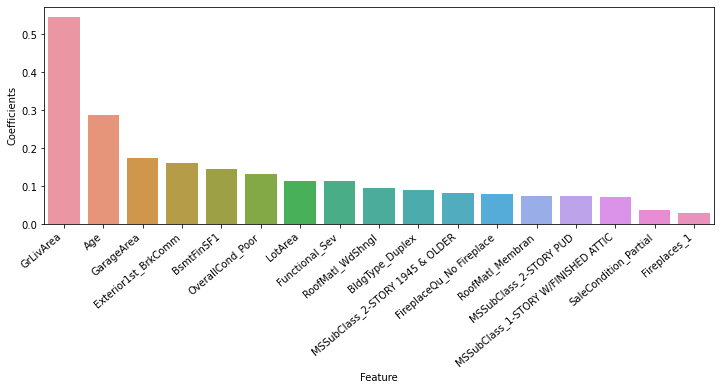

In [2049]:
#Finding out top predictors in terms of the highest magnitude of coefficients

coefficient = [abs(x) for x in model_parameters]
top = pd.DataFrame(data={'Feature' :cols,'Coefficients': coefficient})
top =  top.iloc[1:,:]
top = top.sort_values(['Coefficients'],ascending=False).reset_index(drop=True)
plt.figure(figsize=[12,4])
sns1 = sns.barplot(x=top.Feature,y=top.Coefficients)
sns1.set_xticklabels(sns1.get_xticklabels(), rotation=40, ha="right")
plt.show()

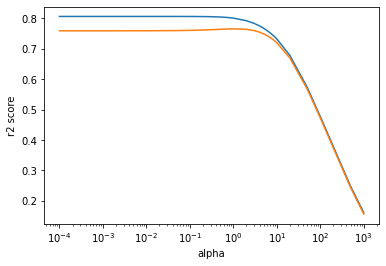

In [2050]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()


In [2051]:
# model with optimal alpha
# ridge regression
# We will now use our model to make predictions.

lm = Ridge(alpha=model_cv.best_params_['alpha'])
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print("This is the r2 score of train data using Ridge: {}".format(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
y_test_pred = lm.predict(X_test_new)
print("This is the r2 score of test data using Ridge: {}".format(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("The optimal value of alpha for Ridge is : {}".format(model_cv.best_params_['alpha']))

This is the r2 score of train data using Ridge: 0.7984700508531769
This is the r2 score of test data using Ridge: 0.7512881952338157
The optimal value of alpha for Ridge is : 1.0


**Lasso**

In [2052]:
#Lasso Model

lasso =Lasso()

model_cv = GridSearchCV(estimator =lasso,
                       param_grid= params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score= True,
                       verbose=1)
         
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [2053]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.006582      0.000798         0.004595        0.001193      0.0001  {'alpha': 0.0001}           0.804847           0.524999           0.853405           0.839746           0.766036         0.757807        0.120277                1            0.794514            0.854893            0.785234            0.789973            0.799887          0.804900         0.025463
1       0.005380      0.001851         0.002997        0.001093       0.001   {'alpha': 0.001}           0.765397           0.613007           0.821034           0.805548           0.735527         0.748103        0.073928                2            0.767652            0.823237            0.751447            0.758128            0.775363          0.775165         0.025378
2       0.006384      0.002327         0.003590        0.001353        0.01    {'alpha': 0.01}           0.406349           0.441795           0.439018           0.456863           0.417370         0.432279        0.018083                3            0.452817            0.422735            0.429705            0.429053            0.443097          0.435481         0.010915
3       0.005380      0.001969         0.002394        0.000489        0.05    {'alpha': 0.05}          -0.008850          -0.000454          -0.000383          -0.018083          -0.000041        -0.005562        0.007085                4            0.000000            0.000000            0.000000            0.000000            0.000000          0.000000         0.000000
4       0.005181      0.001592         0.002806        0.000759         0.1     {'alpha': 0.1}          -0.008850          -0.000454          -0.000383          -0.018083          -0.000041        -0.005562        0.007085                4            0.000000            0.000000            0.000000            0.000000            0.000000          0.000000         0.000000

In [2054]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
0.7578065178768163


In [2055]:
#Fitting the model using lasso using the best params alpha value
lasso = Lasso(alpha = model_cv.best_params_['alpha'])
lasso.fit(X_train_new,y_train)

Lasso(alpha=0.0001)

In [2056]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
#cols = X_train_rfe.columns
cols = X_train_new.columns.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.425),
 ('LotArea', 0.108),
 ('BsmtFinSF1', 0.148),
 ('GrLivArea', 0.625),
 ('GarageArea', 0.155),
 ('Age', -0.292),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', 0.057),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.079),
 ('MSSubClass_2-STORY PUD', -0.077),
 ('BldgType_Duplex', -0.094),
 ('OverallCond_Poor', -0.147),
 ('RoofMatl_Membran', 0.062),
 ('RoofMatl_WdShngl', 0.088),
 ('Exterior1st_BrkComm', -0.191),
 ('Functional_Sev', -0.14),
 ('Fireplaces_1', -0.024),
 ('FireplaceQu_No Fireplace', -0.069),
 ('SaleCondition_Partial', 0.033)]

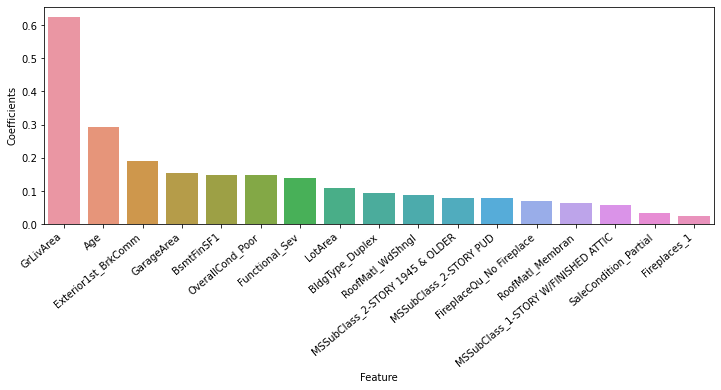

In [2057]:
#Finding out top predictors in terms of the highest magnitude of coefficients

coefficient = [abs(x) for x in model_parameters]
top = pd.DataFrame(data={'Feature' :cols,'Coefficients': coefficient})
top =  top.iloc[1:,:]
top = top.sort_values(['Coefficients'],ascending=False).reset_index(drop=True)
plt.figure(figsize=[12,4])
sns1 = sns.barplot(x=top.Feature,y=top.Coefficients)
sns1.set_xticklabels(sns1.get_xticklabels(), rotation=40, ha="right")
plt.show()

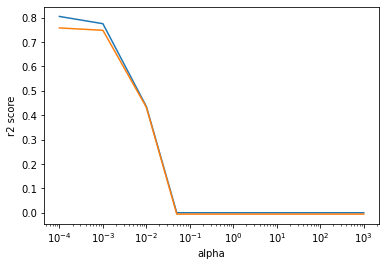

In [2058]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [2059]:
# model with optimal alpha
# lasso regression
# We will now use our model to make predictions.

lm = Lasso(alpha=model_cv.best_params_['alpha'])
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print("This is the r2 score of train data using Lasso: {}".format(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
y_test_pred = lm.predict(X_test_new)
print("This is the r2 score of test data using Lasso: {}".format(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("The optimal value of alpha for Lasso is : {}".format(model_cv.best_params_['alpha']))

This is the r2 score of train data using Lasso: 0.8008752074233798
This is the r2 score of test data using Lasso: 0.7576540936212832
The optimal value of alpha for Lasso is : 0.0001



**Conclusion -**

**We can now see that using Lasso and Ridge we have regularised the model such that it is optimally complex and has good prediction power too.**

**We observed that the optimal value of alpha/lambda for Lasso was 0.0001 and for Ridge was 1.0.**

**But we will got with the Lasso model as it has better R2 score of 80% on train and 76% on test and coefficient values with a total of 17 features.**

*The final equation of the model to show how well selected feature describes the model has been mentioned below in Step 7*


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [2060]:
#Predicted y_train
y_train_pred = lm.predict(X_train_new)

In [2061]:
#residuals
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

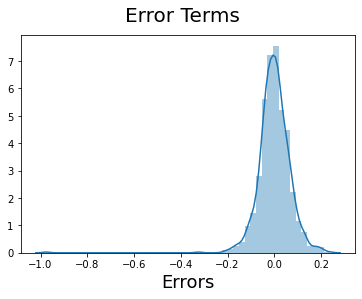

In [2062]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_pred))
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

## Step 7: Making Predictions Using the Final Model

We have fitted the model and checked the normality of error terms, we can now make predictions using the model.

#########################################################################

We can see that the equation of our best fitted line is:

$ SalePrice =0.425 +0.108 LotArea +0.148 BsmtFinSF1 +0.625 GrLivArea +0.155 GarageArea -0.292 Age +0.057 MSSubClass_1-STORY W/FINISHED ATTIC +0.079 MSSubClass_2-STORY 1945 & OLDER -0.077 MSSubClass_2-STORY PUD -0.094 BldgType_Duplex -0.147 OverallCond_Poor +0.062 RoofMatl_Membran +0.088 RoofMatl_WdShngl -0.191 Exterior1st_BrkComm -0.14 Functional_Sev -0.024 Fireplaces_1 -0.069 FireplaceQu_No Fireplace +0.033 SaleCondition_Partial$



## Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

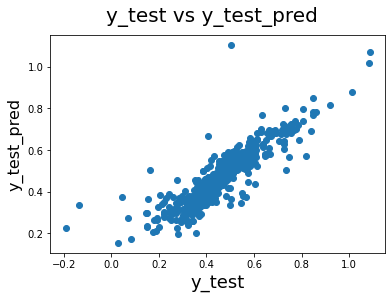

In [2063]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)     

# Subjective Questions

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? 
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
What will be the most important predictor variables after the change is implemented?

**Answer 1**

The optimal value for ridge and lasso regression are {'alpha': 1.0} and {'alpha': 0.0001} respectively.

If we choose double the value of alpha for ridge an lasso then:


*Ridge*

In [2064]:
#Fitting the model using ridge using the best params alpha value
ridge = Ridge(alpha = 2)
ridge.fit(X_train_new,y_train)

Ridge(alpha=2)

In [2065]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_new.columns.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.45),
 ('LotArea', 0.1),
 ('BsmtFinSF1', 0.135),
 ('GrLivArea', 0.484),
 ('GarageArea', 0.186),
 ('Age', -0.28),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', 0.055),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.081),
 ('MSSubClass_2-STORY PUD', -0.072),
 ('BldgType_Duplex', -0.084),
 ('OverallCond_Poor', -0.099),
 ('RoofMatl_Membran', 0.048),
 ('RoofMatl_WdShngl', 0.083),
 ('Exterior1st_BrkComm', -0.122),
 ('Functional_Sev', -0.073),
 ('Fireplaces_1', -0.03),
 ('FireplaceQu_No Fireplace', -0.088),
 ('SaleCondition_Partial', 0.039)]

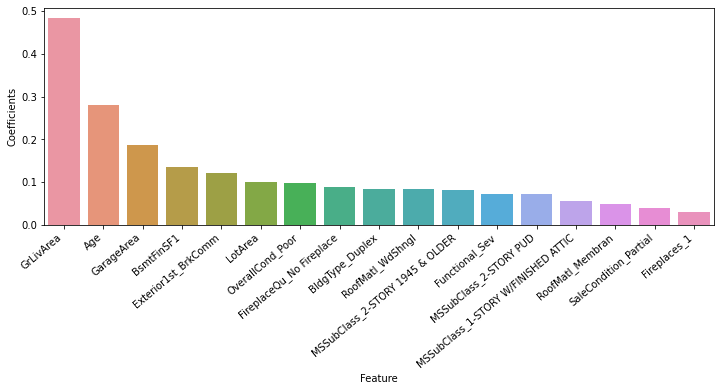

In [2066]:
#Finding out top predictors in terms of the highest magnitude of coefficients

coefficient = [abs(x) for x in model_parameters]
top = pd.DataFrame(data={'Feature' :cols,'Coefficients': coefficient})
top =  top.iloc[1:,:]
top = top.sort_values(['Coefficients'],ascending=False).reset_index(drop=True)
plt.figure(figsize=[12,4])
sns1 = sns.barplot(x=top.Feature,y=top.Coefficients)
sns1.set_xticklabels(sns1.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [2067]:
# model with optimal alpha
# ridge regression
# We will now use our model to make predictions.

lm = Ridge(alpha=2)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
y_test_pred = lm.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.7920362620604822
0.744289717276249


*Lasso*

In [2068]:
#Fitting the model using lasso using the best params alpha value
lasso = Lasso(alpha = 0.0002)
lasso.fit(X_train_new,y_train)

Lasso(alpha=0.0002)

In [2069]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
#cols = X_train_rfe.columns
cols = X_train_new.columns.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.429),
 ('LotArea', 0.083),
 ('BsmtFinSF1', 0.141),
 ('GrLivArea', 0.617),
 ('GarageArea', 0.155),
 ('Age', -0.29),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', 0.01),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.074),
 ('MSSubClass_2-STORY PUD', -0.075),
 ('BldgType_Duplex', -0.09),
 ('OverallCond_Poor', -0.098),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_WdShngl', 0.066),
 ('Exterior1st_BrkComm', -0.144),
 ('Functional_Sev', -0.043),
 ('Fireplaces_1', -0.025),
 ('FireplaceQu_No Fireplace', -0.072),
 ('SaleCondition_Partial', 0.033)]

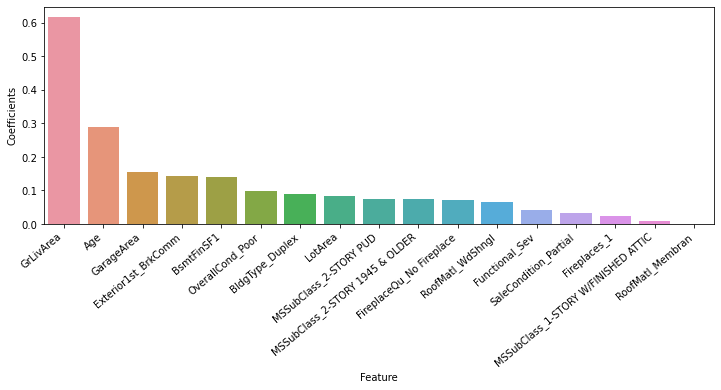

In [2070]:
#Finding out top predictors in terms of the highest magnitude of coefficients

coefficient = [abs(x) for x in model_parameters]
top = pd.DataFrame(data={'Feature' :cols,'Coefficients': coefficient})
top =  top.iloc[1:,:]
top = top.sort_values(['Coefficients'],ascending=False).reset_index(drop=True)
plt.figure(figsize=[12,4])
sns1 = sns.barplot(x=top.Feature,y=top.Coefficients)
sns1.set_xticklabels(sns1.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [2071]:
# model with optimal alpha
# lasso regression
# We will now use our model to make predictions.

lm = Lasso(alpha=0.0002)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
y_test_pred = lm.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.7963138772877558
0.7600052206051454


Conclusion-

We observed that there is a slight reduction in the train and test score when we double the value of alpha and hence slight change in coefficients as well.

The most important predictors after we double the alpha value are:

For Ridge-

'GrLivArea','Age','GarageArea','BsmtFinSF1','LotArea'

For Lasso-

GrLivArea,Age,GarageArea,BsmtFinSF1,Exterior1st_BrkComm

**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. 
Now, which one will you choose to apply and why?

**Answer 2**

Although both the models are almost comparable but there is a slight difference between the r2 score of Ridge and lasso where lasso has slightly higher r2 scor.
And Lasso also shrinks the coefficients more as compared to Ridge and hence it's better as the variance will be less if the coefficients are smaller.
Therefore, I would prefer to choose the model with Lasso regularisation.

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Answer 3**

**Dropping the top 5 predictor variables from lasso model where alpha was 0.0001 and rebuilding the model again with all the steps of RFE, elimination using p/vif and then Lasso**

GrLivArea,
Age,
Exterior1st_BrkComm,
GarageArea,
BsmtFinSF1

In [2072]:
#Dropping the above 5 predictors
X_train_2 = X_train.drop(['GrLivArea','Age','Exterior1st_BrkComm','GarageArea','BsmtFinSF1'],1)
X_train_2

LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  YrSold  MSSubClass_1-1/2 STORY FINISHED  MSSubClass_1-STORY 1945 & OLDER  MSSubClass_1-STORY 1946 & NEWER  MSSubClass_1-STORY PUD  MSSubClass_1-STORY W/FINISHED ATTIC  MSSubClass_2 FAMILY CONVERSION  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX - ALL STYLES  MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  ...  \
1199  0.077454      0.433333       359.0    0.000000   0.493151     0.274959  0.294844   0.00000       1967.0    0.000000     0.000000       0.000000    0.75                                0                                0                                0                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                1            0            0            1            0            1             0             0             0                0                0                1                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     0  ...   
721   0.027820      0.533333         0.0    0.000000   0.074058     0.140426  0.089095   0.00000       1983.0    0.163043     0.000000       0.000000    0.75                                0                                0                                0                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       1                                0            0            0            1            0            1             0             0             0                0                0                1                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     0  ...   
622   0.031901      0.800000       258.0    0.000000   0.115582     0.230442  0.284153   0.00000       1994.0    0.304348     0.076782       0.000000    0.50                                0                                0                                1                       0                                    0                               0                                0                                0                                0                       0                               0                            0                       0                                0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0  ...   
1216  0.034588      0.216667       148.0    0.000000   0.147260    

In [2073]:
#Doing RFE with the new X_train_2 now
lm1 = LinearRegression()
lm1.fit(X_train_2,y_train)
rfe1 = RFE(lm1,50)
rfe1 = rfe.fit(X_train_2,y_train)

In [2074]:
col1= X_train_2.columns[rfe.support_]
X_train_rfe1= X_train_2[col1]

In [2075]:
#Adding the constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)
#fitting the 1st linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     95.60
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.80e-311
Time:                        18:49:43   Log-Likelihood:                 1257.6
No. Observations:                 959   AIC:                            -2423.
Df Residuals:                     913   BIC:                            -2199.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8654      0.081    -10.698      0.000      -1.024      -0.707
LotArea                             0.3382      0.057      5.915      0.000       0.226       0.450
TotalBsmtSF                         0.9429      0.077     12.192      0.000       0.791       1.095
1stFlrSF                            0.5233      0.056      9.283      0.000       0.413       0.634
2ndFlrSF                            0.2683      0.022     12.338      0.000       0.226       0.311
MSSubClass_1-1/2 STORY FINISHED    -0.0366      0.011     -3.442      0.001      -0.057      -0.016
MSSubClass_1-STORY 1945 & OLDER    -0.0533      0.016     -3.241      0.001      -0.086      -0.021
MSSubClass_1-STORY 1946 & NEWER     0.0083      0.013      0.663      0.507      -0.016       0.033
MSSubClass_1-STORY PUD              0.0682      0.015      4.641      0.000       0.039       0.097
MSSubClass_2 FAMILY CONVERSION     -0.0750      0.021     -3.578      0.000      -0.116      -0.034
MSSubClass_2-1/2 STORY ALL AGES    -0.0433      0.024     -1.768      0.077      -0.091       0.005
MSSubClass_2-STORY 1946 & NEWER     0.0529      0.010      5.127      0.000       0.033       0.073
MSSubClass_DUPLEX - ALL STYLES     -0.0366      0.009     -4.099      0.000      -0.054      -0.019
MSSubClass_PUD - MULTILEVEL         0.0555      0.035      1.576      0.115      -0.014       0.125
MSSubClass_SPLIT FOYER              0.0337      0.020      1.723      0.085      -0.005       0.072
MSSubClass_SPLIT OR MULTI-LEVEL     0.0216      0.016      1.383      0.167      -0.009       0.052
MSZoning_FV                         0.2702      0.040      6.677      0.000       0.191       0.350
MSZoning_RH                         0.1779      0.044      4.035      0.000       0.091       0.264
MSZoning_RL                         0.2035      0.039      5.197      0.000       0.127       0.280
MSZoning_RM                         0.1663      0.039      4.214      0.000       0.089       0.244
LandSlope_Sev                      -0.1555      0.031     -5.019      0.000      -0.216      -0.095
Condition2_Feedr                    0.0343      0.070      0.493      0.622      -0.102       0.171
Condition2_Norm                     0.0138      0.050      0.275      0.783      -0.084       0.112
Condition2_RRAe                    -0.3914      0.120     -3.260      0.001      -0.627      -0.156
Condition2_RRNn                     0.0679      0.084      0.808      0.419      -0.097       0.233
BldgType_Duplex                    -0.0366      0.009     -4.099      0.000      -0.054      -0.019
OverallQual_Very Excellent          0.1070      0.026      4.128      0.000       0.056       0.158
OverallCond_Fair                   -0.1657      0.018     -9.230      0.000      -0

In [2076]:
#dropping constant
X_train_rfe1 = X_train_rfe1.drop(['const'],axis=1)

In [2077]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Condition2_Norm'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     97.87
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.05e-312
Time:                        18:49:43   Log-Likelihood:                 1257.5
No. Observations:                 959   AIC:                            -2425.
Df Residuals:                     914   BIC:                            -2206.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8525      0.066    -12.937      0.000      -0.982      -0.723
LotArea                             0.3388      0.057      5.931      0.000       0.227       0.451
TotalBsmtSF                         0.9425      0.077     12.196      0.000       0.791       1.094
1stFlrSF                            0.5238      0.056      9.300      0.000       0.413       0.634
2ndFlrSF                            0.2686      0.022     12.363      0.000       0.226       0.311
MSSubClass_1-1/2 STORY FINISHED    -0.0366      0.011     -3.442      0.001      -0.057      -0.016
MSSubClass_1-STORY 1945 & OLDER    -0.0533      0.016     -3.239      0.001      -0.086      -0.021
MSSubClass_1-STORY 1946 & NEWER     0.0084      0.013      0.668      0.504      -0.016       0.033
MSSubClass_1-STORY PUD              0.0683      0.015      4.651      0.000       0.039       0.097
MSSubClass_2 FAMILY CONVERSION     -0.0760      0.021     -3.680      0.000      -0.117      -0.035
MSSubClass_2-1/2 STORY ALL AGES    -0.0432      0.024     -1.765      0.078      -0.091       0.005
MSSubClass_2-STORY 1946 & NEWER     0.0529      0.010      5.130      0.000       0.033       0.073
MSSubClass_DUPLEX - ALL STYLES     -0.0366      0.009     -4.101      0.000      -0.054      -0.019
MSSubClass_PUD - MULTILEVEL         0.0555      0.035      1.577      0.115      -0.014       0.125
MSSubClass_SPLIT FOYER              0.0338      0.020      1.728      0.084      -0.005       0.072
MSSubClass_SPLIT OR MULTI-LEVEL     0.0217      0.016      1.387      0.166      -0.009       0.052
MSZoning_FV                         0.2702      0.040      6.680      0.000       0.191       0.350
MSZoning_RH                         0.1779      0.044      4.037      0.000       0.091       0.264
MSZoning_RL                         0.2035      0.039      5.200      0.000       0.127       0.280
MSZoning_RM                         0.1664      0.039      4.218      0.000       0.089       0.244
LandSlope_Sev                      -0.1555      0.031     -5.022      0.000      -0.216      -0.095
Condition2_Feedr                    0.0205      0.048      0.426      0.670      -0.074       0.115
Condition2_RRAe                    -0.4053      0.109     -3.726      0.000      -0.619      -0.192
Condition2_RRNn                     0.0541      0.067      0.803      0.422      -0.078       0.186
BldgType_Duplex                    -0.0366      0.009     -4.101      0.000      -0.054      -0.019
OverallQual_Very Excellent          0.1053      0.025      4.193      0.000       0.056       0.155
OverallCond_Fair                   -0.1657      0.018     -9.233      0.000      -0.201      -0.130
OverallCond_Poor                   -0.2356      0.048     -4.906      0.000      -0

In [2078]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Condition2_Feedr'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     100.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.57e-313
Time:                        18:49:43   Log-Likelihood:                 1257.4
No. Observations:                 959   AIC:                            -2427.
Df Residuals:                     915   BIC:                            -2213.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8523      0.066    -12.939      0.000      -0.982      -0.723
LotArea                             0.3392      0.057      5.943      0.000       0.227       0.451
TotalBsmtSF                         0.9412      0.077     12.194      0.000       0.790       1.093
1stFlrSF                            0.5248      0.056      9.332      0.000       0.414       0.635
2ndFlrSF                            0.2687      0.022     12.376      0.000       0.226       0.311
MSSubClass_1-1/2 STORY FINISHED    -0.0370      0.011     -3.506      0.000      -0.058      -0.016
MSSubClass_1-STORY 1945 & OLDER    -0.0538      0.016     -3.279      0.001      -0.086      -0.022
MSSubClass_1-STORY 1946 & NEWER     0.0081      0.013      0.644      0.520      -0.017       0.033
MSSubClass_1-STORY PUD              0.0679      0.015      4.637      0.000       0.039       0.097
MSSubClass_2 FAMILY CONVERSION     -0.0765      0.021     -3.710      0.000      -0.117      -0.036
MSSubClass_2-1/2 STORY ALL AGES    -0.0438      0.024     -1.793      0.073      -0.092       0.004
MSSubClass_2-STORY 1946 & NEWER     0.0526      0.010      5.115      0.000       0.032       0.073
MSSubClass_DUPLEX - ALL STYLES     -0.0368      0.009     -4.135      0.000      -0.054      -0.019
MSSubClass_PUD - MULTILEVEL         0.0548      0.035      1.560      0.119      -0.014       0.124
MSSubClass_SPLIT FOYER              0.0335      0.020      1.713      0.087      -0.005       0.072
MSSubClass_SPLIT OR MULTI-LEVEL     0.0213      0.016      1.365      0.173      -0.009       0.052
MSZoning_FV                         0.2700      0.040      6.679      0.000       0.191       0.349
MSZoning_RH                         0.1778      0.044      4.036      0.000       0.091       0.264
MSZoning_RL                         0.2035      0.039      5.201      0.000       0.127       0.280
MSZoning_RM                         0.1666      0.039      4.226      0.000       0.089       0.244
LandSlope_Sev                      -0.1556      0.031     -5.027      0.000      -0.216      -0.095
Condition2_RRAe                    -0.4051      0.109     -3.725      0.000      -0.618      -0.192
Condition2_RRNn                     0.0539      0.067      0.799      0.424      -0.078       0.186
BldgType_Duplex                    -0.0368      0.009     -4.135      0.000      -0.054      -0.019
OverallQual_Very Excellent          0.1053      0.025      4.197      0.000       0.056       0.155
OverallCond_Fair                   -0.1658      0.018     -9.242      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2360      0.048     -4.917      0.000      -0.330      -0.142
RoofStyle_Gable                    -0.8142      0.046    -17.857      0.000      -0

In [2079]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['MSSubClass_1-STORY 1946 & NEWER'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     102.7
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          7.91e-314
Time:                        18:49:43   Log-Likelihood:                 1257.2
No. Observations:                 959   AIC:                            -2428.
Df Residuals:                     916   BIC:                            -2219.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8516      0.066    -12.935      0.000      -0.981      -0.722
LotArea                             0.3404      0.057      5.968      0.000       0.228       0.452
TotalBsmtSF                         0.9433      0.077     12.235      0.000       0.792       1.095
1stFlrSF                            0.5303      0.056      9.540      0.000       0.421       0.639
2ndFlrSF                            0.2600      0.017     15.370      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0407      0.009     -4.588      0.000      -0.058      -0.023
MSSubClass_1-STORY 1945 & OLDER    -0.0598      0.014     -4.424      0.000      -0.086      -0.033
MSSubClass_1-STORY PUD              0.0609      0.010      6.244      0.000       0.042       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0821      0.019     -4.403      0.000      -0.119      -0.046
MSSubClass_2-1/2 STORY ALL AGES    -0.0447      0.024     -1.835      0.067      -0.092       0.003
MSSubClass_2-STORY 1946 & NEWER     0.0502      0.010      5.239      0.000       0.031       0.069
MSSubClass_DUPLEX - ALL STYLES     -0.0400      0.007     -5.435      0.000      -0.054      -0.026
MSSubClass_PUD - MULTILEVEL         0.0502      0.034      1.459      0.145      -0.017       0.118
MSSubClass_SPLIT FOYER              0.0269      0.017      1.614      0.107      -0.006       0.060
MSSubClass_SPLIT OR MULTI-LEVEL     0.0149      0.012      1.241      0.215      -0.009       0.038
MSZoning_FV                         0.2695      0.040      6.669      0.000       0.190       0.349
MSZoning_RH                         0.1783      0.044      4.049      0.000       0.092       0.265
MSZoning_RL                         0.2039      0.039      5.215      0.000       0.127       0.281
MSZoning_RM                         0.1657      0.039      4.207      0.000       0.088       0.243
LandSlope_Sev                      -0.1563      0.031     -5.057      0.000      -0.217      -0.096
Condition2_RRAe                    -0.3943      0.107     -3.671      0.000      -0.605      -0.184
Condition2_RRNn                     0.0566      0.067      0.842      0.400      -0.075       0.188
BldgType_Duplex                    -0.0400      0.007     -5.435      0.000      -0.054      -0.026
OverallQual_Very Excellent          0.1045      0.025      4.171      0.000       0.055       0.154
OverallCond_Fair                   -0.1665      0.018     -9.309      0.000      -0.202      -0.131
OverallCond_Poor                   -0.2372      0.048     -4.946      0.000      -0.331      -0.143
RoofStyle_Gable                    -0.8162      0.045    -17.949      0.000      -0.905      -0.727
RoofStyle_Gambrel                  -0.8189      0.057    -14.399      0.000      -0

In [2080]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Fireplaces_3'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          9.79e-315
Time:                        18:49:43   Log-Likelihood:                 1257.0
No. Observations:                 959   AIC:                            -2430.
Df Residuals:                     917   BIC:                            -2226.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8341      0.061    -13.687      0.000      -0.954      -0.715
LotArea                             0.3394      0.057      5.953      0.000       0.227       0.451
TotalBsmtSF                         0.9471      0.077     12.319      0.000       0.796       1.098
1stFlrSF                            0.5303      0.056      9.543      0.000       0.421       0.639
2ndFlrSF                            0.2606      0.017     15.433      0.000       0.227       0.294
MSSubClass_1-1/2 STORY FINISHED    -0.0409      0.009     -4.609      0.000      -0.058      -0.023
MSSubClass_1-STORY 1945 & OLDER    -0.0596      0.014     -4.415      0.000      -0.086      -0.033
MSSubClass_1-STORY PUD              0.0608      0.010      6.237      0.000       0.042       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0821      0.019     -4.405      0.000      -0.119      -0.046
MSSubClass_2-1/2 STORY ALL AGES    -0.0450      0.024     -1.847      0.065      -0.093       0.003
MSSubClass_2-STORY 1946 & NEWER     0.0500      0.010      5.219      0.000       0.031       0.069
MSSubClass_DUPLEX - ALL STYLES     -0.0402      0.007     -5.458      0.000      -0.055      -0.026
MSSubClass_PUD - MULTILEVEL         0.0504      0.034      1.466      0.143      -0.017       0.118
MSSubClass_SPLIT FOYER              0.0269      0.017      1.613      0.107      -0.006       0.060
MSSubClass_SPLIT OR MULTI-LEVEL     0.0159      0.012      1.333      0.183      -0.007       0.039
MSZoning_FV                         0.2691      0.040      6.663      0.000       0.190       0.348
MSZoning_RH                         0.1780      0.044      4.044      0.000       0.092       0.264
MSZoning_RL                         0.2036      0.039      5.209      0.000       0.127       0.280
MSZoning_RM                         0.1654      0.039      4.201      0.000       0.088       0.243
LandSlope_Sev                      -0.1568      0.031     -5.073      0.000      -0.217      -0.096
Condition2_RRAe                    -0.3950      0.107     -3.678      0.000      -0.606      -0.184
Condition2_RRNn                     0.0567      0.067      0.843      0.399      -0.075       0.189
BldgType_Duplex                    -0.0402      0.007     -5.458      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1039      0.025      4.150      0.000       0.055       0.153
OverallCond_Fair                   -0.1667      0.018     -9.324      0.000      -0.202      -0.132
OverallCond_Poor                   -0.2374      0.048     -4.952      0.000      -0.331      -0.143
RoofStyle_Gable                    -0.8021      0.041    -19.678      0.000      -0.882      -0.722
RoofStyle_Gambrel                  -0.8051      0.053    -15.083      0.000      -0

In [2081]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Condition2_RRNn'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     107.9
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.33e-315
Time:                        18:49:44   Log-Likelihood:                 1256.6
No. Observations:                 959   AIC:                            -2431.
Df Residuals:                     918   BIC:                            -2232.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8339      0.061    -13.686      0.000      -0.953      -0.714
LotArea                             0.3399      0.057      5.964      0.000       0.228       0.452
TotalBsmtSF                         0.9473      0.077     12.324      0.000       0.796       1.098
1stFlrSF                            0.5298      0.056      9.536      0.000       0.421       0.639
2ndFlrSF                            0.2599      0.017     15.413      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0410      0.009     -4.628      0.000      -0.058      -0.024
MSSubClass_1-STORY 1945 & OLDER    -0.0601      0.013     -4.456      0.000      -0.087      -0.034
MSSubClass_1-STORY PUD              0.0606      0.010      6.217      0.000       0.041       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0823      0.019     -4.415      0.000      -0.119      -0.046
MSSubClass_2-1/2 STORY ALL AGES    -0.0451      0.024     -1.854      0.064      -0.093       0.003
MSSubClass_2-STORY 1946 & NEWER     0.0502      0.010      5.243      0.000       0.031       0.069
MSSubClass_DUPLEX - ALL STYLES     -0.0403      0.007     -5.469      0.000      -0.055      -0.026
MSSubClass_PUD - MULTILEVEL         0.0496      0.034      1.445      0.149      -0.018       0.117
MSSubClass_SPLIT FOYER              0.0268      0.017      1.606      0.109      -0.006       0.060
MSSubClass_SPLIT OR MULTI-LEVEL     0.0159      0.012      1.331      0.184      -0.008       0.039
MSZoning_FV                         0.2691      0.040      6.663      0.000       0.190       0.348
MSZoning_RH                         0.1780      0.044      4.045      0.000       0.092       0.264
MSZoning_RL                         0.2035      0.039      5.208      0.000       0.127       0.280
MSZoning_RM                         0.1660      0.039      4.217      0.000       0.089       0.243
LandSlope_Sev                      -0.1569      0.031     -5.078      0.000      -0.218      -0.096
Condition2_RRAe                    -0.3944      0.107     -3.673      0.000      -0.605      -0.184
BldgType_Duplex                    -0.0403      0.007     -5.469      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1039      0.025      4.152      0.000       0.055       0.153
OverallCond_Fair                   -0.1668      0.018     -9.331      0.000      -0.202      -0.132
OverallCond_Poor                   -0.2378      0.048     -4.962      0.000      -0.332      -0.144
RoofStyle_Gable                    -0.8019      0.041    -19.677      0.000      -0.882      -0.722
RoofStyle_Gambrel                  -0.8051      0.053    -15.087      0.000      -0.910      -0.700
RoofStyle_Hip                      -0.7967      0.041    -19.333      0.000      -0

In [2082]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['MSSubClass_SPLIT OR MULTI-LEVEL'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.02e-316
Time:                        18:49:44   Log-Likelihood:                 1255.7
No. Observations:                 959   AIC:                            -2431.
Df Residuals:                     919   BIC:                            -2237.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8242      0.061    -13.619      0.000      -0.943      -0.705
LotArea                             0.3398      0.057      5.960      0.000       0.228       0.452
TotalBsmtSF                         0.9239      0.075     12.342      0.000       0.777       1.071
1stFlrSF                            0.5413      0.055      9.860      0.000       0.434       0.649
2ndFlrSF                            0.2604      0.017     15.439      0.000       0.227       0.294
MSSubClass_1-1/2 STORY FINISHED    -0.0426      0.009     -4.842      0.000      -0.060      -0.025
MSSubClass_1-STORY 1945 & OLDER    -0.0612      0.013     -4.544      0.000      -0.088      -0.035
MSSubClass_1-STORY PUD              0.0598      0.010      6.148      0.000       0.041       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0842      0.019     -4.526      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0471      0.024     -1.937      0.053      -0.095       0.001
MSSubClass_2-STORY 1946 & NEWER     0.0484      0.009      5.107      0.000       0.030       0.067
MSSubClass_DUPLEX - ALL STYLES     -0.0406      0.007     -5.514      0.000      -0.055      -0.026
MSSubClass_PUD - MULTILEVEL         0.0482      0.034      1.405      0.160      -0.019       0.116
MSSubClass_SPLIT FOYER              0.0255      0.017      1.528      0.127      -0.007       0.058
MSZoning_FV                         0.2692      0.040      6.663      0.000       0.190       0.348
MSZoning_RH                         0.1778      0.044      4.038      0.000       0.091       0.264
MSZoning_RL                         0.2044      0.039      5.230      0.000       0.128       0.281
MSZoning_RM                         0.1658      0.039      4.211      0.000       0.089       0.243
LandSlope_Sev                      -0.1576      0.031     -5.098      0.000      -0.218      -0.097
Condition2_RRAe                    -0.3943      0.107     -3.671      0.000      -0.605      -0.184
BldgType_Duplex                    -0.0406      0.007     -5.514      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1039      0.025      4.151      0.000       0.055       0.153
OverallCond_Fair                   -0.1673      0.018     -9.356      0.000      -0.202      -0.132
OverallCond_Poor                   -0.2376      0.048     -4.955      0.000      -0.332      -0.143
RoofStyle_Gable                    -0.7989      0.041    -19.625      0.000      -0.879      -0.719
RoofStyle_Gambrel                  -0.8026      0.053    -15.042      0.000      -0.907      -0.698
RoofStyle_Hip                      -0.7940      0.041    -19.282      0.000      -0.875      -0.713
RoofStyle_Mansard                  -0.8029      0.049    -16.279      0.000      -0

In [2083]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Exterior1st_CBlock'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.02e-316
Time:                        18:49:44   Log-Likelihood:                 1255.7
No. Observations:                 959   AIC:                            -2431.
Df Residuals:                     919   BIC:                            -2237.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8242      0.061    -13.619      0.000      -0.943      -0.705
LotArea                             0.3398      0.057      5.960      0.000       0.228       0.452
TotalBsmtSF                         0.9239      0.075     12.342      0.000       0.777       1.071
1stFlrSF                            0.5413      0.055      9.860      0.000       0.434       0.649
2ndFlrSF                            0.2604      0.017     15.439      0.000       0.227       0.294
MSSubClass_1-1/2 STORY FINISHED    -0.0426      0.009     -4.842      0.000      -0.060      -0.025
MSSubClass_1-STORY 1945 & OLDER    -0.0612      0.013     -4.544      0.000      -0.088      -0.035
MSSubClass_1-STORY PUD              0.0598      0.010      6.148      0.000       0.041       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0842      0.019     -4.526      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0471      0.024     -1.937      0.053      -0.095       0.001
MSSubClass_2-STORY 1946 & NEWER     0.0484      0.009      5.107      0.000       0.030       0.067
MSSubClass_DUPLEX - ALL STYLES     -0.0406      0.007     -5.514      0.000      -0.055      -0.026
MSSubClass_PUD - MULTILEVEL         0.0482      0.034      1.405      0.160      -0.019       0.116
MSSubClass_SPLIT FOYER              0.0255      0.017      1.528      0.127      -0.007       0.058
MSZoning_FV                         0.2692      0.040      6.663      0.000       0.190       0.348
MSZoning_RH                         0.1778      0.044      4.038      0.000       0.091       0.264
MSZoning_RL                         0.2044      0.039      5.230      0.000       0.128       0.281
MSZoning_RM                         0.1658      0.039      4.211      0.000       0.089       0.243
LandSlope_Sev                      -0.1576      0.031     -5.098      0.000      -0.218      -0.097
Condition2_RRAe                    -0.3943      0.107     -3.671      0.000      -0.605      -0.184
BldgType_Duplex                    -0.0406      0.007     -5.514      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1039      0.025      4.151      0.000       0.055       0.153
OverallCond_Fair                   -0.1673      0.018     -9.356      0.000      -0.202      -0.132
OverallCond_Poor                   -0.2376      0.048     -4.955      0.000      -0.332      -0.143
RoofStyle_Gable                    -0.7989      0.041    -19.625      0.000      -0.879      -0.719
RoofStyle_Gambrel                  -0.8026      0.053    -15.042      0.000      -0.907      -0.698
RoofStyle_Hip                      -0.7940      0.041    -19.282      0.000      -0.875      -0.713
RoofStyle_Mansard                  -0.8029      0.049    -16.279      0.000      -0

In [2084]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Exterior2nd_CBlock'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          7.11e-317
Time:                        18:49:44   Log-Likelihood:                 1254.7
No. Observations:                 959   AIC:                            -2431.
Df Residuals:                     920   BIC:                            -2242.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8231      0.061    -13.595      0.000      -0.942      -0.704
LotArea                             0.3411      0.057      5.981      0.000       0.229       0.453
TotalBsmtSF                         0.9223      0.075     12.316      0.000       0.775       1.069
1stFlrSF                            0.5425      0.055      9.879      0.000       0.435       0.650
2ndFlrSF                            0.2601      0.017     15.414      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0437      0.009     -4.989      0.000      -0.061      -0.026
MSSubClass_1-STORY 1945 & OLDER    -0.0614      0.013     -4.553      0.000      -0.088      -0.035
MSSubClass_1-STORY PUD              0.0597      0.010      6.133      0.000       0.041       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0843      0.019     -4.531      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0473      0.024     -1.944      0.052      -0.095       0.000
MSSubClass_2-STORY 1946 & NEWER     0.0485      0.009      5.116      0.000       0.030       0.067
MSSubClass_DUPLEX - ALL STYLES     -0.0406      0.007     -5.509      0.000      -0.055      -0.026
MSSubClass_PUD - MULTILEVEL         0.0479      0.034      1.395      0.163      -0.019       0.115
MSSubClass_SPLIT FOYER              0.0256      0.017      1.535      0.125      -0.007       0.058
MSZoning_FV                         0.2684      0.040      6.642      0.000       0.189       0.348
MSZoning_RH                         0.1771      0.044      4.021      0.000       0.091       0.264
MSZoning_RL                         0.2035      0.039      5.203      0.000       0.127       0.280
MSZoning_RM                         0.1654      0.039      4.197      0.000       0.088       0.243
LandSlope_Sev                      -0.1579      0.031     -5.107      0.000      -0.219      -0.097
Condition2_RRAe                    -0.3947      0.107     -3.673      0.000      -0.606      -0.184
BldgType_Duplex                    -0.0406      0.007     -5.509      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1038      0.025      4.145      0.000       0.055       0.153
OverallCond_Fair                   -0.1671      0.018     -9.340      0.000      -0.202      -0.132
OverallCond_Poor                   -0.2377      0.048     -4.956      0.000      -0.332      -0.144
RoofStyle_Gable                    -0.7988      0.041    -19.613      0.000      -0.879      -0.719
RoofStyle_Gambrel                  -0.8023      0.053    -15.030      0.000      -0.907      -0.698
RoofStyle_Hip                      -0.7939      0.041    -19.272      0.000      -0.875      -0.713
RoofStyle_Mansard                  -0.8029      0.049    -16.271      0.000      -0

In [2085]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['MSSubClass_PUD - MULTILEVEL'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.72e-317
Time:                        18:49:44   Log-Likelihood:                 1253.7
No. Observations:                 959   AIC:                            -2431.
Df Residuals:                     921   BIC:                            -2246.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8204      0.061    -13.551      0.000      -0.939      -0.702
LotArea                             0.3395      0.057      5.951      0.000       0.228       0.451
TotalBsmtSF                         0.9131      0.075     12.234      0.000       0.767       1.060
1stFlrSF                            0.5472      0.055      9.977      0.000       0.440       0.655
2ndFlrSF                            0.2585      0.017     15.346      0.000       0.225       0.292
MSSubClass_1-1/2 STORY FINISHED    -0.0443      0.009     -5.066      0.000      -0.061      -0.027
MSSubClass_1-STORY 1945 & OLDER    -0.0630      0.013     -4.690      0.000      -0.089      -0.037
MSSubClass_1-STORY PUD              0.0591      0.010      6.072      0.000       0.040       0.078
MSSubClass_2 FAMILY CONVERSION     -0.0851      0.019     -4.570      0.000      -0.122      -0.049
MSSubClass_2-1/2 STORY ALL AGES    -0.0481      0.024     -1.977      0.048      -0.096      -0.000
MSSubClass_2-STORY 1946 & NEWER     0.0491      0.009      5.173      0.000       0.030       0.068
MSSubClass_DUPLEX - ALL STYLES     -0.0408      0.007     -5.546      0.000      -0.055      -0.026
MSSubClass_SPLIT FOYER              0.0253      0.017      1.514      0.130      -0.007       0.058
MSZoning_FV                         0.2685      0.040      6.639      0.000       0.189       0.348
MSZoning_RH                         0.1772      0.044      4.020      0.000       0.091       0.264
MSZoning_RL                         0.2035      0.039      5.202      0.000       0.127       0.280
MSZoning_RM                         0.1672      0.039      4.244      0.000       0.090       0.245
LandSlope_Sev                      -0.1571      0.031     -5.078      0.000      -0.218      -0.096
Condition2_RRAe                    -0.3926      0.108     -3.652      0.000      -0.604      -0.182
BldgType_Duplex                    -0.0408      0.007     -5.546      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1042      0.025      4.159      0.000       0.055       0.153
OverallCond_Fair                   -0.1673      0.018     -9.345      0.000      -0.202      -0.132
OverallCond_Poor                   -0.2389      0.048     -4.979      0.000      -0.333      -0.145
RoofStyle_Gable                    -0.7965      0.041    -19.563      0.000      -0.876      -0.717
RoofStyle_Gambrel                  -0.8007      0.053    -14.996      0.000      -0.905      -0.696
RoofStyle_Hip                      -0.7918      0.041    -19.224      0.000      -0.873      -0.711
RoofStyle_Mansard                  -0.8011      0.049    -16.233      0.000      -0.898      -0.704
RoofStyle_Shed                     -0.5038      0.079     -6.362      0.000      -0

In [2086]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['Fireplaces_1'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     119.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          4.49e-318
Time:                        18:49:44   Log-Likelihood:                 1252.6
No. Observations:                 959   AIC:                            -2431.
Df Residuals:                     922   BIC:                            -2251.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8289      0.060    -13.747      0.000      -0.947      -0.711
LotArea                             0.3470      0.057      6.103      0.000       0.235       0.459
TotalBsmtSF                         0.9143      0.075     12.243      0.000       0.768       1.061
1stFlrSF                            0.5518      0.055     10.072      0.000       0.444       0.659
2ndFlrSF                            0.2600      0.017     15.461      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0438      0.009     -5.010      0.000      -0.061      -0.027
MSSubClass_1-STORY 1945 & OLDER    -0.0627      0.013     -4.668      0.000      -0.089      -0.036
MSSubClass_1-STORY PUD              0.0584      0.010      6.009      0.000       0.039       0.078
MSSubClass_2 FAMILY CONVERSION     -0.0841      0.019     -4.518      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0480      0.024     -1.973      0.049      -0.096      -0.000
MSSubClass_2-STORY 1946 & NEWER     0.0484      0.009      5.103      0.000       0.030       0.067
MSSubClass_DUPLEX - ALL STYLES     -0.0408      0.007     -5.537      0.000      -0.055      -0.026
MSSubClass_SPLIT FOYER              0.0266      0.017      1.596      0.111      -0.006       0.059
MSZoning_FV                         0.2680      0.040      6.624      0.000       0.189       0.347
MSZoning_RH                         0.1780      0.044      4.037      0.000       0.091       0.265
MSZoning_RL                         0.2034      0.039      5.196      0.000       0.127       0.280
MSZoning_RM                         0.1673      0.039      4.244      0.000       0.090       0.245
LandSlope_Sev                      -0.1517      0.031     -4.937      0.000      -0.212      -0.091
Condition2_RRAe                    -0.3904      0.108     -3.629      0.000      -0.601      -0.179
BldgType_Duplex                    -0.0408      0.007     -5.537      0.000      -0.055      -0.026
OverallQual_Very Excellent          0.1058      0.025      4.224      0.000       0.057       0.155
OverallCond_Fair                   -0.1652      0.018     -9.252      0.000      -0.200      -0.130
OverallCond_Poor                   -0.2393      0.048     -4.985      0.000      -0.334      -0.145
RoofStyle_Gable                    -0.7972      0.041    -19.569      0.000      -0.877      -0.717
RoofStyle_Gambrel                  -0.7988      0.053    -14.955      0.000      -0.904      -0.694
RoofStyle_Hip                      -0.7928      0.041    -19.240      0.000      -0.874      -0.712
RoofStyle_Mansard                  -0.8024      0.049    -16.252      0.000      -0.899      -0.706
RoofStyle_Shed                     -0.5100      0.079     -6.445      0.000      -0

In [2087]:
#Dropping variables with high p or vif now 
X_train_rfe1 = X_train_rfe1.drop(['MSSubClass_SPLIT FOYER'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.42e-318
Time:                        18:49:44   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2430.
Df Residuals:                     923   BIC:                            -2255.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8262      0.060    -13.697      0.000      -0.945      -0.708
LotArea                             0.3478      0.057      6.113      0.000       0.236       0.459
TotalBsmtSF                         0.9148      0.075     12.240      0.000       0.768       1.061
1stFlrSF                            0.5462      0.055      9.982      0.000       0.439       0.654
2ndFlrSF                            0.2596      0.017     15.427      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0447      0.009     -5.120      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0636      0.013     -4.734      0.000      -0.090      -0.037
MSSubClass_1-STORY PUD              0.0578      0.010      5.946      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.561      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0485      0.024     -1.992      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.004      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0413      0.007     -5.601      0.000      -0.056      -0.027
MSZoning_FV                         0.2680      0.040      6.617      0.000       0.188       0.347
MSZoning_RH                         0.1780      0.044      4.034      0.000       0.091       0.265
MSZoning_RL                         0.2042      0.039      5.213      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.240      0.000       0.090       0.245
LandSlope_Sev                      -0.1521      0.031     -4.944      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3891      0.108     -3.615      0.000      -0.600      -0.178
BldgType_Duplex                    -0.0413      0.007     -5.601      0.000      -0.056      -0.027
OverallQual_Very Excellent          0.1063      0.025      4.240      0.000       0.057       0.155
OverallCond_Fair                   -0.1661      0.018     -9.299      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2393      0.048     -4.979      0.000      -0.334      -0.145
RoofStyle_Gable                    -0.7949      0.041    -19.509      0.000      -0.875      -0.715
RoofStyle_Gambrel                  -0.7969      0.053    -14.912      0.000      -0.902      -0.692
RoofStyle_Hip                      -0.7908      0.041    -19.183      0.000      -0.872      -0.710
RoofStyle_Mansard                  -0.8003      0.049    -16.201      0.000      -0.897      -0.703
RoofStyle_Shed                     -0.5087      0.079     -6.423      0.000      -0.664      -0.353
RoofMatl_CompShg                    1.5867      0.078     20.295      0.000       1

In [2088]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature      VIF
17                  BldgType_Duplex      inf
35             BsmtFinType1_No Bsmt      inf
34             BsmtExposure_No Bsmt      inf
33                 BsmtQual_No Bsmt      inf
10   MSSubClass_DUPLEX - ALL STYLES      inf
21                  RoofStyle_Gable  1351.18
23                    RoofStyle_Hip   378.08
13                      MSZoning_RL    52.87
14                      MSZoning_RM    40.09
26                 RoofMatl_CompShg    28.05
11                      MSZoning_FV    15.71
24                RoofStyle_Mansard    10.49
31                 RoofMatl_WdShake     8.54
22                RoofStyle_Gambrel     6.57
1                       TotalBsmtSF     6.55
25                   RoofStyle_Shed     6.55
32                 RoofMatl_WdShngl     6.12
2                          1stFlrSF     5.54
12                      MSZoning_RH     4.73
30                 RoofMatl_Tar&Grv     4.07
3                          2ndFlrSF     3.37
9   MSSubClass_2-STORY 1946 & NEWER     3.09
16                  Condition2_RRAe     2.59
15                    LandSlope_Sev     2.50
29                    RoofMatl_Roll     2.43
0                           LotArea     2.08
38         FireplaceQu_No Fireplace     1.57
28                   RoofMatl_Metal     1.52
27                 RoofMatl_Membran     1.50
4   MSSubClass_1-1/2 STORY FINISHED     1.39
8   MSSubClass_2-1/2 STORY ALL AGES     1.31
18       OverallQual_Very Excellent     1.25
5   MSSubClass_1-STORY 1945 & OLDER     1.17
37                   Functional_Sev     1.16
6            MSSubClass_1-STORY PUD     1.15
36                   KitchenAbvGr_3     1.13
7    MSSubClass_2 FAMILY CONVERSION     1.07
19                 OverallCond_Fair     1.05
20                 OverallCond_Poor     1.03

In [2089]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['BldgType_Duplex'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.42e-318
Time:                        18:49:45   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2430.
Df Residuals:                     923   BIC:                            -2255.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8262      0.060    -13.697      0.000      -0.945      -0.708
LotArea                             0.3478      0.057      6.113      0.000       0.236       0.459
TotalBsmtSF                         0.9148      0.075     12.240      0.000       0.768       1.061
1stFlrSF                            0.5462      0.055      9.982      0.000       0.439       0.654
2ndFlrSF                            0.2596      0.017     15.427      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0447      0.009     -5.120      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0636      0.013     -4.734      0.000      -0.090      -0.037
MSSubClass_1-STORY PUD              0.0578      0.010      5.946      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.561      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0485      0.024     -1.992      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.004      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0825      0.015     -5.601      0.000      -0.111      -0.054
MSZoning_FV                         0.2680      0.040      6.617      0.000       0.188       0.347
MSZoning_RH                         0.1780      0.044      4.034      0.000       0.091       0.265
MSZoning_RL                         0.2042      0.039      5.213      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.240      0.000       0.090       0.245
LandSlope_Sev                      -0.1521      0.031     -4.944      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3891      0.108     -3.615      0.000      -0.600      -0.178
OverallQual_Very Excellent          0.1063      0.025      4.240      0.000       0.057       0.155
OverallCond_Fair                   -0.1661      0.018     -9.299      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2393      0.048     -4.979      0.000      -0.334      -0.145
RoofStyle_Gable                    -0.7949      0.041    -19.509      0.000      -0.875      -0.715
RoofStyle_Gambrel                  -0.7969      0.053    -14.912      0.000      -0.902      -0.692
RoofStyle_Hip                      -0.7908      0.041    -19.183      0.000      -0.872      -0.710
RoofStyle_Mansard                  -0.8003      0.049    -16.201      0.000      -0.897      -0.703
RoofStyle_Shed                     -0.5087      0.079     -6.423      0.000      -0.664      -0.353
RoofMatl_CompShg                    1.5867      0.078     20.295      0.000       1.433       1.740
RoofMatl_Membran                    1.0019      0.077     12.968      0.000       0

In [2090]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature      VIF
34             BsmtFinType1_No Bsmt      inf
33             BsmtExposure_No Bsmt      inf
32                 BsmtQual_No Bsmt      inf
20                  RoofStyle_Gable  1351.18
22                    RoofStyle_Hip   378.08
13                      MSZoning_RL    52.87
14                      MSZoning_RM    40.09
25                 RoofMatl_CompShg    28.05
11                      MSZoning_FV    15.71
23                RoofStyle_Mansard    10.49
30                 RoofMatl_WdShake     8.54
21                RoofStyle_Gambrel     6.57
24                   RoofStyle_Shed     6.55
1                       TotalBsmtSF     6.55
31                 RoofMatl_WdShngl     6.12
2                          1stFlrSF     5.54
12                      MSZoning_RH     4.73
29                 RoofMatl_Tar&Grv     4.07
3                          2ndFlrSF     3.37
9   MSSubClass_2-STORY 1946 & NEWER     3.09
16                  Condition2_RRAe     2.59
15                    LandSlope_Sev     2.50
28                    RoofMatl_Roll     2.43
0                           LotArea     2.08
37         FireplaceQu_No Fireplace     1.57
27                   RoofMatl_Metal     1.52
26                 RoofMatl_Membran     1.50
10   MSSubClass_DUPLEX - ALL STYLES     1.41
4   MSSubClass_1-1/2 STORY FINISHED     1.39
8   MSSubClass_2-1/2 STORY ALL AGES     1.31
17       OverallQual_Very Excellent     1.25
5   MSSubClass_1-STORY 1945 & OLDER     1.17
36                   Functional_Sev     1.16
6            MSSubClass_1-STORY PUD     1.15
35                   KitchenAbvGr_3     1.13
7    MSSubClass_2 FAMILY CONVERSION     1.07
18                 OverallCond_Fair     1.05
19                 OverallCond_Poor     1.03

In [2091]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['BsmtFinType1_No Bsmt'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.42e-318
Time:                        18:49:45   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2430.
Df Residuals:                     923   BIC:                            -2255.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8262      0.060    -13.697      0.000      -0.945      -0.708
LotArea                             0.3478      0.057      6.113      0.000       0.236       0.459
TotalBsmtSF                         0.9148      0.075     12.240      0.000       0.768       1.061
1stFlrSF                            0.5462      0.055      9.982      0.000       0.439       0.654
2ndFlrSF                            0.2596      0.017     15.427      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0447      0.009     -5.120      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0636      0.013     -4.734      0.000      -0.090      -0.037
MSSubClass_1-STORY PUD              0.0578      0.010      5.946      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.561      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0485      0.024     -1.992      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.004      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0825      0.015     -5.601      0.000      -0.111      -0.054
MSZoning_FV                         0.2680      0.040      6.617      0.000       0.188       0.347
MSZoning_RH                         0.1780      0.044      4.034      0.000       0.091       0.265
MSZoning_RL                         0.2042      0.039      5.213      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.240      0.000       0.090       0.245
LandSlope_Sev                      -0.1521      0.031     -4.944      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3891      0.108     -3.615      0.000      -0.600      -0.178
OverallQual_Very Excellent          0.1063      0.025      4.240      0.000       0.057       0.155
OverallCond_Fair                   -0.1661      0.018     -9.299      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2393      0.048     -4.979      0.000      -0.334      -0.145
RoofStyle_Gable                    -0.7949      0.041    -19.509      0.000      -0.875      -0.715
RoofStyle_Gambrel                  -0.7969      0.053    -14.912      0.000      -0.902      -0.692
RoofStyle_Hip                      -0.7908      0.041    -19.183      0.000      -0.872      -0.710
RoofStyle_Mansard                  -0.8003      0.049    -16.201      0.000      -0.897      -0.703
RoofStyle_Shed                     -0.5087      0.079     -6.423      0.000      -0.664      -0.353
RoofMatl_CompShg                    1.5867      0.078     20.295      0.000       1.433       1.740
RoofMatl_Membran                    1.0019      0.077     12.968      0.000       0

In [2092]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature      VIF
33             BsmtExposure_No Bsmt      inf
32                 BsmtQual_No Bsmt      inf
20                  RoofStyle_Gable  1351.18
22                    RoofStyle_Hip   378.08
13                      MSZoning_RL    52.87
14                      MSZoning_RM    40.09
25                 RoofMatl_CompShg    28.05
11                      MSZoning_FV    15.71
23                RoofStyle_Mansard    10.49
30                 RoofMatl_WdShake     8.54
21                RoofStyle_Gambrel     6.57
1                       TotalBsmtSF     6.55
24                   RoofStyle_Shed     6.55
31                 RoofMatl_WdShngl     6.12
2                          1stFlrSF     5.54
12                      MSZoning_RH     4.73
29                 RoofMatl_Tar&Grv     4.07
3                          2ndFlrSF     3.37
9   MSSubClass_2-STORY 1946 & NEWER     3.09
16                  Condition2_RRAe     2.59
15                    LandSlope_Sev     2.50
28                    RoofMatl_Roll     2.43
0                           LotArea     2.08
36         FireplaceQu_No Fireplace     1.57
27                   RoofMatl_Metal     1.52
26                 RoofMatl_Membran     1.50
10   MSSubClass_DUPLEX - ALL STYLES     1.41
4   MSSubClass_1-1/2 STORY FINISHED     1.39
8   MSSubClass_2-1/2 STORY ALL AGES     1.31
17       OverallQual_Very Excellent     1.25
5   MSSubClass_1-STORY 1945 & OLDER     1.17
35                   Functional_Sev     1.16
6            MSSubClass_1-STORY PUD     1.15
34                   KitchenAbvGr_3     1.13
7    MSSubClass_2 FAMILY CONVERSION     1.07
18                 OverallCond_Fair     1.05
19                 OverallCond_Poor     1.03

In [2093]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['BsmtExposure_No Bsmt'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.42e-318
Time:                        18:49:45   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2430.
Df Residuals:                     923   BIC:                            -2255.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8262      0.060    -13.697      0.000      -0.945      -0.708
LotArea                             0.3478      0.057      6.113      0.000       0.236       0.459
TotalBsmtSF                         0.9148      0.075     12.240      0.000       0.768       1.061
1stFlrSF                            0.5462      0.055      9.982      0.000       0.439       0.654
2ndFlrSF                            0.2596      0.017     15.427      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0447      0.009     -5.120      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0636      0.013     -4.734      0.000      -0.090      -0.037
MSSubClass_1-STORY PUD              0.0578      0.010      5.946      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.561      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0485      0.024     -1.992      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.004      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0825      0.015     -5.601      0.000      -0.111      -0.054
MSZoning_FV                         0.2680      0.040      6.617      0.000       0.188       0.347
MSZoning_RH                         0.1780      0.044      4.034      0.000       0.091       0.265
MSZoning_RL                         0.2042      0.039      5.213      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.240      0.000       0.090       0.245
LandSlope_Sev                      -0.1521      0.031     -4.944      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3891      0.108     -3.615      0.000      -0.600      -0.178
OverallQual_Very Excellent          0.1063      0.025      4.240      0.000       0.057       0.155
OverallCond_Fair                   -0.1661      0.018     -9.299      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2393      0.048     -4.979      0.000      -0.334      -0.145
RoofStyle_Gable                    -0.7949      0.041    -19.509      0.000      -0.875      -0.715
RoofStyle_Gambrel                  -0.7969      0.053    -14.912      0.000      -0.902      -0.692
RoofStyle_Hip                      -0.7908      0.041    -19.183      0.000      -0.872      -0.710
RoofStyle_Mansard                  -0.8003      0.049    -16.201      0.000      -0.897      -0.703
RoofStyle_Shed                     -0.5087      0.079     -6.423      0.000      -0.664      -0.353
RoofMatl_CompShg                    1.5867      0.078     20.295      0.000       1.433       1.740
RoofMatl_Membran                    1.0019      0.077     12.968      0.000       0

In [2094]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature      VIF
20                  RoofStyle_Gable  1351.18
22                    RoofStyle_Hip   378.08
13                      MSZoning_RL    52.87
14                      MSZoning_RM    40.09
25                 RoofMatl_CompShg    28.05
11                      MSZoning_FV    15.71
23                RoofStyle_Mansard    10.49
30                 RoofMatl_WdShake     8.54
21                RoofStyle_Gambrel     6.57
24                   RoofStyle_Shed     6.55
1                       TotalBsmtSF     6.55
31                 RoofMatl_WdShngl     6.12
2                          1stFlrSF     5.54
12                      MSZoning_RH     4.73
29                 RoofMatl_Tar&Grv     4.07
3                          2ndFlrSF     3.37
9   MSSubClass_2-STORY 1946 & NEWER     3.09
16                  Condition2_RRAe     2.59
15                    LandSlope_Sev     2.50
28                    RoofMatl_Roll     2.43
32                 BsmtQual_No Bsmt     2.27
0                           LotArea     2.08
35         FireplaceQu_No Fireplace     1.57
27                   RoofMatl_Metal     1.52
26                 RoofMatl_Membran     1.50
10   MSSubClass_DUPLEX - ALL STYLES     1.41
4   MSSubClass_1-1/2 STORY FINISHED     1.39
8   MSSubClass_2-1/2 STORY ALL AGES     1.31
17       OverallQual_Very Excellent     1.25
5   MSSubClass_1-STORY 1945 & OLDER     1.17
34                   Functional_Sev     1.16
6            MSSubClass_1-STORY PUD     1.15
33                   KitchenAbvGr_3     1.13
7    MSSubClass_2 FAMILY CONVERSION     1.07
18                 OverallCond_Fair     1.05
19                 OverallCond_Poor     1.03

In [2095]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['RoofStyle_Gable'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.42e-318
Time:                        18:49:46   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2430.
Df Residuals:                     923   BIC:                            -2255.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6211      0.091    -17.872      0.000      -1.799      -1.443
LotArea                             0.3478      0.057      6.113      0.000       0.236       0.459
TotalBsmtSF                         0.9148      0.075     12.240      0.000       0.768       1.061
1stFlrSF                            0.5462      0.055      9.982      0.000       0.439       0.654
2ndFlrSF                            0.2596      0.017     15.427      0.000       0.227       0.293
MSSubClass_1-1/2 STORY FINISHED    -0.0447      0.009     -5.120      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0636      0.013     -4.734      0.000      -0.090      -0.037
MSSubClass_1-STORY PUD              0.0578      0.010      5.946      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.561      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0485      0.024     -1.992      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.004      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0825      0.015     -5.601      0.000      -0.111      -0.054
MSZoning_FV                         0.2680      0.040      6.617      0.000       0.188       0.347
MSZoning_RH                         0.1780      0.044      4.034      0.000       0.091       0.265
MSZoning_RL                         0.2042      0.039      5.213      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.240      0.000       0.090       0.245
LandSlope_Sev                      -0.1521      0.031     -4.944      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3891      0.108     -3.615      0.000      -0.600      -0.178
OverallQual_Very Excellent          0.1063      0.025      4.240      0.000       0.057       0.155
OverallCond_Fair                   -0.1661      0.018     -9.299      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2393      0.048     -4.979      0.000      -0.334      -0.145
RoofStyle_Gambrel                  -0.0021      0.039     -0.052      0.958      -0.079       0.075
RoofStyle_Hip                       0.0041      0.006      0.709      0.478      -0.007       0.015
RoofStyle_Mansard                  -0.0054      0.034     -0.158      0.874      -0.072       0.061
RoofStyle_Shed                      0.2862      0.082      3.478      0.001       0.125       0.448
RoofMatl_CompShg                    1.5867      0.078     20.295      0.000       1.433       1.740
RoofMatl_Membran                    1.7968      0.108     16.671      0.000       1.585       2.008
RoofMatl_Metal                      1.8197      0.110     16.594      0.000       1

In [2096]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['RoofStyle_Gambrel'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.26e-319
Time:                        18:49:46   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2432.
Df Residuals:                     924   BIC:                            -2262.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6211      0.091    -17.882      0.000      -1.799      -1.443
LotArea                             0.3478      0.057      6.116      0.000       0.236       0.459
TotalBsmtSF                         0.9146      0.075     12.255      0.000       0.768       1.061
1stFlrSF                            0.5463      0.055      9.998      0.000       0.439       0.654
2ndFlrSF                            0.2596      0.017     15.484      0.000       0.227       0.292
MSSubClass_1-1/2 STORY FINISHED    -0.0447      0.009     -5.123      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0636      0.013     -4.736      0.000      -0.090      -0.037
MSSubClass_1-STORY PUD              0.0578      0.010      5.951      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.563      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0484      0.024     -1.992      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.029      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0825      0.015     -5.604      0.000      -0.111      -0.054
MSZoning_FV                         0.2680      0.040      6.621      0.000       0.189       0.347
MSZoning_RH                         0.1781      0.044      4.037      0.000       0.091       0.265
MSZoning_RL                         0.2042      0.039      5.216      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.242      0.000       0.090       0.245
LandSlope_Sev                      -0.1521      0.031     -4.947      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3891      0.108     -3.617      0.000      -0.600      -0.178
OverallQual_Very Excellent          0.1063      0.025      4.242      0.000       0.057       0.155
OverallCond_Fair                   -0.1661      0.018     -9.303      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2393      0.048     -4.982      0.000      -0.334      -0.145
RoofStyle_Hip                       0.0041      0.006      0.711      0.477      -0.007       0.015
RoofStyle_Mansard                  -0.0054      0.034     -0.158      0.875      -0.072       0.061
RoofStyle_Shed                      0.2862      0.082      3.480      0.001       0.125       0.448
RoofMatl_CompShg                    1.5866      0.078     20.306      0.000       1.433       1.740
RoofMatl_Membran                    1.7968      0.108     16.680      0.000       1.585       2.008
RoofMatl_Metal                      1.8197      0.110     16.603      0.000       1.605       2.035
RoofMatl_Roll                       1.5470      0.104     14.833      0.000       1

In [2097]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['RoofStyle_Mansard'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.11e-320
Time:                        18:49:46   Log-Likelihood:                 1251.2
No. Observations:                 959   AIC:                            -2434.
Df Residuals:                     925   BIC:                            -2269.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6211      0.091    -17.891      0.000      -1.799      -1.443
LotArea                             0.3476      0.057      6.117      0.000       0.236       0.459
TotalBsmtSF                         0.9149      0.075     12.267      0.000       0.769       1.061
1stFlrSF                            0.5461      0.055     10.003      0.000       0.439       0.653
2ndFlrSF                            0.2593      0.017     15.538      0.000       0.227       0.292
MSSubClass_1-1/2 STORY FINISHED    -0.0446      0.009     -5.126      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0638      0.013     -4.765      0.000      -0.090      -0.038
MSSubClass_1-STORY PUD              0.0578      0.010      5.953      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0849      0.019     -4.563      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0483      0.024     -1.989      0.047      -0.096      -0.001
MSSubClass_2-STORY 1946 & NEWER     0.0475      0.009      5.042      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0825      0.015     -5.605      0.000      -0.111      -0.054
MSZoning_FV                         0.2681      0.040      6.627      0.000       0.189       0.347
MSZoning_RH                         0.1781      0.044      4.040      0.000       0.092       0.265
MSZoning_RL                         0.2043      0.039      5.220      0.000       0.127       0.281
MSZoning_RM                         0.1673      0.039      4.244      0.000       0.090       0.245
LandSlope_Sev                      -0.1520      0.031     -4.947      0.000      -0.212      -0.092
Condition2_RRAe                    -0.3916      0.106     -3.680      0.000      -0.600      -0.183
OverallQual_Very Excellent          0.1063      0.025      4.243      0.000       0.057       0.155
OverallCond_Fair                   -0.1660      0.018     -9.308      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2391      0.048     -4.982      0.000      -0.333      -0.145
RoofStyle_Hip                       0.0042      0.006      0.720      0.472      -0.007       0.015
RoofStyle_Shed                      0.2888      0.081      3.584      0.000       0.131       0.447
RoofMatl_CompShg                    1.5866      0.078     20.316      0.000       1.433       1.740
RoofMatl_Membran                    1.7967      0.108     16.688      0.000       1.585       2.008
RoofMatl_Metal                      1.8196      0.110     16.611      0.000       1.605       2.035
RoofMatl_Roll                       1.5470      0.104     14.841      0.000       1.342       1.752
RoofMatl_Tar&Grv                    1.6334      0.083     19.562      0.000       1

In [2098]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['RoofStyle_Hip'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.23e-321
Time:                        18:49:46   Log-Likelihood:                 1251.0
No. Observations:                 959   AIC:                            -2436.
Df Residuals:                     926   BIC:                            -2275.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6231      0.091    -17.928      0.000      -1.801      -1.445
LotArea                             0.3485      0.057      6.136      0.000       0.237       0.460
TotalBsmtSF                         0.9177      0.074     12.324      0.000       0.772       1.064
1stFlrSF                            0.5500      0.054     10.123      0.000       0.443       0.657
2ndFlrSF                            0.2590      0.017     15.528      0.000       0.226       0.292
MSSubClass_1-1/2 STORY FINISHED    -0.0453      0.009     -5.236      0.000      -0.062      -0.028
MSSubClass_1-STORY 1945 & OLDER    -0.0641      0.013     -4.793      0.000      -0.090      -0.038
MSSubClass_1-STORY PUD              0.0576      0.010      5.935      0.000       0.039       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0847      0.019     -4.555      0.000      -0.121      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0492      0.024     -2.029      0.043      -0.097      -0.002
MSSubClass_2-STORY 1946 & NEWER     0.0474      0.009      5.036      0.000       0.029       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0837      0.015     -5.727      0.000      -0.112      -0.055
MSZoning_FV                         0.2663      0.040      6.598      0.000       0.187       0.346
MSZoning_RH                         0.1764      0.044      4.008      0.000       0.090       0.263
MSZoning_RL                         0.2029      0.039      5.192      0.000       0.126       0.280
MSZoning_RM                         0.1661      0.039      4.219      0.000       0.089       0.243
LandSlope_Sev                      -0.1529      0.031     -4.983      0.000      -0.213      -0.093
Condition2_RRAe                    -0.3908      0.106     -3.674      0.000      -0.600      -0.182
OverallQual_Very Excellent          0.1072      0.025      4.290      0.000       0.058       0.156
OverallCond_Fair                   -0.1658      0.018     -9.299      0.000      -0.201      -0.131
OverallCond_Poor                   -0.2399      0.048     -5.002      0.000      -0.334      -0.146
RoofStyle_Shed                      0.2880      0.081      3.576      0.000       0.130       0.446
RoofMatl_CompShg                    1.5900      0.078     20.402      0.000       1.437       1.743
RoofMatl_Membran                    1.7994      0.108     16.728      0.000       1.588       2.011
RoofMatl_Metal                      1.8230      0.109     16.662      0.000       1.608       2.038
RoofMatl_Roll                       1.5511      0.104     14.906      0.000       1.347       1.755
RoofMatl_Tar&Grv                    1.6356      0.083     19.607      0.000       1.472       1.799
RoofMatl_WdShake                    1.5548      0.086     18.133      0.000       1

In [2099]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature     VIF
21                 RoofMatl_CompShg  248.46
13                      MSZoning_RL  217.65
1                       TotalBsmtSF   39.96
14                      MSZoning_RM   38.33
2                          1stFlrSF   23.05
11                      MSZoning_FV   13.79
3                          2ndFlrSF    5.27
12                      MSZoning_RH    4.10
9   MSSubClass_2-STORY 1946 & NEWER    3.82
0                           LotArea    3.43
25                 RoofMatl_Tar&Grv    3.40
20                   RoofStyle_Shed    2.91
31         FireplaceQu_No Fireplace    2.77
26                 RoofMatl_WdShake    2.65
16                  Condition2_RRAe    2.53
15                    LandSlope_Sev    2.51
28                 BsmtQual_No Bsmt    2.22
27                 RoofMatl_WdShngl    2.06
4   MSSubClass_1-1/2 STORY FINISHED    1.50
23                   RoofMatl_Metal    1.46
10   MSSubClass_DUPLEX - ALL STYLES    1.43
22                 RoofMatl_Membran    1.42
24                    RoofMatl_Roll    1.33
8   MSSubClass_2-1/2 STORY ALL AGES    1.32
6            MSSubClass_1-STORY PUD    1.22
17       OverallQual_Very Excellent    1.22
5   MSSubClass_1-STORY 1945 & OLDER    1.20
30                   Functional_Sev    1.16
29                   KitchenAbvGr_3    1.12
7    MSSubClass_2 FAMILY CONVERSION    1.08
18                 OverallCond_Fair    1.07
19                 OverallCond_Poor    1.03

In [2100]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_CompShg'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     86.32
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.26e-248
Time:                        18:49:46   Log-Likelihood:                 1073.0
No. Observations:                 959   AIC:                            -2082.
Df Residuals:                     927   BIC:                            -1926.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0345      0.048      0.718      0.473      -0.060       0.129
LotArea                             0.2175      0.068      3.202      0.001       0.084       0.351
TotalBsmtSF                         0.5067      0.086      5.874      0.000       0.337       0.676
1stFlrSF                            0.6293      0.065      9.651      0.000       0.501       0.757
2ndFlrSF                            0.2278      0.020     11.399      0.000       0.189       0.267
MSSubClass_1-1/2 STORY FINISHED    -0.0523      0.010     -5.028      0.000      -0.073      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0789      0.016     -4.909      0.000      -0.110      -0.047
MSSubClass_1-STORY PUD              0.0571      0.012      4.892      0.000       0.034       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0918      0.022     -4.104      0.000      -0.136      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0384      0.029     -1.318      0.188      -0.096       0.019
MSSubClass_2-STORY 1946 & NEWER     0.0411      0.011      3.631      0.000       0.019       0.063
MSSubClass_DUPLEX - ALL STYLES     -0.0708      0.018     -4.027      0.000      -0.105      -0.036
MSZoning_FV                         0.2788      0.049      5.741      0.000       0.183       0.374
MSZoning_RH                         0.1791      0.053      3.382      0.001       0.075       0.283
MSZoning_RL                         0.2173      0.047      4.622      0.000       0.125       0.310
MSZoning_RM                         0.1696      0.047      3.581      0.000       0.077       0.263
LandSlope_Sev                      -0.0932      0.037     -2.536      0.011      -0.165      -0.021
Condition2_RRAe                    -0.3387      0.128     -2.647      0.008      -0.590      -0.088
OverallQual_Very Excellent         -0.0036      0.029     -0.124      0.901      -0.061       0.054
OverallCond_Fair                   -0.1597      0.021     -7.446      0.000      -0.202      -0.118
OverallCond_Poor                   -0.2206      0.058     -3.823      0.000      -0.334      -0.107
RoofStyle_Shed                      0.2483      0.097      2.563      0.011       0.058       0.438
RoofMatl_Membran                    0.1674      0.087      1.935      0.053      -0.002       0.337
RoofMatl_Metal                      0.1572      0.088      1.793      0.073      -0.015       0.329
RoofMatl_Roll                      -0.0421      0.083     -0.508      0.611      -0.204       0.120
RoofMatl_Tar&Grv                    0.0235      0.032      0.730      0.466      -0.040       0.087
RoofMatl_WdShake                   -0.0467      0.042     -1.124      0.261      -0.128       0.035
RoofMatl_WdShngl                    0.0621      0.042      1.493      0.136      -0

In [2101]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['OverallQual_Very Excellent'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     89.29
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.33e-249
Time:                        18:49:46   Log-Likelihood:                 1073.0
No. Observations:                 959   AIC:                            -2084.
Df Residuals:                     928   BIC:                            -1933.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0348      0.048      0.725      0.469      -0.059       0.129
LotArea                             0.2176      0.068      3.206      0.001       0.084       0.351
TotalBsmtSF                         0.5047      0.085      5.960      0.000       0.338       0.671
1stFlrSF                            0.6292      0.065      9.656      0.000       0.501       0.757
2ndFlrSF                            0.2277      0.020     11.408      0.000       0.189       0.267
MSSubClass_1-1/2 STORY FINISHED    -0.0523      0.010     -5.033      0.000      -0.073      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0789      0.016     -4.915      0.000      -0.110      -0.047
MSSubClass_1-STORY PUD              0.0572      0.012      4.910      0.000       0.034       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0918      0.022     -4.108      0.000      -0.136      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0387      0.029     -1.333      0.183      -0.096       0.018
MSSubClass_2-STORY 1946 & NEWER     0.0411      0.011      3.631      0.000       0.019       0.063
MSSubClass_DUPLEX - ALL STYLES     -0.0707      0.018     -4.027      0.000      -0.105      -0.036
MSZoning_FV                         0.2789      0.049      5.746      0.000       0.184       0.374
MSZoning_RH                         0.1791      0.053      3.384      0.001       0.075       0.283
MSZoning_RL                         0.2174      0.047      4.627      0.000       0.125       0.310
MSZoning_RM                         0.1696      0.047      3.583      0.000       0.077       0.263
LandSlope_Sev                      -0.0931      0.037     -2.535      0.011      -0.165      -0.021
Condition2_RRAe                    -0.3386      0.128     -2.648      0.008      -0.590      -0.088
OverallCond_Fair                   -0.1597      0.021     -7.449      0.000      -0.202      -0.118
OverallCond_Poor                   -0.2205      0.058     -3.824      0.000      -0.334      -0.107
RoofStyle_Shed                      0.2483      0.097      2.564      0.011       0.058       0.438
RoofMatl_Membran                    0.1674      0.086      1.936      0.053      -0.002       0.337
RoofMatl_Metal                      0.1570      0.088      1.793      0.073      -0.015       0.329
RoofMatl_Roll                      -0.0422      0.083     -0.510      0.610      -0.204       0.120
RoofMatl_Tar&Grv                    0.0235      0.032      0.729      0.466      -0.040       0.087
RoofMatl_WdShake                   -0.0466      0.041     -1.124      0.261      -0.128       0.035
RoofMatl_WdShngl                    0.0615      0.041      1.490      0.137      -0.020       0.142
BsmtQual_No Bsmt                   -0.0210      0.023     -0.900      0.368      -0

In [2102]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_Roll'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     92.44
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.56e-250
Time:                        18:49:47   Log-Likelihood:                 1072.8
No. Observations:                 959   AIC:                            -2086.
Df Residuals:                     929   BIC:                            -1940.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0348      0.048      0.726      0.468      -0.059       0.129
LotArea                             0.2171      0.068      3.200      0.001       0.084       0.350
TotalBsmtSF                         0.5038      0.085      5.954      0.000       0.338       0.670
1stFlrSF                            0.6304      0.065      9.684      0.000       0.503       0.758
2ndFlrSF                            0.2267      0.020     11.421      0.000       0.188       0.266
MSSubClass_1-1/2 STORY FINISHED    -0.0521      0.010     -5.019      0.000      -0.073      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0791      0.016     -4.927      0.000      -0.111      -0.048
MSSubClass_1-STORY PUD              0.0571      0.012      4.902      0.000       0.034       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0917      0.022     -4.107      0.000      -0.136      -0.048
MSSubClass_2-1/2 STORY ALL AGES    -0.0383      0.029     -1.320      0.187      -0.095       0.019
MSSubClass_2-STORY 1946 & NEWER     0.0416      0.011      3.695      0.000       0.020       0.064
MSSubClass_DUPLEX - ALL STYLES     -0.0724      0.017     -4.209      0.000      -0.106      -0.039
MSZoning_FV                         0.2790      0.049      5.752      0.000       0.184       0.374
MSZoning_RH                         0.1797      0.053      3.397      0.001       0.076       0.284
MSZoning_RL                         0.2174      0.047      4.628      0.000       0.125       0.310
MSZoning_RM                         0.1699      0.047      3.590      0.000       0.077       0.263
LandSlope_Sev                      -0.0929      0.037     -2.531      0.012      -0.165      -0.021
Condition2_RRAe                    -0.3361      0.128     -2.631      0.009      -0.587      -0.085
OverallCond_Fair                   -0.1599      0.021     -7.460      0.000      -0.202      -0.118
OverallCond_Poor                   -0.2205      0.058     -3.825      0.000      -0.334      -0.107
RoofStyle_Shed                      0.2482      0.097      2.564      0.010       0.058       0.438
RoofMatl_Membran                    0.1673      0.086      1.935      0.053      -0.002       0.337
RoofMatl_Metal                      0.1568      0.088      1.792      0.074      -0.015       0.329
RoofMatl_Tar&Grv                    0.0233      0.032      0.725      0.469      -0.040       0.086
RoofMatl_WdShake                   -0.0467      0.041     -1.126      0.261      -0.128       0.035
RoofMatl_WdShngl                    0.0615      0.041      1.490      0.136      -0.019       0.142
BsmtQual_No Bsmt                   -0.0204      0.023     -0.874      0.382      -0.066       0.025
KitchenAbvGr_3                     -0.1562      0.085     -1.838      0.066      -0

In [2103]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_Tar&Grv'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     95.77
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          2.04e-251
Time:                        18:49:47   Log-Likelihood:                 1072.6
No. Observations:                 959   AIC:                            -2087.
Df Residuals:                     930   BIC:                            -1946.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0355      0.048      0.740      0.459      -0.059       0.130
LotArea                             0.2132      0.068      3.154      0.002       0.081       0.346
TotalBsmtSF                         0.4955      0.084      5.911      0.000       0.331       0.660
1stFlrSF                            0.6370      0.064      9.882      0.000       0.510       0.763
2ndFlrSF                            0.2267      0.020     11.424      0.000       0.188       0.266
MSSubClass_1-1/2 STORY FINISHED    -0.0524      0.010     -5.051      0.000      -0.073      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0795      0.016     -4.960      0.000      -0.111      -0.048
MSSubClass_1-STORY PUD              0.0569      0.012      4.887      0.000       0.034       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0924      0.022     -4.139      0.000      -0.136      -0.049
MSSubClass_2-1/2 STORY ALL AGES    -0.0385      0.029     -1.327      0.185      -0.095       0.018
MSSubClass_2-STORY 1946 & NEWER     0.0416      0.011      3.695      0.000       0.019       0.064
MSSubClass_DUPLEX - ALL STYLES     -0.0729      0.017     -4.244      0.000      -0.107      -0.039
MSZoning_FV                         0.2790      0.049      5.753      0.000       0.184       0.374
MSZoning_RH                         0.1795      0.053      3.395      0.001       0.076       0.283
MSZoning_RL                         0.2174      0.047      4.631      0.000       0.125       0.310
MSZoning_RM                         0.1699      0.047      3.591      0.000       0.077       0.263
LandSlope_Sev                      -0.0865      0.036     -2.428      0.015      -0.156      -0.017
Condition2_RRAe                    -0.3304      0.127     -2.593      0.010      -0.581      -0.080
OverallCond_Fair                   -0.1585      0.021     -7.426      0.000      -0.200      -0.117
OverallCond_Poor                   -0.2203      0.058     -3.823      0.000      -0.333      -0.107
RoofStyle_Shed                      0.2431      0.097      2.519      0.012       0.054       0.433
RoofMatl_Membran                    0.1613      0.086      1.875      0.061      -0.008       0.330
RoofMatl_Metal                      0.1506      0.087      1.729      0.084      -0.020       0.321
RoofMatl_WdShake                   -0.0478      0.041     -1.154      0.249      -0.129       0.033
RoofMatl_WdShngl                    0.0615      0.041      1.491      0.136      -0.019       0.142
BsmtQual_No Bsmt                   -0.0210      0.023     -0.904      0.366      -0.067       0.025
KitchenAbvGr_3                     -0.1563      0.085     -1.840      0.066      -0.323       0.010
Functional_Sev                     -0.3057      0.081     -3.786      0.000      -0

In [2104]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['BsmtQual_No Bsmt'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     99.30
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.04e-252
Time:                        18:49:47   Log-Likelihood:                 1072.1
No. Observations:                 959   AIC:                            -2088.
Df Residuals:                     931   BIC:                            -1952.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0328      0.048      0.685      0.493      -0.061       0.127
LotArea                             0.2100      0.068      3.111      0.002       0.078       0.342
TotalBsmtSF                         0.5452      0.063      8.606      0.000       0.421       0.670
1stFlrSF                            0.6063      0.055     11.062      0.000       0.499       0.714
2ndFlrSF                            0.2280      0.020     11.524      0.000       0.189       0.267
MSSubClass_1-1/2 STORY FINISHED    -0.0522      0.010     -5.033      0.000      -0.073      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0786      0.016     -4.913      0.000      -0.110      -0.047
MSSubClass_1-STORY PUD              0.0565      0.012      4.860      0.000       0.034       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0904      0.022     -4.071      0.000      -0.134      -0.047
MSSubClass_2-1/2 STORY ALL AGES    -0.0384      0.029     -1.322      0.186      -0.095       0.019
MSSubClass_2-STORY 1946 & NEWER     0.0411      0.011      3.654      0.000       0.019       0.063
MSSubClass_DUPLEX - ALL STYLES     -0.0772      0.016     -4.682      0.000      -0.110      -0.045
MSZoning_FV                         0.2775      0.048      5.726      0.000       0.182       0.373
MSZoning_RH                         0.1794      0.053      3.394      0.001       0.076       0.283
MSZoning_RL                         0.2162      0.047      4.606      0.000       0.124       0.308
MSZoning_RM                         0.1690      0.047      3.574      0.000       0.076       0.262
LandSlope_Sev                      -0.0852      0.036     -2.393      0.017      -0.155      -0.015
Condition2_RRAe                    -0.3209      0.127     -2.527      0.012      -0.570      -0.072
OverallCond_Fair                   -0.1613      0.021     -7.638      0.000      -0.203      -0.120
OverallCond_Poor                   -0.2209      0.058     -3.834      0.000      -0.334      -0.108
RoofStyle_Shed                      0.2366      0.096      2.458      0.014       0.048       0.425
RoofMatl_Membran                    0.1597      0.086      1.856      0.064      -0.009       0.328
RoofMatl_Metal                      0.1496      0.087      1.718      0.086      -0.021       0.320
RoofMatl_WdShake                   -0.0431      0.041     -1.049      0.295      -0.124       0.038
RoofMatl_WdShngl                    0.0617      0.041      1.495      0.135      -0.019       0.143
KitchenAbvGr_3                     -0.1558      0.085     -1.834      0.067      -0.323       0.011
Functional_Sev                     -0.3027      0.081     -3.752      0.000      -0.461      -0.144
FireplaceQu_No Fireplace           -0.0409      0.006     -6.361      0.000      -0

In [2105]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_WdShake'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.12e-253
Time:                        18:49:47   Log-Likelihood:                 1071.6
No. Observations:                 959   AIC:                            -2089.
Df Residuals:                     932   BIC:                            -1958.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0326      0.048      0.682      0.496      -0.061       0.127
LotArea                             0.2106      0.068      3.120      0.002       0.078       0.343
TotalBsmtSF                         0.5549      0.063      8.855      0.000       0.432       0.678
1stFlrSF                            0.5956      0.054     11.060      0.000       0.490       0.701
2ndFlrSF                            0.2270      0.020     11.485      0.000       0.188       0.266
MSSubClass_1-1/2 STORY FINISHED    -0.0519      0.010     -5.002      0.000      -0.072      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0786      0.016     -4.917      0.000      -0.110      -0.047
MSSubClass_1-STORY PUD              0.0567      0.012      4.872      0.000       0.034       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0899      0.022     -4.048      0.000      -0.133      -0.046
MSSubClass_2-1/2 STORY ALL AGES    -0.0377      0.029     -1.300      0.194      -0.095       0.019
MSSubClass_2-STORY 1946 & NEWER     0.0413      0.011      3.672      0.000       0.019       0.063
MSSubClass_DUPLEX - ALL STYLES     -0.0762      0.016     -4.625      0.000      -0.108      -0.044
MSZoning_FV                         0.2777      0.048      5.728      0.000       0.183       0.373
MSZoning_RH                         0.1796      0.053      3.396      0.001       0.076       0.283
MSZoning_RL                         0.2163      0.047      4.608      0.000       0.124       0.308
MSZoning_RM                         0.1692      0.047      3.577      0.000       0.076       0.262
LandSlope_Sev                      -0.0849      0.036     -2.385      0.017      -0.155      -0.015
Condition2_RRAe                    -0.2780      0.120     -2.312      0.021      -0.514      -0.042
OverallCond_Fair                   -0.1609      0.021     -7.623      0.000      -0.202      -0.119
OverallCond_Poor                   -0.2207      0.058     -3.830      0.000      -0.334      -0.108
RoofStyle_Shed                      0.1933      0.087      2.223      0.026       0.023       0.364
RoofMatl_Membran                    0.1594      0.086      1.853      0.064      -0.009       0.328
RoofMatl_Metal                      0.1491      0.087      1.712      0.087      -0.022       0.320
RoofMatl_WdShngl                    0.0623      0.041      1.512      0.131      -0.019       0.143
KitchenAbvGr_3                     -0.1556      0.085     -1.832      0.067      -0.322       0.011
Functional_Sev                     -0.3015      0.081     -3.738      0.000      -0.460      -0.143
FireplaceQu_No Fireplace           -0.0410      0.006     -6.374      0.000      -0.054      -0.028
==============================================================================
Omni

In [2106]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['MSSubClass_2-1/2 STORY ALL AGES'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.13e-253
Time:                        18:49:47   Log-Likelihood:                 1070.7
No. Observations:                 959   AIC:                            -2089.
Df Residuals:                     933   BIC:                            -1963.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0316      0.048      0.660      0.509      -0.062       0.126
LotArea                             0.2082      0.068      3.085      0.002       0.076       0.341
TotalBsmtSF                         0.5551      0.063      8.855      0.000       0.432       0.678
1stFlrSF                            0.5958      0.054     11.061      0.000       0.490       0.702
2ndFlrSF                            0.2198      0.019     11.575      0.000       0.183       0.257
MSSubClass_1-1/2 STORY FINISHED    -0.0493      0.010     -4.843      0.000      -0.069      -0.029
MSSubClass_1-STORY 1945 & OLDER    -0.0784      0.016     -4.899      0.000      -0.110      -0.047
MSSubClass_1-STORY PUD              0.0568      0.012      4.880      0.000       0.034       0.080
MSSubClass_2 FAMILY CONVERSION     -0.0886      0.022     -3.991      0.000      -0.132      -0.045
MSSubClass_2-STORY 1946 & NEWER     0.0449      0.011      4.131      0.000       0.024       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0752      0.016     -4.573      0.000      -0.108      -0.043
MSZoning_FV                         0.2794      0.048      5.764      0.000       0.184       0.375
MSZoning_RH                         0.1809      0.053      3.421      0.001       0.077       0.285
MSZoning_RL                         0.2171      0.047      4.626      0.000       0.125       0.309
MSZoning_RM                         0.1692      0.047      3.577      0.000       0.076       0.262
LandSlope_Sev                      -0.0840      0.036     -2.360      0.019      -0.154      -0.014
Condition2_RRAe                    -0.2739      0.120     -2.278      0.023      -0.510      -0.038
OverallCond_Fair                   -0.1607      0.021     -7.612      0.000      -0.202      -0.119
OverallCond_Poor                   -0.2189      0.058     -3.799      0.000      -0.332      -0.106
RoofStyle_Shed                      0.1935      0.087      2.224      0.026       0.023       0.364
RoofMatl_Membran                    0.1590      0.086      1.847      0.065      -0.010       0.328
RoofMatl_Metal                      0.1485      0.087      1.705      0.089      -0.022       0.319
RoofMatl_WdShngl                    0.0548      0.041      1.342      0.180      -0.025       0.135
KitchenAbvGr_3                     -0.1885      0.081     -2.324      0.020      -0.348      -0.029
Functional_Sev                     -0.3013      0.081     -3.734      0.000      -0.460      -0.143
FireplaceQu_No Fireplace           -0.0406      0.006     -6.322      0.000      -0.053      -0.028
==============================================================================
Omnibus:                      826.692   Durbin-Watson:                   1.974
Prob(Omnibus):           

In [2107]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_WdShngl'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          2.58e-254
Time:                        18:49:47   Log-Likelihood:                 1069.8
No. Observations:                 959   AIC:                            -2090.
Df Residuals:                     934   BIC:                            -1968.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0311      0.048      0.650      0.516      -0.063       0.125
LotArea                             0.2183      0.067      3.254      0.001       0.087       0.350
TotalBsmtSF                         0.5553      0.063      8.853      0.000       0.432       0.678
1stFlrSF                            0.5987      0.054     11.117      0.000       0.493       0.704
2ndFlrSF                            0.2213      0.019     11.669      0.000       0.184       0.259
MSSubClass_1-1/2 STORY FINISHED    -0.0500      0.010     -4.915      0.000      -0.070      -0.030
MSSubClass_1-STORY 1945 & OLDER    -0.0785      0.016     -4.903      0.000      -0.110      -0.047
MSSubClass_1-STORY PUD              0.0566      0.012      4.864      0.000       0.034       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0896      0.022     -4.036      0.000      -0.133      -0.046
MSSubClass_2-STORY 1946 & NEWER     0.0440      0.011      4.055      0.000       0.023       0.065
MSSubClass_DUPLEX - ALL STYLES     -0.0758      0.016     -4.608      0.000      -0.108      -0.044
MSZoning_FV                         0.2791      0.048      5.755      0.000       0.184       0.374
MSZoning_RH                         0.1806      0.053      3.414      0.001       0.077       0.284
MSZoning_RL                         0.2168      0.047      4.617      0.000       0.125       0.309
MSZoning_RM                         0.1693      0.047      3.578      0.000       0.076       0.262
LandSlope_Sev                      -0.0879      0.036     -2.475      0.013      -0.158      -0.018
Condition2_RRAe                    -0.2778      0.120     -2.310      0.021      -0.514      -0.042
OverallCond_Fair                   -0.1609      0.021     -7.618      0.000      -0.202      -0.119
OverallCond_Poor                   -0.2197      0.058     -3.811      0.000      -0.333      -0.107
RoofStyle_Shed                      0.1963      0.087      2.257      0.024       0.026       0.367
RoofMatl_Membran                    0.1612      0.086      1.873      0.061      -0.008       0.330
RoofMatl_Metal                      0.1518      0.087      1.743      0.082      -0.019       0.323
KitchenAbvGr_3                     -0.1899      0.081     -2.340      0.019      -0.349      -0.031
Functional_Sev                     -0.3019      0.081     -3.740      0.000      -0.460      -0.143
FireplaceQu_No Fireplace           -0.0405      0.006     -6.302      0.000      -0.053      -0.028
==============================================================================
Omnibus:                      831.271   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108329.165
Skew:                          -3.306   Prob(J

In [2108]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_Metal'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.07e-254
Time:                        18:49:47   Log-Likelihood:                 1068.2
No. Observations:                 959   AIC:                            -2088.
Df Residuals:                     935   BIC:                            -1972.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0327      0.048      0.683      0.495      -0.061       0.127
LotArea                             0.1928      0.066      2.941      0.003       0.064       0.322
TotalBsmtSF                         0.5571      0.063      8.875      0.000       0.434       0.680
1stFlrSF                            0.5970      0.054     11.075      0.000       0.491       0.703
2ndFlrSF                            0.2208      0.019     11.629      0.000       0.184       0.258
MSSubClass_1-1/2 STORY FINISHED    -0.0502      0.010     -4.927      0.000      -0.070      -0.030
MSSubClass_1-STORY 1945 & OLDER    -0.0794      0.016     -4.958      0.000      -0.111      -0.048
MSSubClass_1-STORY PUD              0.0557      0.012      4.788      0.000       0.033       0.079
MSSubClass_2 FAMILY CONVERSION     -0.0894      0.022     -4.027      0.000      -0.133      -0.046
MSSubClass_2-STORY 1946 & NEWER     0.0439      0.011      4.034      0.000       0.023       0.065
MSSubClass_DUPLEX - ALL STYLES     -0.0756      0.016     -4.591      0.000      -0.108      -0.043
MSZoning_FV                         0.2787      0.049      5.740      0.000       0.183       0.374
MSZoning_RH                         0.1805      0.053      3.408      0.001       0.077       0.284
MSZoning_RL                         0.2168      0.047      4.612      0.000       0.125       0.309
MSZoning_RM                         0.1691      0.047      3.569      0.000       0.076       0.262
LandSlope_Sev                      -0.0645      0.033     -1.960      0.050      -0.129    7.34e-05
Condition2_RRAe                    -0.2549      0.120     -2.130      0.033      -0.490      -0.020
OverallCond_Fair                   -0.1610      0.021     -7.613      0.000      -0.203      -0.120
OverallCond_Poor                   -0.2190      0.058     -3.795      0.000      -0.332      -0.106
RoofStyle_Shed                      0.1740      0.086      2.020      0.044       0.005       0.343
RoofMatl_Membran                    0.1407      0.085      1.648      0.100      -0.027       0.308
KitchenAbvGr_3                     -0.1896      0.081     -2.333      0.020      -0.349      -0.030
Functional_Sev                     -0.3009      0.081     -3.724      0.000      -0.459      -0.142
FireplaceQu_No Fireplace           -0.0411      0.006     -6.401      0.000      -0.054      -0.029
==============================================================================
Omnibus:                      819.101   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102535.303
Skew:                          -3.236   Prob(JB):                         0.00
Kurtosis:                      53.241   Cond. No.                  

In [2109]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofMatl_Membran'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.69e-255
Time:                        18:49:47   Log-Likelihood:                 1066.8
No. Observations:                 959   AIC:                            -2088.
Df Residuals:                     936   BIC:                            -1976.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0335      0.048      0.698      0.485      -0.061       0.128
LotArea                             0.1776      0.065      2.733      0.006       0.050       0.305
TotalBsmtSF                         0.5596      0.063      8.908      0.000       0.436       0.683
1stFlrSF                            0.5962      0.054     11.051      0.000       0.490       0.702
2ndFlrSF                            0.2205      0.019     11.602      0.000       0.183       0.258
MSSubClass_1-1/2 STORY FINISHED    -0.0503      0.010     -4.934      0.000      -0.070      -0.030
MSSubClass_1-STORY 1945 & OLDER    -0.0801      0.016     -4.997      0.000      -0.112      -0.049
MSSubClass_1-STORY PUD              0.0551      0.012      4.735      0.000       0.032       0.078
MSSubClass_2 FAMILY CONVERSION     -0.0896      0.022     -4.031      0.000      -0.133      -0.046
MSSubClass_2-STORY 1946 & NEWER     0.0438      0.011      4.020      0.000       0.022       0.065
MSSubClass_DUPLEX - ALL STYLES     -0.0755      0.016     -4.580      0.000      -0.108      -0.043
MSZoning_FV                         0.2784      0.049      5.729      0.000       0.183       0.374
MSZoning_RH                         0.1804      0.053      3.403      0.001       0.076       0.284
MSZoning_RL                         0.2167      0.047      4.605      0.000       0.124       0.309
MSZoning_RM                         0.1690      0.047      3.563      0.000       0.076       0.262
LandSlope_Sev                      -0.0471      0.031     -1.510      0.131      -0.108       0.014
Condition2_RRAe                    -0.2378      0.119     -1.993      0.047      -0.472      -0.004
OverallCond_Fair                   -0.1610      0.021     -7.607      0.000      -0.203      -0.119
OverallCond_Poor                   -0.2186      0.058     -3.785      0.000      -0.332      -0.105
RoofStyle_Shed                      0.1573      0.086      1.837      0.067      -0.011       0.325
KitchenAbvGr_3                     -0.1894      0.081     -2.329      0.020      -0.349      -0.030
Functional_Sev                     -0.3003      0.081     -3.712      0.000      -0.459      -0.142
FireplaceQu_No Fireplace           -0.0415      0.006     -6.451      0.000      -0.054      -0.029
==============================================================================
Omnibus:                      813.321   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99647.393
Skew:                          -3.203   Prob(JB):                         0.00
Kurtosis:                      52.525   Cond. No.                         76.6
==============================================================================

Warnings

In [2110]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['LandSlope_Sev'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     126.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.00e-255
Time:                        18:49:47   Log-Likelihood:                 1065.7
No. Observations:                 959   AIC:                            -2087.
Df Residuals:                     937   BIC:                            -1980.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0342      0.048      0.712      0.476      -0.060       0.128
LotArea                             0.1173      0.051      2.287      0.022       0.017       0.218
TotalBsmtSF                         0.5615      0.063      8.934      0.000       0.438       0.685
1stFlrSF                            0.6020      0.054     11.179      0.000       0.496       0.708
2ndFlrSF                            0.2214      0.019     11.649      0.000       0.184       0.259
MSSubClass_1-1/2 STORY FINISHED    -0.0500      0.010     -4.900      0.000      -0.070      -0.030
MSSubClass_1-STORY 1945 & OLDER    -0.0812      0.016     -5.070      0.000      -0.113      -0.050
MSSubClass_1-STORY PUD              0.0541      0.012      4.652      0.000       0.031       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0884      0.022     -3.976      0.000      -0.132      -0.045
MSSubClass_2-STORY 1946 & NEWER     0.0441      0.011      4.046      0.000       0.023       0.065
MSSubClass_DUPLEX - ALL STYLES     -0.0756      0.017     -4.581      0.000      -0.108      -0.043
MSZoning_FV                         0.2776      0.049      5.710      0.000       0.182       0.373
MSZoning_RH                         0.1803      0.053      3.398      0.001       0.076       0.284
MSZoning_RL                         0.2166      0.047      4.601      0.000       0.124       0.309
MSZoning_RM                         0.1687      0.047      3.554      0.000       0.076       0.262
Condition2_RRAe                    -0.1925      0.116     -1.665      0.096      -0.419       0.034
OverallCond_Fair                   -0.1609      0.021     -7.596      0.000      -0.202      -0.119
OverallCond_Poor                   -0.2177      0.058     -3.767      0.000      -0.331      -0.104
RoofStyle_Shed                      0.1141      0.081      1.412      0.158      -0.044       0.273
KitchenAbvGr_3                     -0.1897      0.081     -2.331      0.020      -0.349      -0.030
Functional_Sev                     -0.2985      0.081     -3.689      0.000      -0.457      -0.140
FireplaceQu_No Fireplace           -0.0413      0.006     -6.422      0.000      -0.054      -0.029
==============================================================================
Omnibus:                      800.544   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93264.248
Skew:                          -3.134   Prob(JB):                         0.00
Kurtosis:                      50.904   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2111]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['RoofStyle_Shed'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          2.32e-256
Time:                        18:49:47   Log-Likelihood:                 1064.6
No. Observations:                 959   AIC:                            -2087.
Df Residuals:                     938   BIC:                            -1985.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0346      0.048      0.721      0.471      -0.060       0.129
LotArea                             0.1196      0.051      2.331      0.020       0.019       0.220
TotalBsmtSF                         0.5629      0.063      8.953      0.000       0.440       0.686
1stFlrSF                            0.6002      0.054     11.143      0.000       0.494       0.706
2ndFlrSF                            0.2216      0.019     11.651      0.000       0.184       0.259
MSSubClass_1-1/2 STORY FINISHED    -0.0503      0.010     -4.926      0.000      -0.070      -0.030
MSSubClass_1-STORY 1945 & OLDER    -0.0813      0.016     -5.072      0.000      -0.113      -0.050
MSSubClass_1-STORY PUD              0.0539      0.012      4.633      0.000       0.031       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0887      0.022     -3.988      0.000      -0.132      -0.045
MSSubClass_2-STORY 1946 & NEWER     0.0436      0.011      4.004      0.000       0.022       0.065
MSSubClass_DUPLEX - ALL STYLES     -0.0755      0.017     -4.575      0.000      -0.108      -0.043
MSZoning_FV                         0.2775      0.049      5.704      0.000       0.182       0.373
MSZoning_RH                         0.1801      0.053      3.394      0.001       0.076       0.284
MSZoning_RL                         0.2166      0.047      4.597      0.000       0.124       0.309
MSZoning_RM                         0.1685      0.047      3.549      0.000       0.075       0.262
Condition2_RRAe                    -0.0790      0.083     -0.951      0.342      -0.242       0.084
OverallCond_Fair                   -0.1610      0.021     -7.595      0.000      -0.203      -0.119
OverallCond_Poor                   -0.2177      0.058     -3.764      0.000      -0.331      -0.104
KitchenAbvGr_3                     -0.1897      0.081     -2.330      0.020      -0.349      -0.030
Functional_Sev                     -0.2985      0.081     -3.686      0.000      -0.457      -0.140
FireplaceQu_No Fireplace           -0.0416      0.006     -6.471      0.000      -0.054      -0.029
==============================================================================
Omnibus:                      799.260   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92588.928
Skew:                          -3.127   Prob(JB):                         0.00
Kurtosis:                      50.729   Cond. No.                         58.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2112]:
#Dropping variables with high p 
X_train_rfe1 = X_train_rfe1.drop(['Condition2_RRAe'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.03e-257
Time:                        18:49:48   Log-Likelihood:                 1064.2
No. Observations:                 959   AIC:                            -2088.
Df Residuals:                     939   BIC:                            -1991.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0345      0.048      0.719      0.472      -0.060       0.129
LotArea                             0.1189      0.051      2.318      0.021       0.018       0.220
TotalBsmtSF                         0.5583      0.063      8.907      0.000       0.435       0.681
1stFlrSF                            0.6037      0.054     11.236      0.000       0.498       0.709
2ndFlrSF                            0.2193      0.019     11.625      0.000       0.182       0.256
MSSubClass_1-1/2 STORY FINISHED    -0.0499      0.010     -4.889      0.000      -0.070      -0.030
MSSubClass_1-STORY 1945 & OLDER    -0.0818      0.016     -5.104      0.000      -0.113      -0.050
MSSubClass_1-STORY PUD              0.0538      0.012      4.619      0.000       0.031       0.077
MSSubClass_2 FAMILY CONVERSION     -0.0887      0.022     -3.987      0.000      -0.132      -0.045
MSSubClass_2-STORY 1946 & NEWER     0.0448      0.011      4.141      0.000       0.024       0.066
MSSubClass_DUPLEX - ALL STYLES     -0.0785      0.016     -4.845      0.000      -0.110      -0.047
MSZoning_FV                         0.2780      0.049      5.715      0.000       0.183       0.373
MSZoning_RH                         0.1813      0.053      3.417      0.001       0.077       0.285
MSZoning_RL                         0.2168      0.047      4.603      0.000       0.124       0.309
MSZoning_RM                         0.1692      0.047      3.565      0.000       0.076       0.262
OverallCond_Fair                   -0.1612      0.021     -7.607      0.000      -0.203      -0.120
OverallCond_Poor                   -0.2177      0.058     -3.765      0.000      -0.331      -0.104
KitchenAbvGr_3                     -0.1892      0.081     -2.324      0.020      -0.349      -0.029
Functional_Sev                     -0.2987      0.081     -3.690      0.000      -0.458      -0.140
FireplaceQu_No Fireplace           -0.0413      0.006     -6.431      0.000      -0.054      -0.029
==============================================================================
Omnibus:                      796.395   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91558.526
Skew:                          -3.111   Prob(JB):                         0.00
Kurtosis:                      50.462   Cond. No.                         58.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2113]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature    VIF
1                       TotalBsmtSF  21.07
2                          1stFlrSF  15.54
12                      MSZoning_RL  11.95
3                          2ndFlrSF   4.67
8   MSSubClass_2-STORY 1946 & NEWER   3.47
13                      MSZoning_RM   3.21
18         FireplaceQu_No Fireplace   2.70
0                           LotArea   1.94
10                      MSZoning_FV   1.74
4   MSSubClass_1-1/2 STORY FINISHED   1.41
6            MSSubClass_1-STORY PUD   1.21
11                      MSZoning_RH   1.21
9    MSSubClass_DUPLEX - ALL STYLES   1.21
5   MSSubClass_1-STORY 1945 & OLDER   1.18
7    MSSubClass_2 FAMILY CONVERSION   1.07
14                 OverallCond_Fair   1.04
15                 OverallCond_Poor   1.03
16                   KitchenAbvGr_3   1.02
17                   Functional_Sev   1.01

In [2114]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['TotalBsmtSF'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.96e-242
Time:                        18:49:48   Log-Likelihood:                 1025.3
No. Observations:                 959   AIC:                            -2013.
Df Residuals:                     940   BIC:                            -1920.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0643      0.050      1.290      0.197      -0.034       0.162
LotArea                             0.1369      0.053      2.565      0.010       0.032       0.242
1stFlrSF                            0.9675      0.036     26.621      0.000       0.896       1.039
2ndFlrSF                            0.2085      0.020     10.641      0.000       0.170       0.247
MSSubClass_1-1/2 STORY FINISHED    -0.0527      0.011     -4.969      0.000      -0.074      -0.032
MSSubClass_1-STORY 1945 & OLDER    -0.0868      0.017     -5.211      0.000      -0.120      -0.054
MSSubClass_1-STORY PUD              0.0612      0.012      5.062      0.000       0.037       0.085
MSSubClass_2 FAMILY CONVERSION     -0.1058      0.023     -4.585      0.000      -0.151      -0.060
MSSubClass_2-STORY 1946 & NEWER     0.0548      0.011      4.891      0.000       0.033       0.077
MSSubClass_DUPLEX - ALL STYLES     -0.1142      0.016     -6.990      0.000      -0.146      -0.082
MSZoning_FV                         0.2914      0.051      5.758      0.000       0.192       0.391
MSZoning_RH                         0.1857      0.055      3.362      0.001       0.077       0.294
MSZoning_RL                         0.2234      0.049      4.556      0.000       0.127       0.320
MSZoning_RM                         0.1765      0.049      3.571      0.000       0.079       0.273
OverallCond_Fair                   -0.1724      0.022     -7.830      0.000      -0.216      -0.129
OverallCond_Poor                   -0.2127      0.060     -3.534      0.000      -0.331      -0.095
KitchenAbvGr_3                     -0.1977      0.085     -2.334      0.020      -0.364      -0.031
Functional_Sev                     -0.3326      0.084     -3.951      0.000      -0.498      -0.167
FireplaceQu_No Fireplace           -0.0376      0.007     -5.633      0.000      -0.051      -0.024
==============================================================================
Omnibus:                      530.605   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22834.889
Skew:                          -1.838   Prob(JB):                         0.00
Kurtosis:                      26.621   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2115]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature    VIF
11                      MSZoning_RL  10.12
1                          1stFlrSF   6.44
2                          2ndFlrSF   4.65
7   MSSubClass_2-STORY 1946 & NEWER   3.43
12                      MSZoning_RM   2.87
17         FireplaceQu_No Fireplace   2.68
0                           LotArea   1.94
9                       MSZoning_FV   1.59
3   MSSubClass_1-1/2 STORY FINISHED   1.41
5            MSSubClass_1-STORY PUD   1.20
10                      MSZoning_RH   1.19
4   MSSubClass_1-STORY 1945 & OLDER   1.18
8    MSSubClass_DUPLEX - ALL STYLES   1.14
6    MSSubClass_2 FAMILY CONVERSION   1.06
13                 OverallCond_Fair   1.03
14                 OverallCond_Poor   1.03
15                   KitchenAbvGr_3   1.02
16                   Functional_Sev   1.01

In [2116]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['MSZoning_RL'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     135.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.57e-238
Time:                        18:49:48   Log-Likelihood:                 1014.8
No. Observations:                 959   AIC:                            -1994.
Df Residuals:                     941   BIC:                            -1906.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2870      0.010     28.967      0.000       0.268       0.306
LotArea                             0.1381      0.054      2.563      0.011       0.032       0.244
1stFlrSF                            0.9709      0.037     26.444      0.000       0.899       1.043
2ndFlrSF                            0.2097      0.020     10.591      0.000       0.171       0.249
MSSubClass_1-1/2 STORY FINISHED    -0.0580      0.011     -5.440      0.000      -0.079      -0.037
MSSubClass_1-STORY 1945 & OLDER    -0.0866      0.017     -5.144      0.000      -0.120      -0.054
MSSubClass_1-STORY PUD              0.0609      0.012      4.990      0.000       0.037       0.085
MSSubClass_2 FAMILY CONVERSION     -0.1056      0.023     -4.529      0.000      -0.151      -0.060
MSSubClass_2-STORY 1946 & NEWER     0.0545      0.011      4.818      0.000       0.032       0.077
MSSubClass_DUPLEX - ALL STYLES     -0.1135      0.017     -6.873      0.000      -0.146      -0.081
MSZoning_FV                         0.0690      0.013      5.126      0.000       0.043       0.095
MSZoning_RH                        -0.0360      0.026     -1.365      0.173      -0.088       0.016
MSZoning_RM                        -0.0446      0.009     -4.760      0.000      -0.063      -0.026
OverallCond_Fair                   -0.1709      0.022     -7.683      0.000      -0.215      -0.127
OverallCond_Poor                   -0.2135      0.061     -3.511      0.000      -0.333      -0.094
KitchenAbvGr_3                     -0.1989      0.086     -2.324      0.020      -0.367      -0.031
Functional_Sev                     -0.3332      0.085     -3.917      0.000      -0.500      -0.166
FireplaceQu_No Fireplace           -0.0392      0.007     -5.830      0.000      -0.052      -0.026
==============================================================================
Omnibus:                      540.008   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22157.468
Skew:                          -1.903   Prob(JB):                         0.00
Kurtosis:                      26.238   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2117]:
#Dropping variables with high vif 
X_train_rfe1 = X_train_rfe1.drop(['MSZoning_RH'],axis =1)
#Adding constant and rebuilding the model again
X_train_lm= sm.add_constant(X_train_rfe1)
lm =sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          3.26e-239
Time:                        18:49:48   Log-Likelihood:                 1013.9
No. Observations:                 959   AIC:                            -1994.
Df Residuals:                     942   BIC:                            -1911.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2866      0.010     28.927      0.000       0.267       0.306
LotArea                             0.1387      0.054      2.571      0.010       0.033       0.244
1stFlrSF                            0.9728      0.037     26.504      0.000       0.901       1.045
2ndFlrSF                            0.2077      0.020     10.514      0.000       0.169       0.246
MSSubClass_1-1/2 STORY FINISHED    -0.0578      0.011     -5.420      0.000      -0.079      -0.037
MSSubClass_1-STORY 1945 & OLDER    -0.0867      0.017     -5.145      0.000      -0.120      -0.054
MSSubClass_1-STORY PUD              0.0595      0.012      4.887      0.000       0.036       0.083
MSSubClass_2 FAMILY CONVERSION     -0.1052      0.023     -4.513      0.000      -0.151      -0.059
MSSubClass_2-STORY 1946 & NEWER     0.0556      0.011      4.929      0.000       0.033       0.078
MSSubClass_DUPLEX - ALL STYLES     -0.1165      0.016     -7.111      0.000      -0.149      -0.084
MSZoning_FV                         0.0699      0.013      5.193      0.000       0.043       0.096
MSZoning_RM                        -0.0434      0.009     -4.645      0.000      -0.062      -0.025
OverallCond_Fair                   -0.1728      0.022     -7.783      0.000      -0.216      -0.129
OverallCond_Poor                   -0.2137      0.061     -3.513      0.000      -0.333      -0.094
KitchenAbvGr_3                     -0.1983      0.086     -2.316      0.021      -0.366      -0.030
Functional_Sev                     -0.3334      0.085     -3.918      0.000      -0.500      -0.166
FireplaceQu_No Fireplace           -0.0398      0.007     -5.929      0.000      -0.053      -0.027
==============================================================================
Omnibus:                      541.462   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22283.021
Skew:                          -1.910   Prob(JB):                         0.00
Kurtosis:                      26.304   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2118]:
#Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

Feature   VIF
2                          2ndFlrSF  4.27
7   MSSubClass_2-STORY 1946 & NEWER  3.34
1                          1stFlrSF  2.31
0                           LotArea  1.92
10                      MSZoning_RM  1.59
15         FireplaceQu_No Fireplace  1.56
3   MSSubClass_1-1/2 STORY FINISHED  1.38
4   MSSubClass_1-STORY 1945 & OLDER  1.17
5            MSSubClass_1-STORY PUD  1.16
9                       MSZoning_FV  1.12
8    MSSubClass_DUPLEX - ALL STYLES  1.11
6    MSSubClass_2 FAMILY CONVERSION  1.06
11                 OverallCond_Fair  1.03
12                 OverallCond_Poor  1.03
13                   KitchenAbvGr_3  1.02
14                   Functional_Sev  1.01

*We have reduced the variables and made the model significant now and hence will proceed with lasso*

In [2119]:
#Building model using Lasso now
lasso =Lasso()

model_cv = GridSearchCV(estimator =lasso,
                       param_grid= params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score= True,
                       verbose=1)
         
model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [2120]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [2121]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
0.6802508090585858


In [2122]:
#Fitting the model using lasso using the best params alpha value
lasso = Lasso(alpha = model_cv.best_params_['alpha'])
lasso.fit(X_train_rfe1,y_train)

Lasso(alpha=0.0001)

In [2123]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
#cols = X_train_rfe.columns
cols = X_train_rfe1.columns.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.292),
 ('LotArea', 0.102),
 ('1stFlrSF', 0.957),
 ('2ndFlrSF', 0.2),
 ('MSSubClass_1-1/2 STORY FINISHED', -0.055),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.085),
 ('MSSubClass_1-STORY PUD', 0.057),
 ('MSSubClass_2 FAMILY CONVERSION', -0.094),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.057),
 ('MSSubClass_DUPLEX - ALL STYLES', -0.111),
 ('MSZoning_FV', 0.068),
 ('MSZoning_RM', -0.045),
 ('OverallCond_Fair', -0.166),
 ('OverallCond_Poor', -0.163),
 ('KitchenAbvGr_3', -0.096),
 ('Functional_Sev', -0.235),
 ('FireplaceQu_No Fireplace', -0.042)]

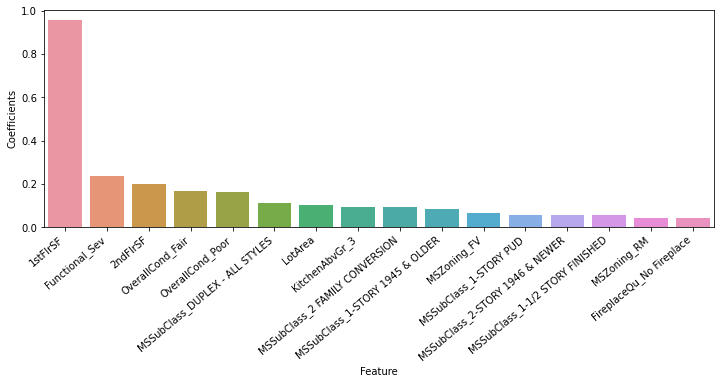

In [2124]:
#Finding out top predictors in terms of the highest magnitude of coefficients

coefficient = [abs(x) for x in model_parameters]
top = pd.DataFrame(data={'Feature' :cols,'Coefficients': coefficient})
top =  top.iloc[1:,:]
top = top.sort_values(['Coefficients'],ascending=False).reset_index(drop=True)
plt.figure(figsize=[12,4])
sns1 = sns.barplot(x=top.Feature,y=top.Coefficients)
sns1.set_xticklabels(sns1.get_xticklabels(), rotation=40, ha="right")
plt.show()

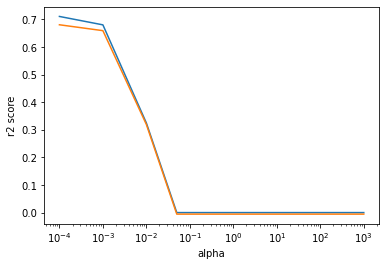

In [2125]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [2126]:
# model with optimal alpha
# lasso regression
# We will now use our model to make predictions.

lm = Lasso(alpha=model_cv.best_params_['alpha'])
lm.fit(X_train_rfe1, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe1)
print("This is the r2 score of train data using Lasso: {}".format(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe1.columns]
y_test_pred = lm.predict(X_test_new)
print("This is the r2 score of test data using Lasso: {}".format(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))


This is the r2 score of train data using Lasso: 0.7075739859157153
This is the r2 score of test data using Lasso: 0.717161031702163


**Conclusion-**

We can see that the r2 score has reduced after removing the 5 most important predictors.

And now the 5 most important predictors are:

1stFlrSF,
Functional_Sev,
2ndFlrSF,
OverallCond_Fair,
OverallCond_Poor

**Question 4**

How can you make sure that a model is robust and generalisable?
What are the implications of the same for the accuracy of the model and why?

**Answer 4**

A model is considered to be robust and generalisable if its output and forecasts are consistently accurate even if one or more of the input variables or assumptions are drastically changed due to unforeseen circumstances.

Below are the ways which we can follow to make the model more robust:
Add more data.
Treat missing and Outlier values.
Feature Engineering.
Feature Selection.
Multiple algorithms.
Algorithm Tuning.

Also a model can be made more robust and generalisable by reducing the complexity or having a trade off between bias and variance.
Here , we have used regularisation to take care of the complexity of the model such that it is optimally complex and has good predictive power.
As we try to have a trade off between bias and variance, hence the accuracy of the model may reduce in making it more robust and generalisable.
And another thing which can help is the treatment of outlier so here we have converted the scale of target variable to log.
